## Business Problem Overview

**In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.**

## 1. Import Libraries

In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

## 2. Import Data and get overview

In [520]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [521]:
telecom.shape

(99999, 226)

In [522]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [523]:
#Import Data Dictionary
data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [524]:
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


## 3. Data Cleaning and missing value treatment

### 3.1. check null values

In [525]:
print((telecom.isnull().sum()/len(telecom))*100)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

**- 3.1. Insights- we can see there are many columns having more than 70% missing values. Trying to impute reachrge related columns with some values**

### 3.2. Impute Meaningfull Missing values

__check null values and verify these are meaning full null or not. For that checking rechange amount along with recharge date. If both date amount is missing then we can conclude that no recharge made. So we can imput those missing values with 0__

In [526]:
recharge_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

In [527]:
if telecom['date_of_last_rech_data_6'].isnull().index.equals(telecom['total_rech_data_6'].isnull().index):
    print("Equal")
else:
    print("Not Equal")

Equal


In [528]:
if telecom['date_of_last_rech_data_6'].isnull().index.equals(telecom['av_rech_amt_data_6'].isnull().index):
    print("Equal")
else:
    print("Not Equal")

Equal


In [529]:
if telecom['date_of_last_rech_data_7'].isnull().index.equals(telecom['total_rech_data_7'].isnull().index):
    print("Equal")
else:
    print("Not Equal")

Equal


In [530]:
if telecom['date_of_last_rech_data_7'].isnull().index.equals(telecom['av_rech_amt_data_7'].isnull().index):
    print("Equal")
else:
    print("Not Equal")

Equal


In [531]:
if telecom['date_of_last_rech_data_8'].isnull().index.equals(telecom['total_rech_data_8'].isnull().index):
    print("Equal")
else:
    print("Not Equal")

Equal


In [532]:
if telecom['date_of_last_rech_data_8'].isnull().index.equals(telecom['av_rech_amt_data_8'].isnull().index):
    print("Equal")
else:
    print("Not Equal")

Equal


In [533]:
if telecom['date_of_last_rech_data_9'].isnull().index.equals(telecom['total_rech_data_9'].isnull().index):
    print("Equal")
else:
    print("Not Equal")

Equal


In [534]:
if telecom['date_of_last_rech_data_9'].isnull().index.equals(telecom['av_rech_amt_data_9'].isnull().index):
    print("Equal")
else:
    print("Not Equal")

Equal


**- 3.2 Insights: Clearly no recharge made on those days so we can imput the amount with 0 value**

In [535]:
for col in recharge_cols:
    telecom[col].fillna(0, inplace=True)

In [536]:
print((telecom.isnull().sum()/len(telecom))*100)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### 3.3 Filter high value customer

__Customer having transactions more than or equal to 70th percentile can be consider as high value customer. We are going  to analysed month 6 and 7th records to get 70th percentile. Based on this value we filter the main dataset to with only high value customer's record. Following Pareto rule(80-20), that is telling  80% of outcomes (or outputs) result from 20% of all causes (or inputs),  we are only going to concentrate on high value customers records__ 

In [537]:
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_data_rech_amt_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

In [538]:
avg_recharge_amount_month_6_7 = telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of Jun and July is - ", amount_70th_percentile)

70th percentile of Jun and July is -  239.0


In [539]:
telecom = telecom[avg_recharge_amount_month_6_7 >= amount_70th_percentile]
telecom.shape

(30001, 230)

**applying Pareto rule, keeping 20% high value customer with 70th percentile average recharge amount**

In [540]:
## check null values again
print((telecom.isnull().sum()/len(telecom))*100)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_6         0.000000
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
last_date_of_month_9         1.216626
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
onnet_mou_9                  6.336455
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
offnet_mou_9                 6.336455
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_ic_mou_9                6.336455
roam_og_mou_6                1.816606
roam_og_mou_

**- 3.3 Insights: after filtering high valued customes records we are getting 30001 records with 230 features inside it. After checking the missing values verification again, we can conclude there are few columns having missing values over 40% few columns still having missing values.**

### 3.4 Derive Churn

**As there is no target column present in dataset so we are going to derive target column with month 9 record. For month 9(sept) if any customers having no usage for incoming and outgoing call and no internet usage then we can cosider those Customers are churn(1) else no churn(0)** 

In [541]:
telecom[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [542]:
telecom['churn'] = telecom.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) and 
                                               (x.total_og_mou_9 == 0) and 
                                               (x.vol_2g_mb_9 == 0) and 
                                               (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [543]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.

#### 3.4.1 Drop all month 9 data

**As we have used the month 9(sept) data to derive the target column, hence we can drop all month 9 data so that the model does not become overfitted**

In [544]:
# Renaming all month named vbc columns with nos. such as  6,7,8 and 9
telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [545]:
cols_9 = [col for col in telecom.columns if '_9' in col]
cols_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [546]:
len(cols_9)

56

In [547]:
telecom.drop(cols_9, axis=1, inplace = True)

In [548]:
telecom.shape

(30001, 175)

**- 3.4.1 Insights - Drop these 56 columns sept(month 9) columns completely to prevent overfitting**

### 3.5 Checking high percentage missing value columns

In [549]:
## check null values again
print((telecom.isnull().sum()/len(telecom))*100)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_6         0.000000
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2m_m

**We can see many collumns with having 40% null values**

In [550]:
cols_with_40_missing = ((telecom.isnull().sum()/ len(telecom)) * 100) >= 40
cols_with_40_missing.sum()

24

In [551]:
cols_with_40_missing.index

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'churn'],
      dtype='object', length=175)

In [552]:
telecom[cols_with_40_missing.index].head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.9

**columns last_date_of_month_6, last_date_of_month_7 and last_date_of_month_8 contains date and having 40% missing values.We cannot impute any values for these so we can drop thhese columns**

In [553]:
telecom.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

**Columns related to internet usage like 'count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6','arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8' are haivg missing values means customers are not using internet related service as such. So we can impute these columns missing values with 0** 

In [554]:
internet_related_missing_cols = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [555]:
for col in internet_related_missing_cols:
    telecom[col].fillna(0, inplace=True)

**We can consider 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8' columns as no recharge done so we can impute those with 0 values**

In [556]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom[col].fillna(0, inplace=True)

In [557]:
print((telecom.isnull().sum()/len(telecom))*100)

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           0.746642
std_og_t2o_mou           0.746642
loc_ic_t2o_mou           0.746642
last_date_of_month_6     0.000000
last_date_of_month_7     0.089997
last_date_of_month_8     0.549982
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
onnet_mou_6              1.816606
onnet_mou_7              1.789940
onnet_mou_8              3.913203
offnet_mou_6             1.816606
offnet_mou_7             1.789940
offnet_mou_8             3.913203
roam_ic_mou_6            1.816606
roam_ic_mou_7            1.789940
roam_ic_mou_8            3.913203
roam_og_mou_6            1.816606
roam_og_mou_7            1.789940
roam_og_mou_8            3.913203
loc_og_t2t_mou_6         1.816606
loc_og_t2t_mou_7         1.789940
loc_og_t2t_mou_8         3.913203
loc_og_t2m_mou_6         1.816606
loc_og_t2m_mou_7         1.789940
loc_og_t2m_mou_8         3.913203
loc_og_t2f_mou

**- 3.5 Insights - still there are few columns with null values. Going to handle those in upcoming steps** 

### 3.6 Handing Zero varience and Unique varience columns

In [558]:
columns_with_0_variance = telecom.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())


Total columns with ZERO variance are -  9


In [559]:
cols_0_var = columns_with_0_variance[columns_with_0_variance == 1].index
print(cols_0_var)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [560]:
columns_with_unique = telecom.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_unique.sum())

Total columns with only ONE unique value are -  13


In [561]:
cols_1_var = columns_with_unique[columns_with_unique == 1].index
print(cols_1_var)

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


**as the above columns contain unique values so we are going to drop all these columns**

In [562]:
telecom.shape

(30001, 172)

In [563]:
telecom.drop(cols_1_var, axis=1, inplace = True)

In [564]:
print((telecom.isnull().sum()/len(telecom))*100)

mobile_number            0.000000
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
onnet_mou_6              1.816606
onnet_mou_7              1.789940
onnet_mou_8              3.913203
offnet_mou_6             1.816606
offnet_mou_7             1.789940
offnet_mou_8             3.913203
roam_ic_mou_6            1.816606
roam_ic_mou_7            1.789940
roam_ic_mou_8            3.913203
roam_og_mou_6            1.816606
roam_og_mou_7            1.789940
roam_og_mou_8            3.913203
loc_og_t2t_mou_6         1.816606
loc_og_t2t_mou_7         1.789940
loc_og_t2t_mou_8         3.913203
loc_og_t2m_mou_6         1.816606
loc_og_t2m_mou_7         1.789940
loc_og_t2m_mou_8         3.913203
loc_og_t2f_mou_6         1.816606
loc_og_t2f_mou_7         1.789940
loc_og_t2f_mou_8         3.913203
loc_og_t2c_mou_6         1.816606
loc_og_t2c_mou_7         1.789940
loc_og_t2c_mou_8         3.913203
loc_og_mou_6             1.816606
loc_og_mou_7  

In [565]:
telecom.shape

(30001, 159)

### 3.7 Impute missing values 

In [566]:
## getting the columns with null values
cols_with_null_values = telecom.columns[telecom.isna().any()].tolist()
print(cols_with_null_values)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [567]:
#getting cols with null values for month 6
cols_with_null_values_for_month_6 = [col for col in cols_with_null_values if '_6' in col]

telecom[cols_with_null_values_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          29456 non-null  float64
 1   offnet_mou_6         29456 non-null  float64
 2   roam_ic_mou_6        29456 non-null  float64
 3   roam_og_mou_6        29456 non-null  float64
 4   loc_og_t2t_mou_6     29456 non-null  float64
 5   loc_og_t2m_mou_6     29456 non-null  float64
 6   loc_og_t2f_mou_6     29456 non-null  float64
 7   loc_og_t2c_mou_6     29456 non-null  float64
 8   loc_og_mou_6         29456 non-null  float64
 9   std_og_t2t_mou_6     29456 non-null  float64
 10  std_og_t2m_mou_6     29456 non-null  float64
 11  std_og_t2f_mou_6     29456 non-null  float64
 12  std_og_mou_6         29456 non-null  float64
 13  isd_og_mou_6         29456 non-null  float64
 14  spl_og_mou_6         29456 non-null  float64
 15  og_others_6          29456 non-null 

In [568]:
#getting cols with null values for month 7
cols_with_null_values_for_month_7 = [col for col in cols_with_null_values if '_7' in col]

telecom[cols_with_null_values_for_month_7].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_7          29464 non-null  float64
 1   offnet_mou_7         29464 non-null  float64
 2   roam_ic_mou_7        29464 non-null  float64
 3   roam_og_mou_7        29464 non-null  float64
 4   loc_og_t2t_mou_7     29464 non-null  float64
 5   loc_og_t2m_mou_7     29464 non-null  float64
 6   loc_og_t2f_mou_7     29464 non-null  float64
 7   loc_og_t2c_mou_7     29464 non-null  float64
 8   loc_og_mou_7         29464 non-null  float64
 9   std_og_t2t_mou_7     29464 non-null  float64
 10  std_og_t2m_mou_7     29464 non-null  float64
 11  std_og_t2f_mou_7     29464 non-null  float64
 12  std_og_mou_7         29464 non-null  float64
 13  isd_og_mou_7         29464 non-null  float64
 14  spl_og_mou_7         29464 non-null  float64
 15  og_others_7          29464 non-null 

In [569]:
#getting cols with null values for month 8
cols_with_null_values_for_month_8 = [col for col in cols_with_null_values if '_8' in col]

telecom[cols_with_null_values_for_month_8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_8          28827 non-null  float64
 1   offnet_mou_8         28827 non-null  float64
 2   roam_ic_mou_8        28827 non-null  float64
 3   roam_og_mou_8        28827 non-null  float64
 4   loc_og_t2t_mou_8     28827 non-null  float64
 5   loc_og_t2m_mou_8     28827 non-null  float64
 6   loc_og_t2f_mou_8     28827 non-null  float64
 7   loc_og_t2c_mou_8     28827 non-null  float64
 8   loc_og_mou_8         28827 non-null  float64
 9   std_og_t2t_mou_8     28827 non-null  float64
 10  std_og_t2m_mou_8     28827 non-null  float64
 11  std_og_t2f_mou_8     28827 non-null  float64
 12  std_og_mou_8         28827 non-null  float64
 13  isd_og_mou_8         28827 non-null  float64
 14  spl_og_mou_8         28827 non-null  float64
 15  og_others_8          28827 non-null 

**as we can see same number of values are missing and these columns are related minutes of usage calls (incoming/outgoing) made within the network or to outside network. So we can impute numeric values with 0. There are few Date columns that we drop**

In [570]:
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [571]:
telecom.drop(date_columns, axis=1, inplace = True)

In [572]:
## getting the columns with null values
cols_with_null_values = telecom.columns[telecom.isna().any()].tolist()
print(cols_with_null_values)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [573]:
for col in cols_with_null_values:
    telecom[col].fillna(0, inplace=True)

In [574]:
print((telecom.isnull().sum()/len(telecom))*100)

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou

In [575]:
telecom.shape

(30001, 156)

**In this stage the dataframe does not have any missing values**

###  3.8 Dropping multicolinear columns

**Looking at the problem statement, we can sure that total columns like total_ic_mou, total_og_mou, vol_2g_mb and vol_3g_mb are dependent on individual incoming and outgoing related columns. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help in removing the multicollinearity.**

In [576]:
multi_co_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom.drop(multi_co_cols, axis = 1, inplace = True)

telecom.shape

(30001, 105)

### 3.9 Checking ARPU - Average Revenue Per User

In [577]:
telecom[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957
std,460.640461,479.776947,501.961981
min,-2258.709000,-2014.045000,-945.808000
25%,309.865000,309.826000,231.473000
50%,481.694000,480.943000,427.585000
75%,699.943000,698.315000,661.491000
max,27731.088000,35145.834000,33543.624000


**Looking at problem statement we got The average revenue per user can not be negetive. so we can remove those negetive rows from data frame**

In [578]:
telecom = telecom[(telecom['arpu_6'] >= 0) & (telecom['arpu_7'] >= 0) & (telecom['arpu_8'] >= 0)]

In [579]:
telecom.shape

(29824, 105)

__After imputing missing values and removing columns are rows those are not alighn with business statement finally we get 29824 rows and 105 features__ 

## 4. Exploratory Data Analysis(EDA)

In [580]:
telecom.shape

(29824, 105)

In [581]:
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,29824.0,7.001205e+09,690853.595033,7.000000e+09,7.000608e+09,7.001202e+09,7.001803e+09,7.002411e+09
arpu_6,29824.0,5.592195e+02,459.504626,0.000000e+00,3.109970e+02,4.824625e+02,6.997347e+02,2.773109e+04
arpu_7,29824.0,5.625627e+02,478.650800,0.000000e+00,3.118048e+02,4.821215e+02,6.990818e+02,3.514583e+04
arpu_8,29824.0,5.100856e+02,501.034006,0.000000e+00,2.338620e+02,4.285085e+02,6.626070e+02,3.354362e+04
onnet_mou_6,29824.0,2.612214e+02,459.882386,0.000000e+00,1.731000e+01,8.504000e+01,2.912775e+02,7.376710e+03
onnet_mou_7,29824.0,2.684327e+02,480.118084,0.000000e+00,1.628000e+01,8.357500e+01,2.914900e+02,8.157780e+03
onnet_mou_8,29824.0,2.347139e+02,458.523657,0.000000e+00,1.079000e+01,6.621000e+01,2.413775e+02,1.075256e+04
offnet_mou_6,29824.0,3.732904e+02,479.935683,0.000000e+00,7.235500e+01,2.230600e+02,4.876300e+02,8.362360e+03
offnet_mou_7,29824.0,3.785241e+02,497.879922,0.000000e+00,7.055250e+01,2.209700e+02,4.944325e+02,9.667130e+03
offnet_mou_8,29824.0,3.354961e+02,479.852372,0.000000e+00,4.781000e+01,1.838600e+02,4.398675e+02,1.400734e+04


In [582]:
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0.0,2.0,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,0.0,1.0,1.0,604,40.45,51.86,0.00,0.0,712.0,540.0,0


In [583]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 99997
Columns: 105 entries, mobile_number to churn
dtypes: float64(81), int64(24)
memory usage: 24.1 MB


__As all columns are of type float or int, we can check the box plot for any outliers__

In [584]:
cols = telecom.columns
cols = cols.drop(['mobile_number', 'churn'],1)
cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7',
       'vbc_3g_6', 'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8'],
      dtype='object', length=103)

In [585]:
len(cols)

103

In [586]:
def draw_box_plot(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)
    sns.distplot(data[x_axis], hist = True, kde = True, color = 'b')
   

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)
    sns.boxplot(x = x_axis, data = data, color = 'r')
   
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()
    

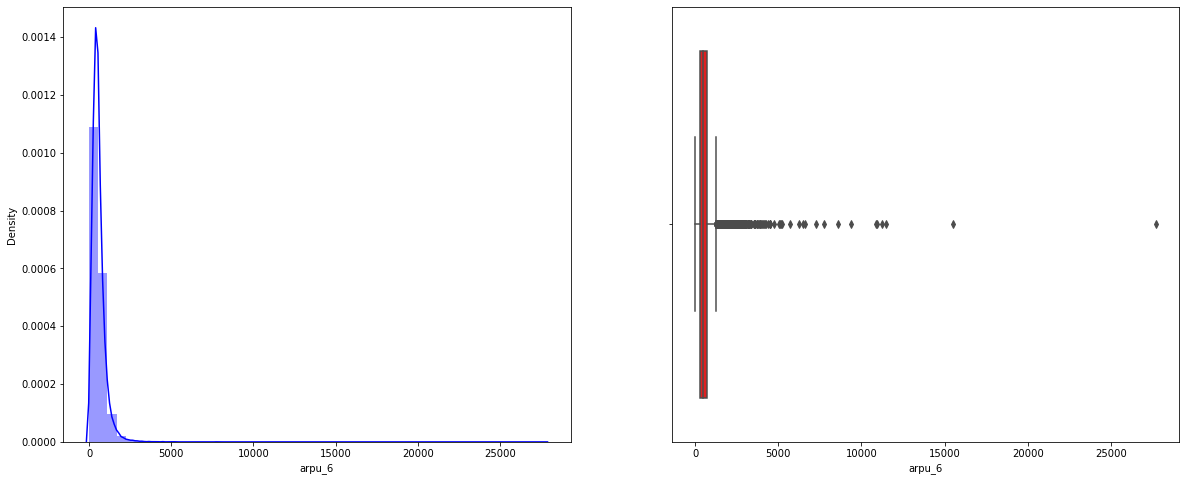

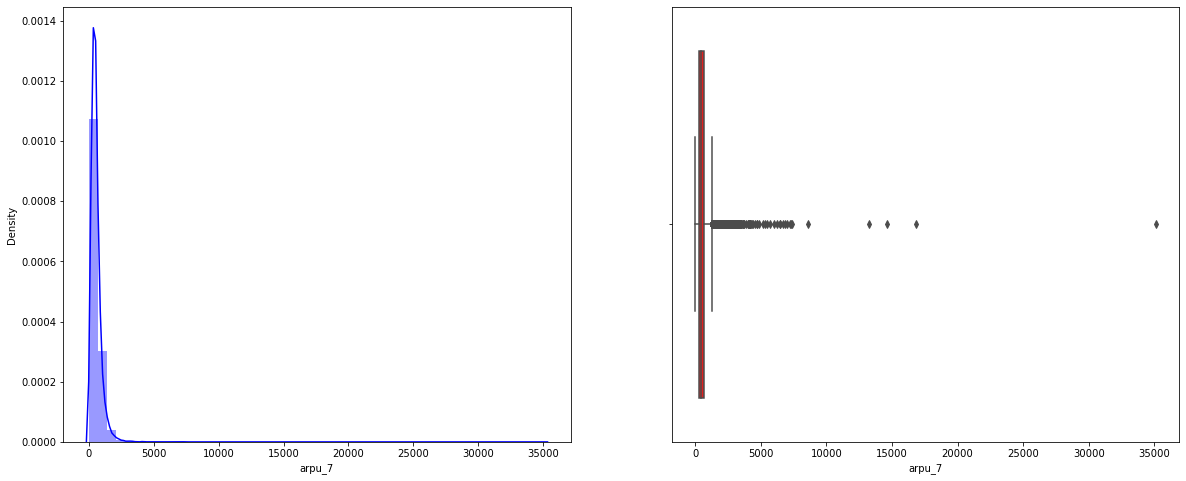

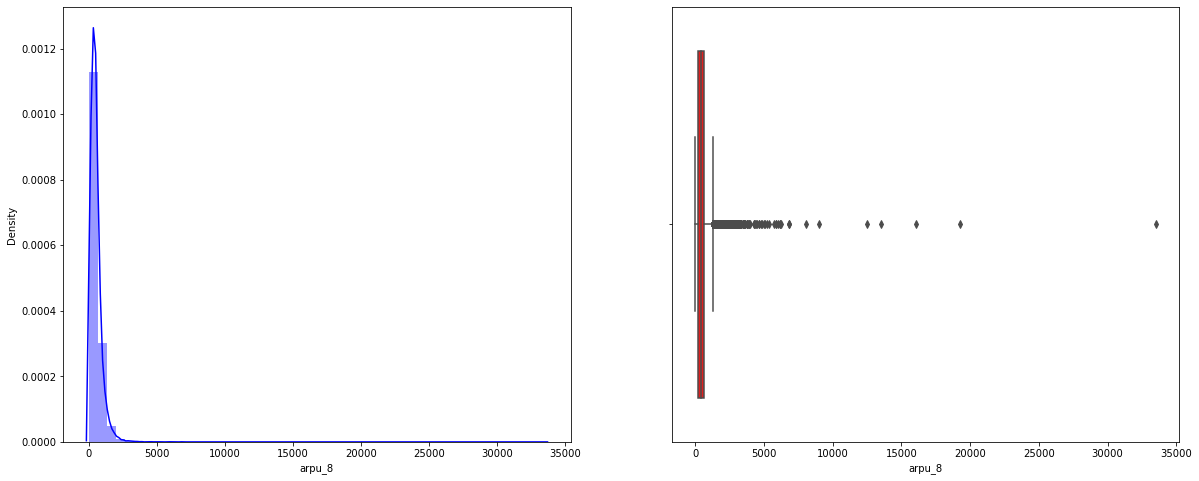

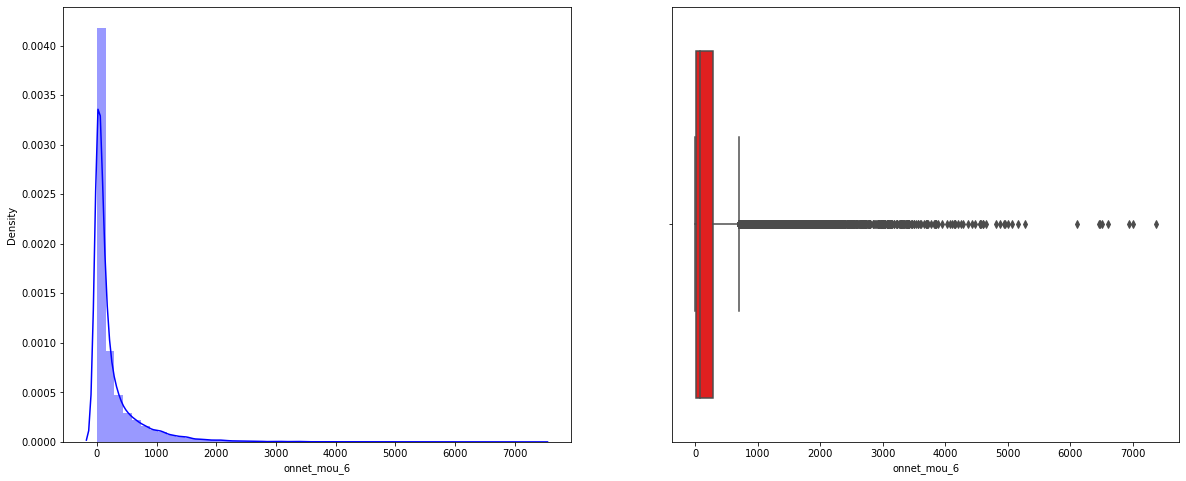

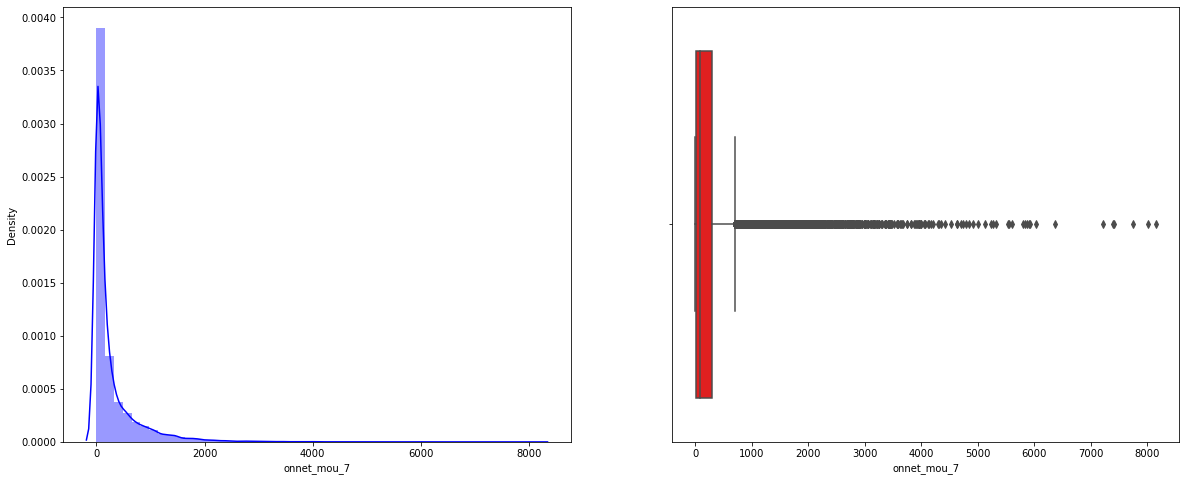

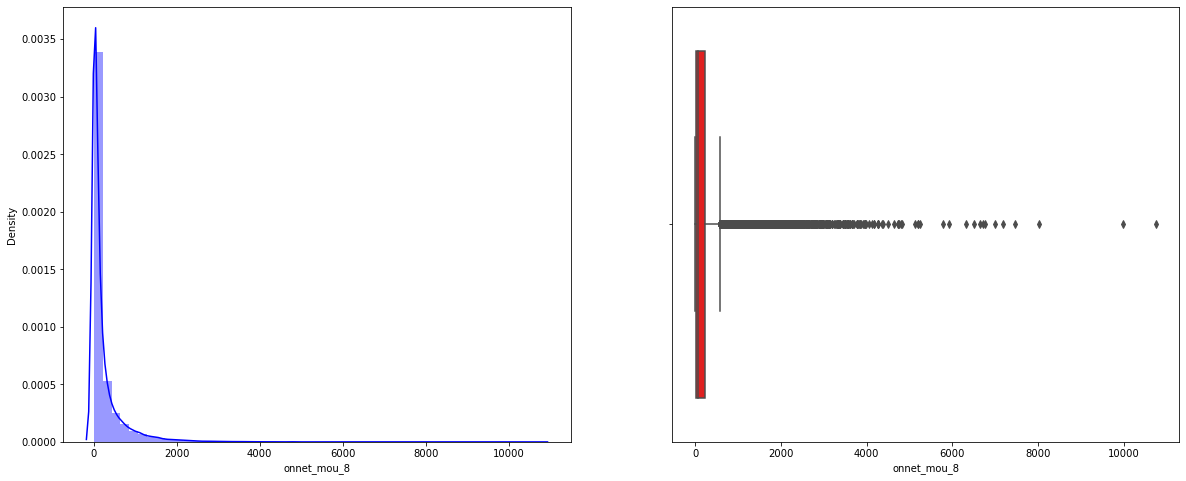

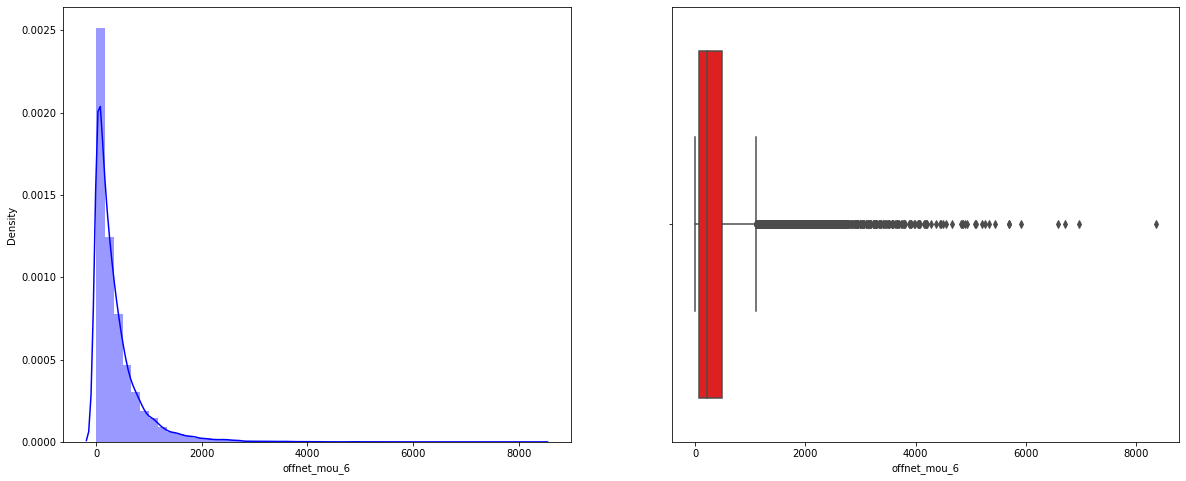

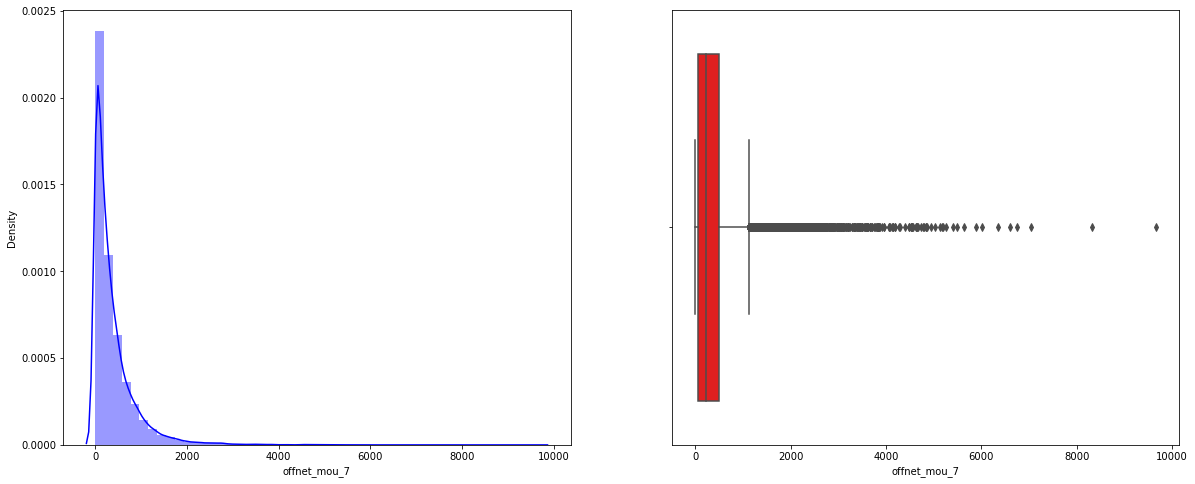

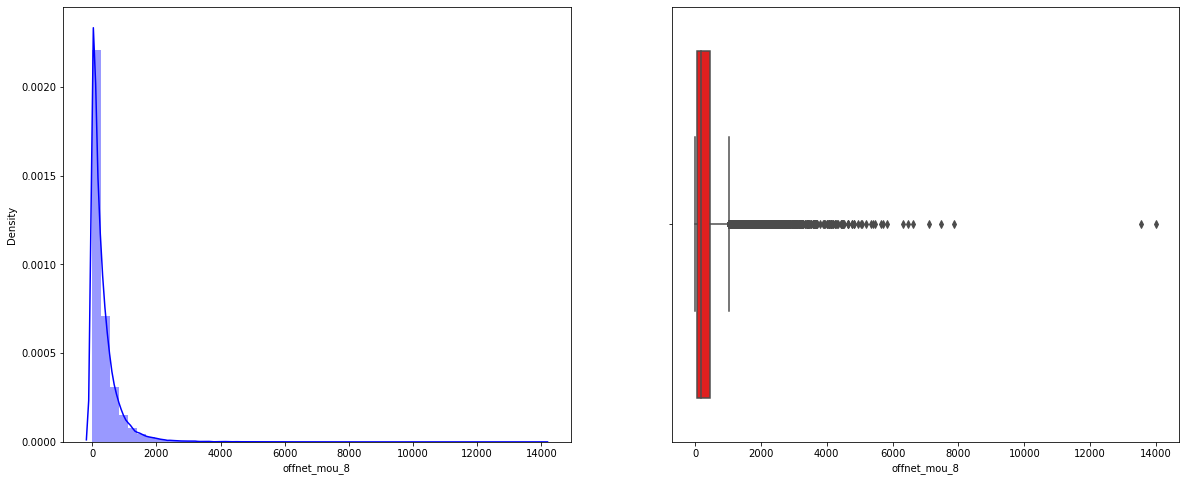

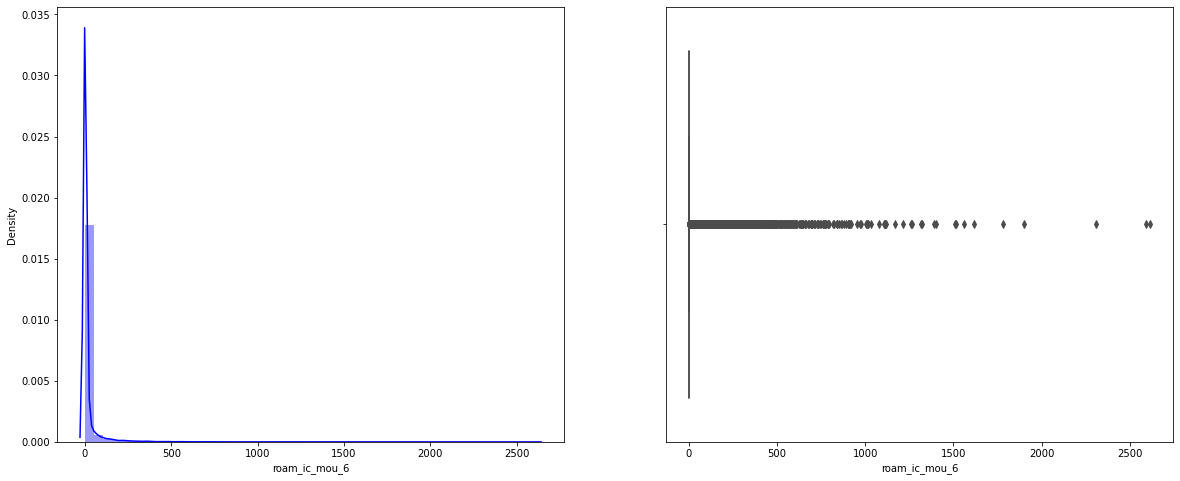

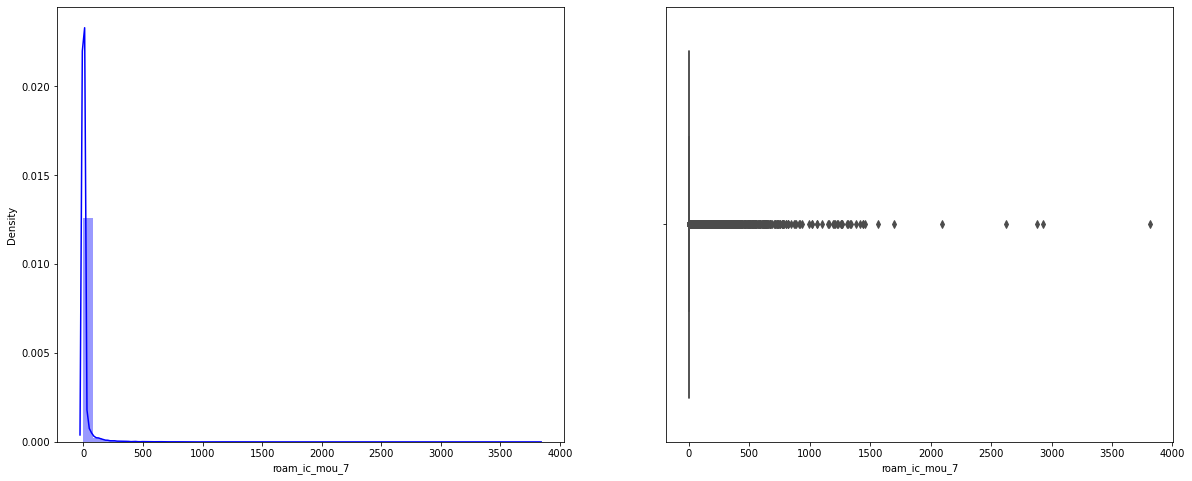

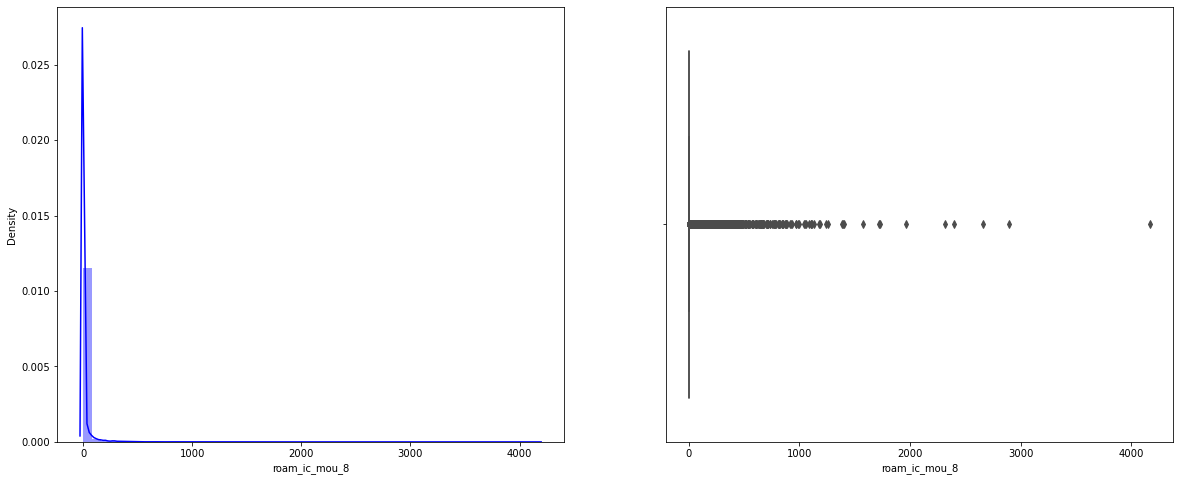

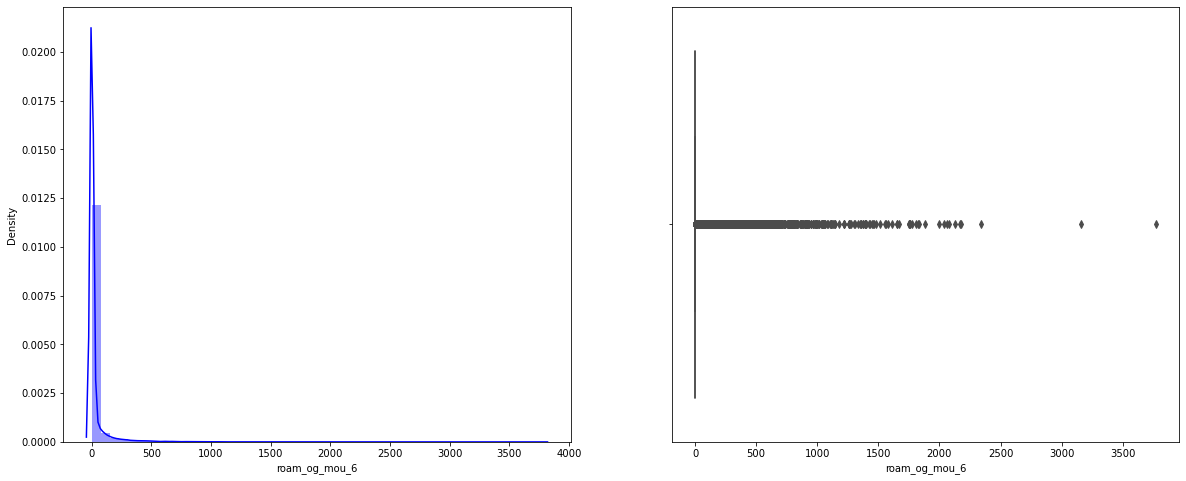

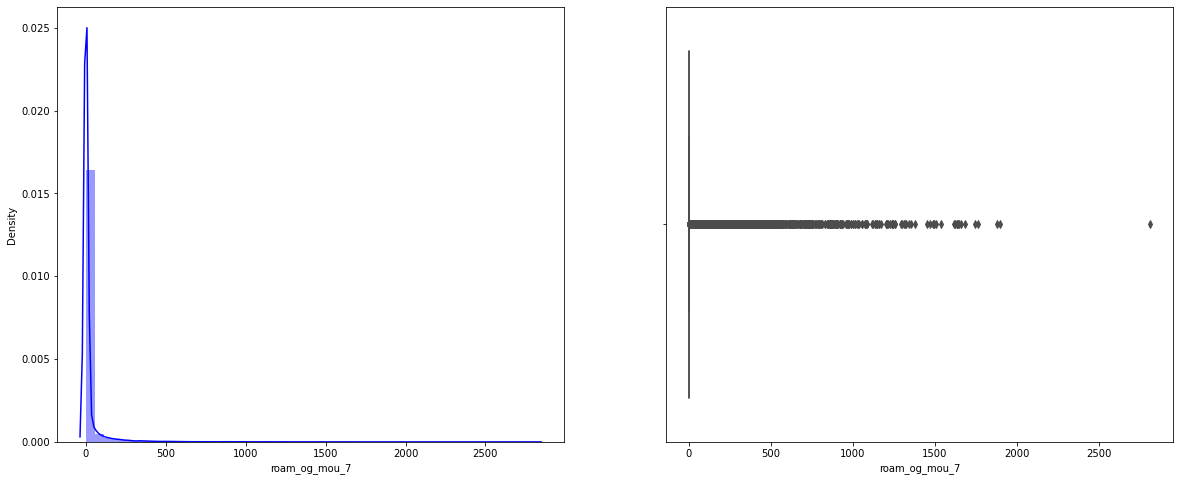

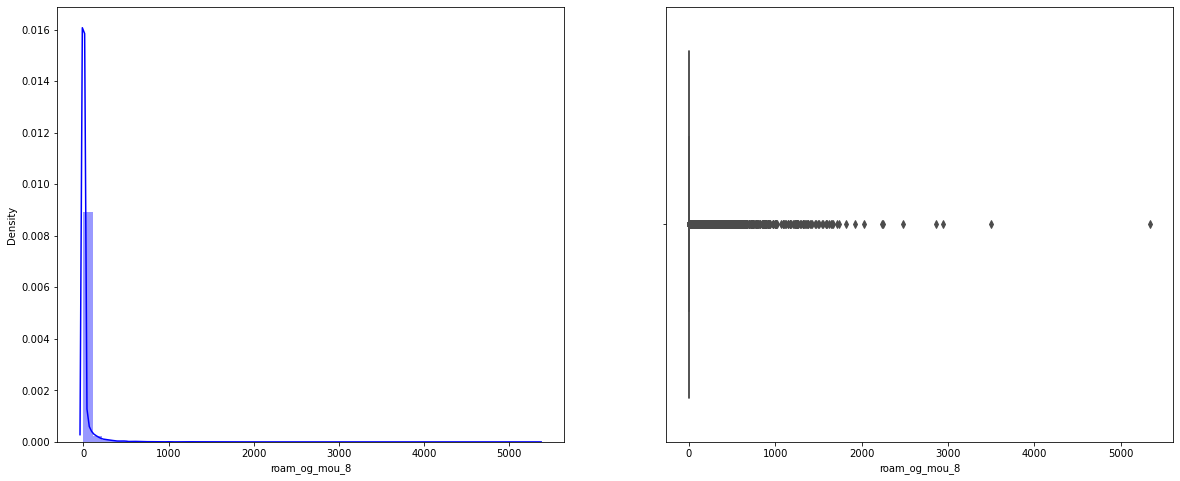

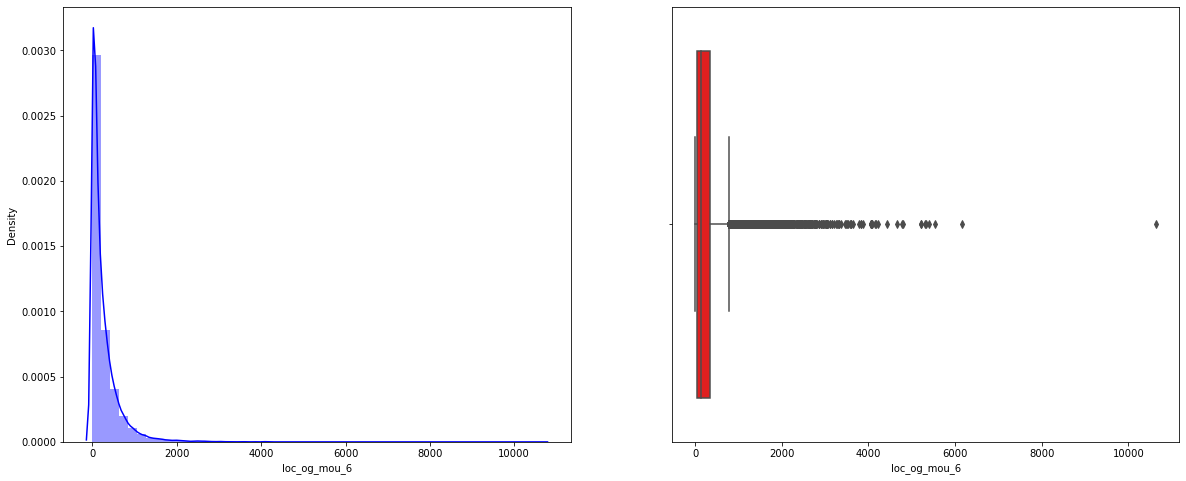

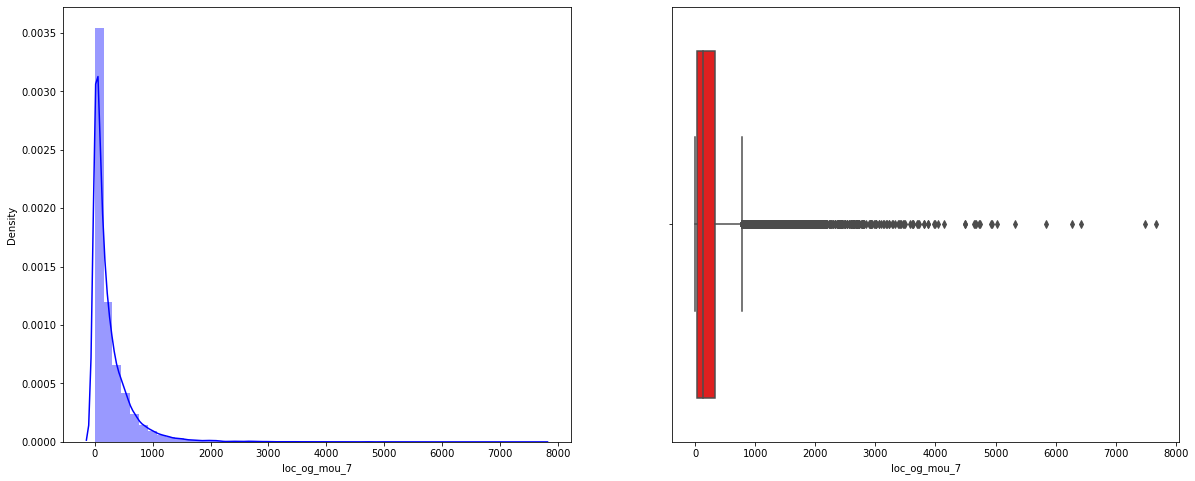

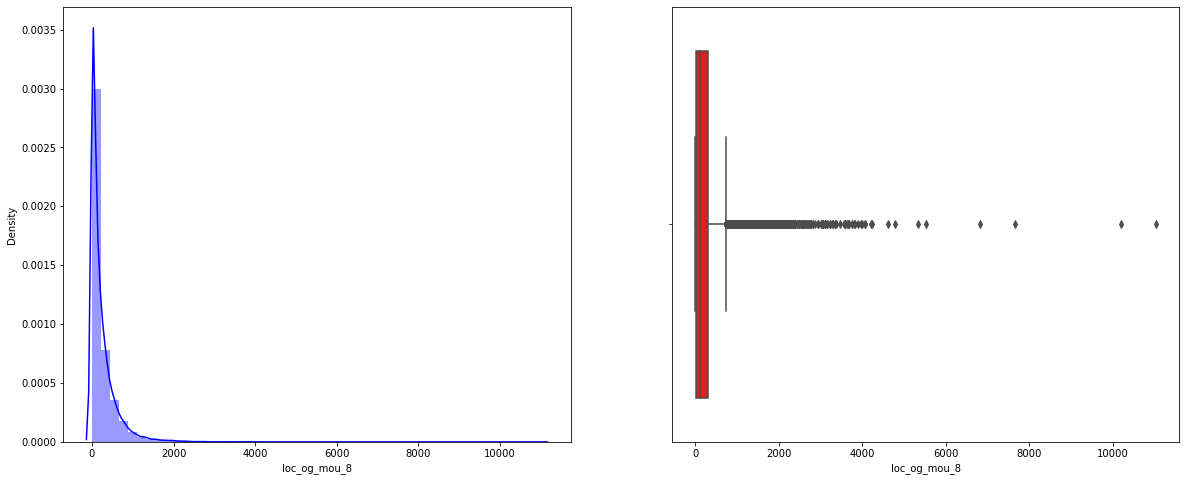

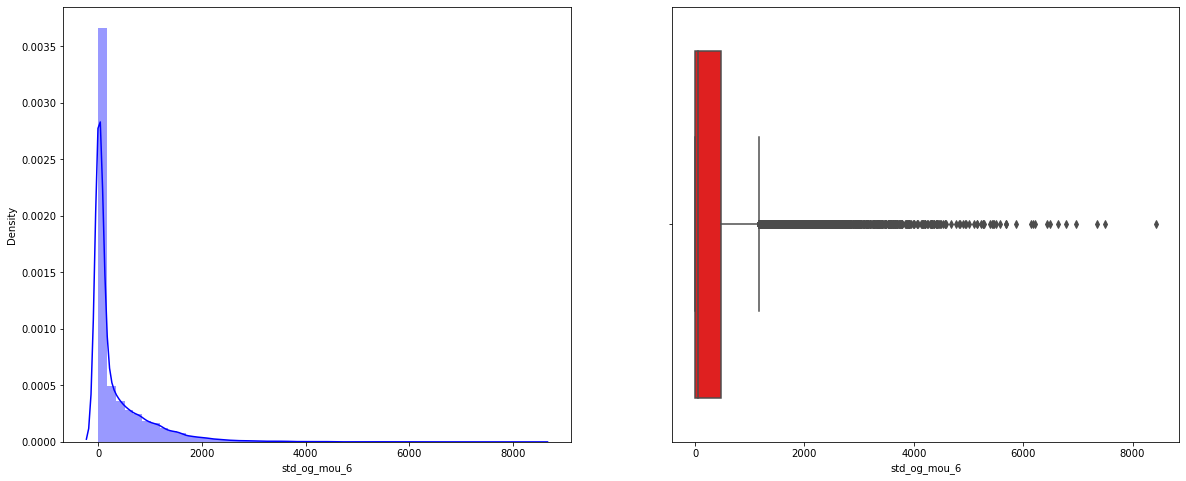

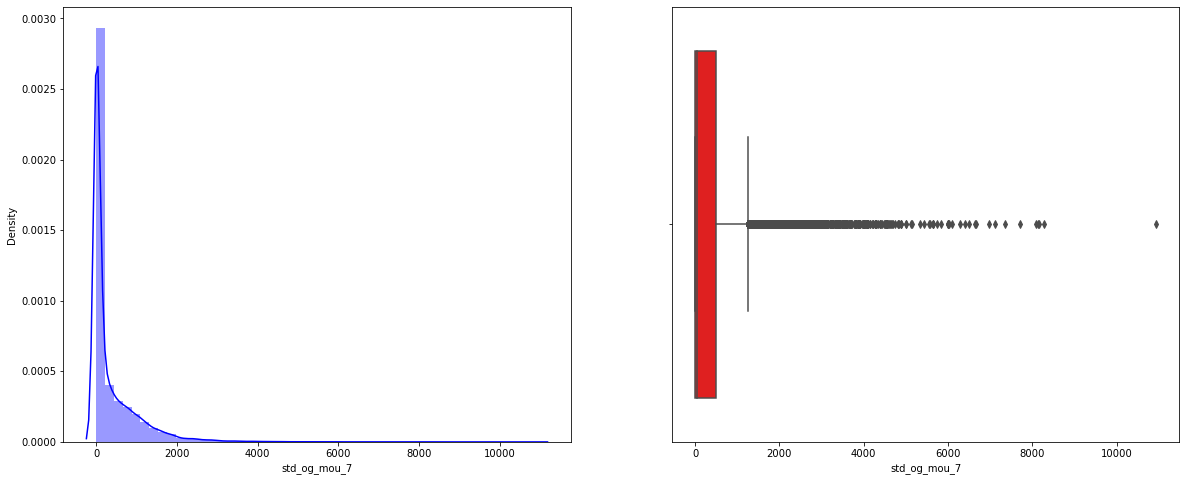

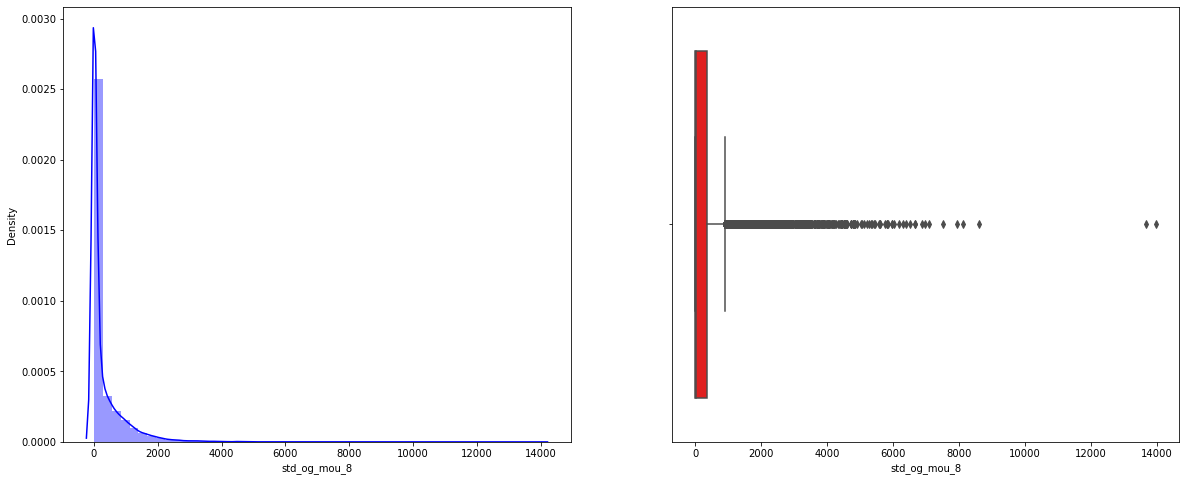

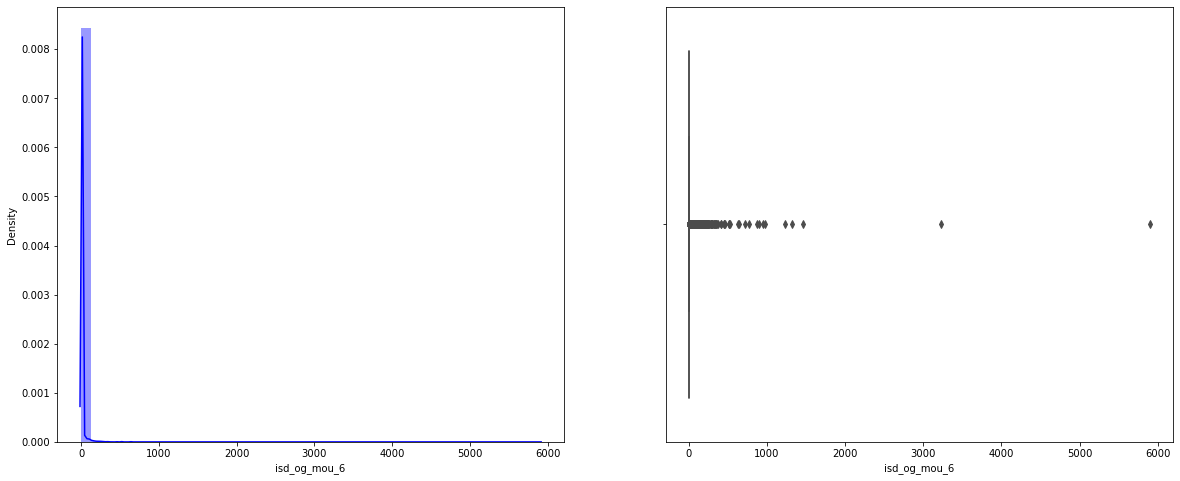

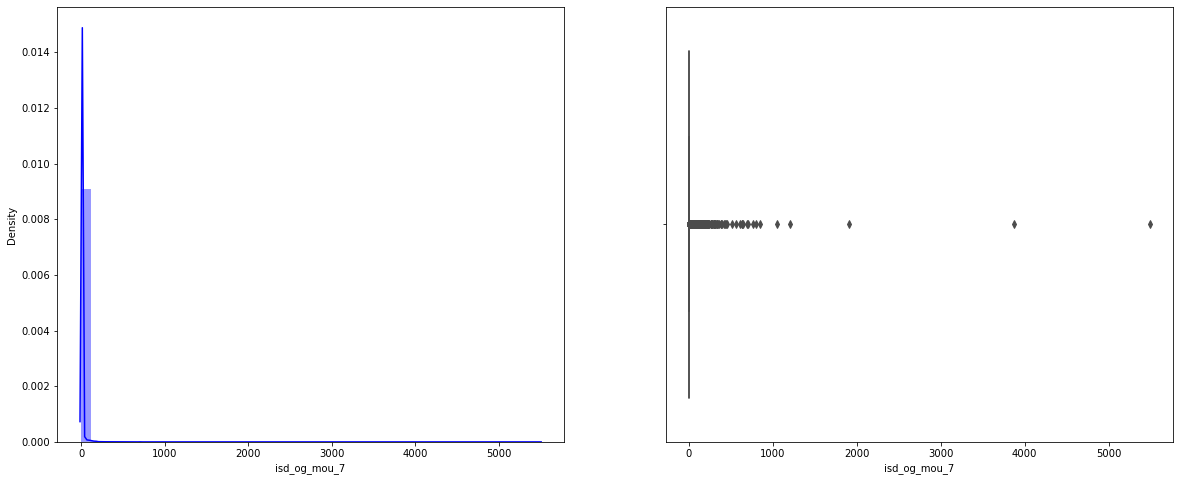

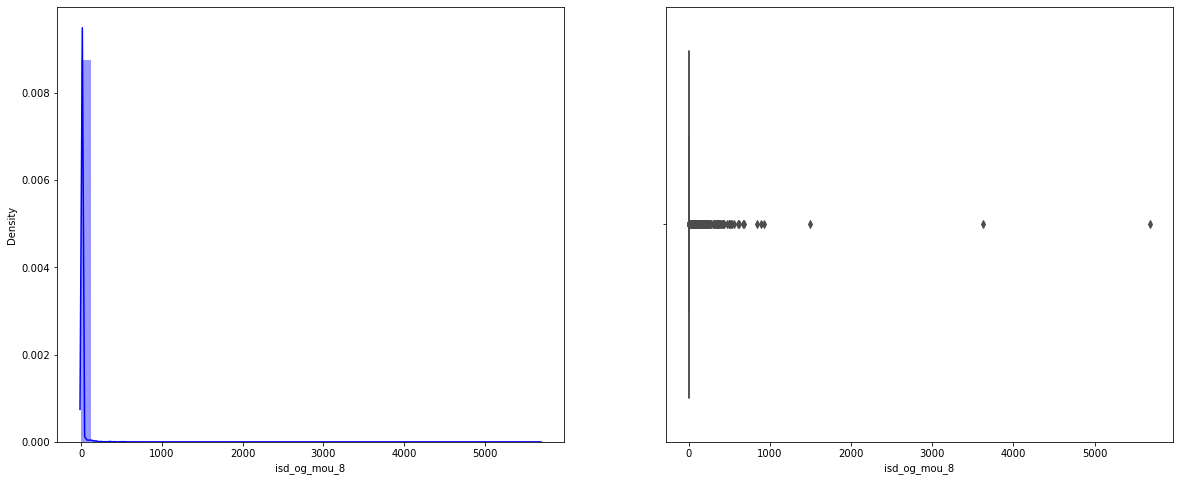

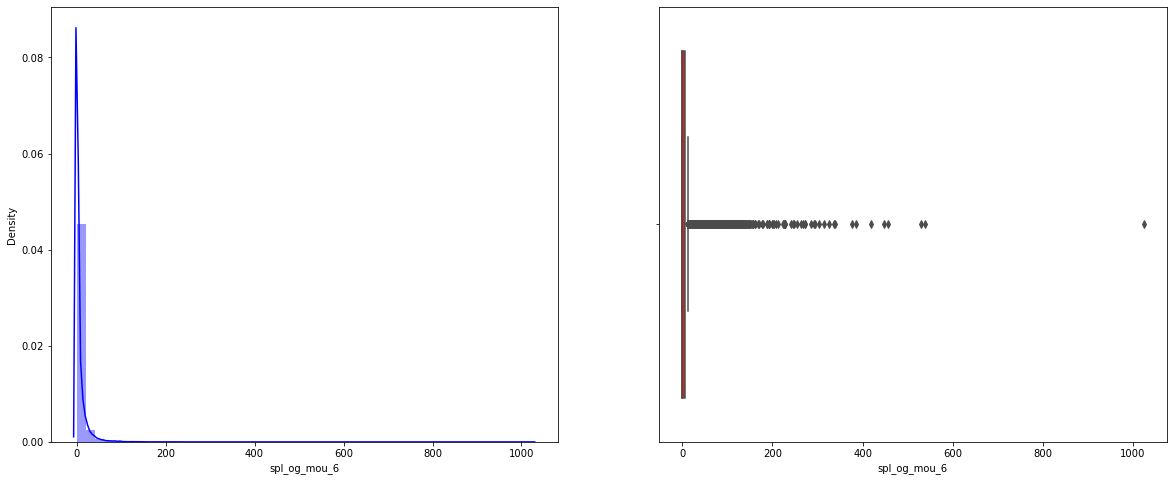

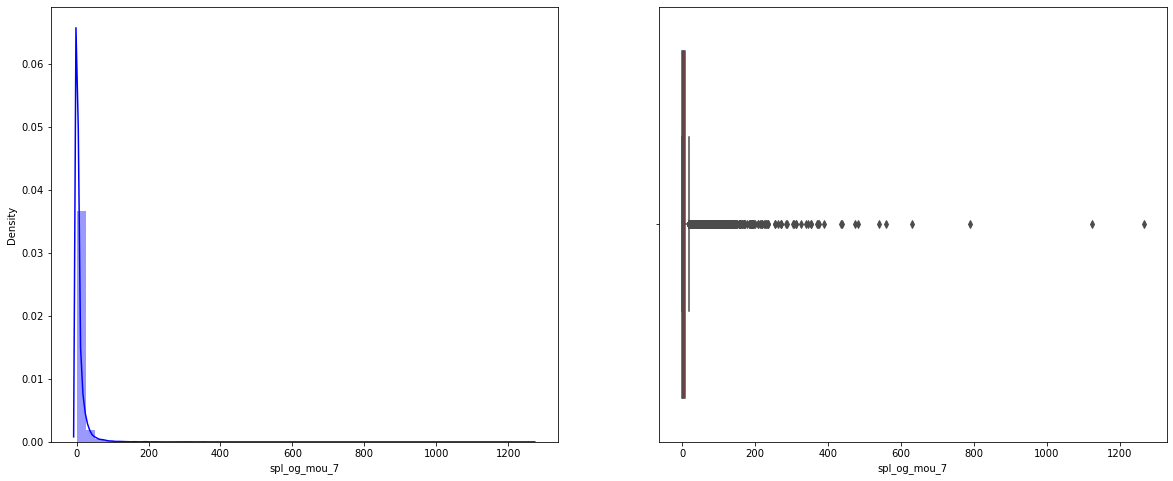

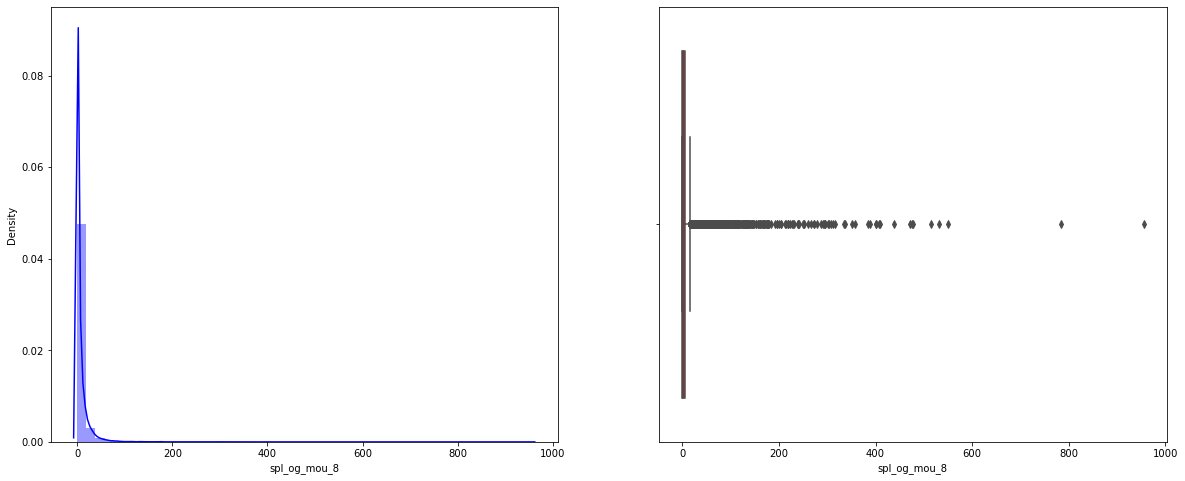

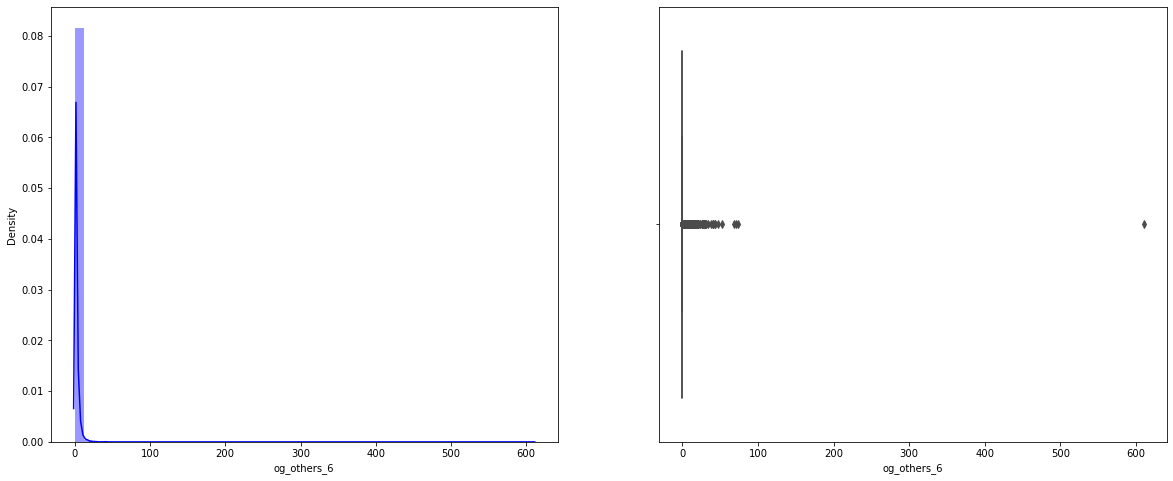

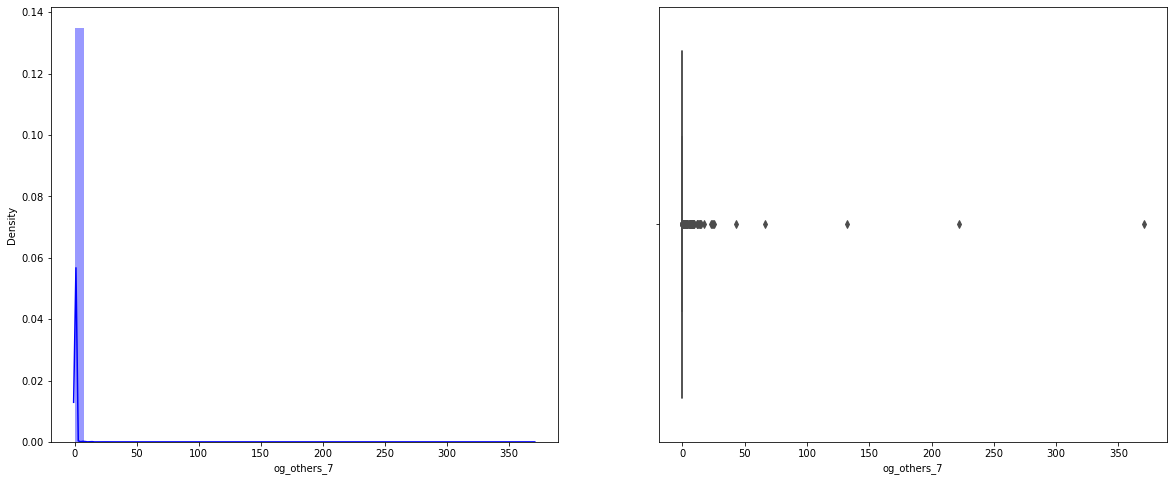

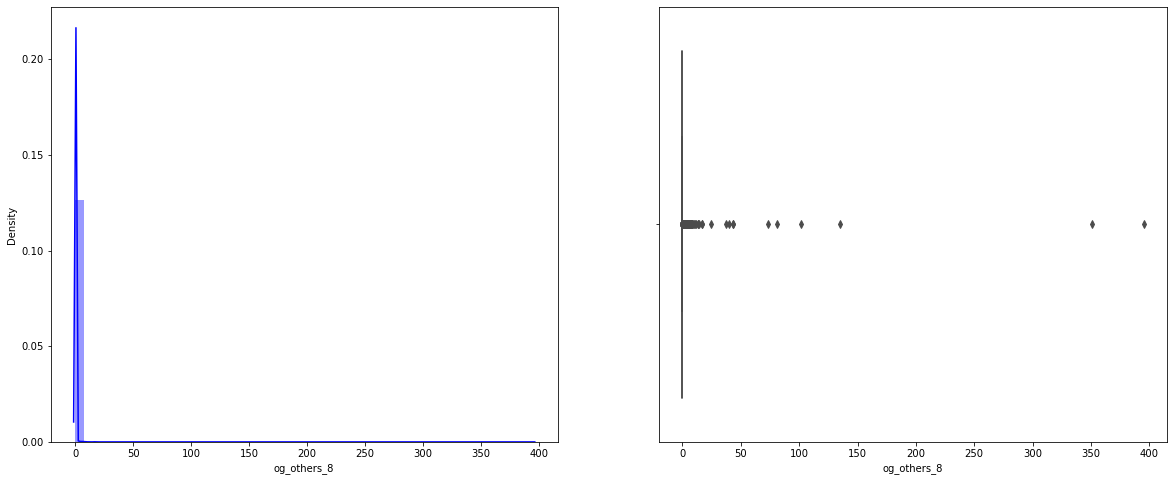

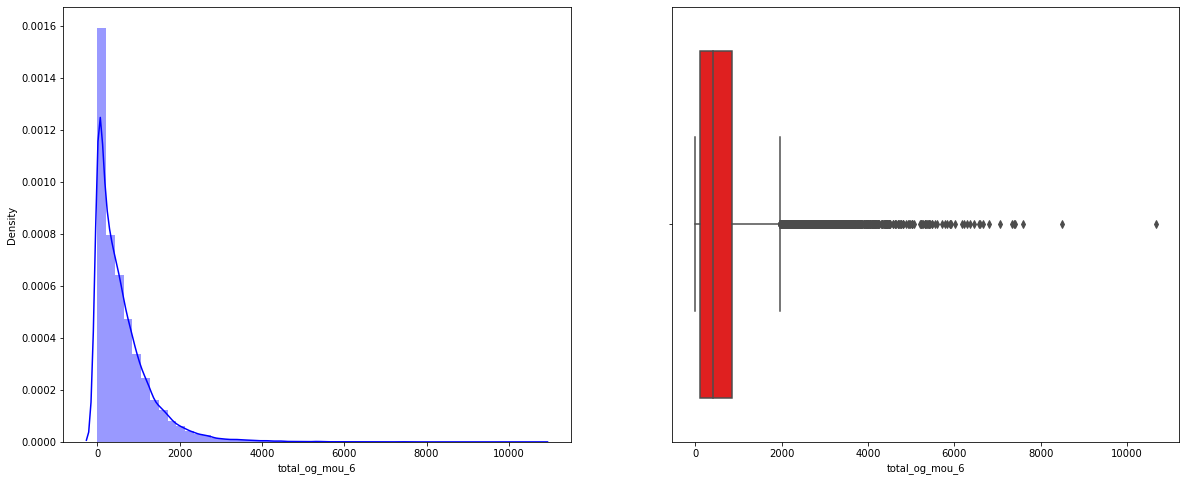

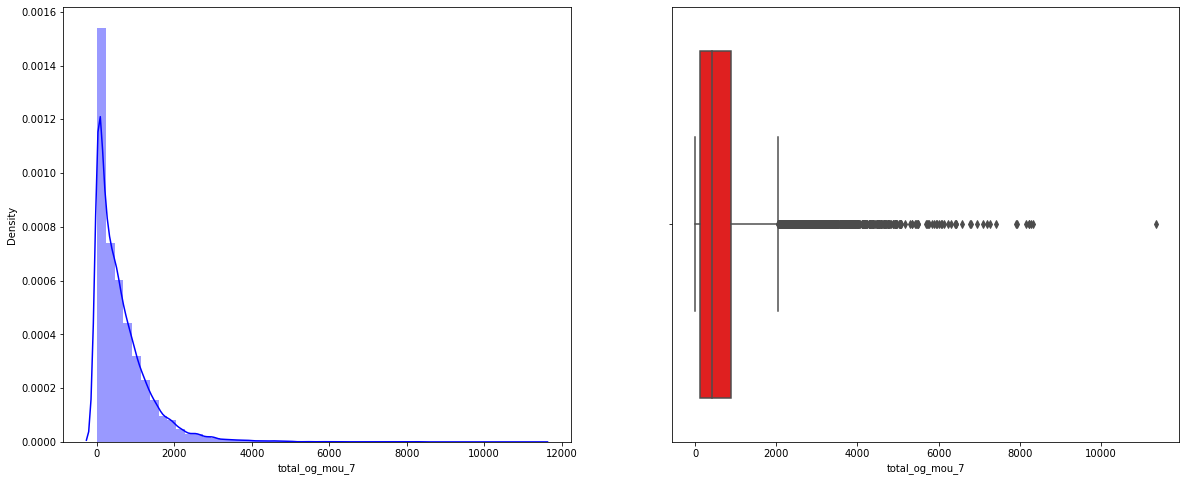

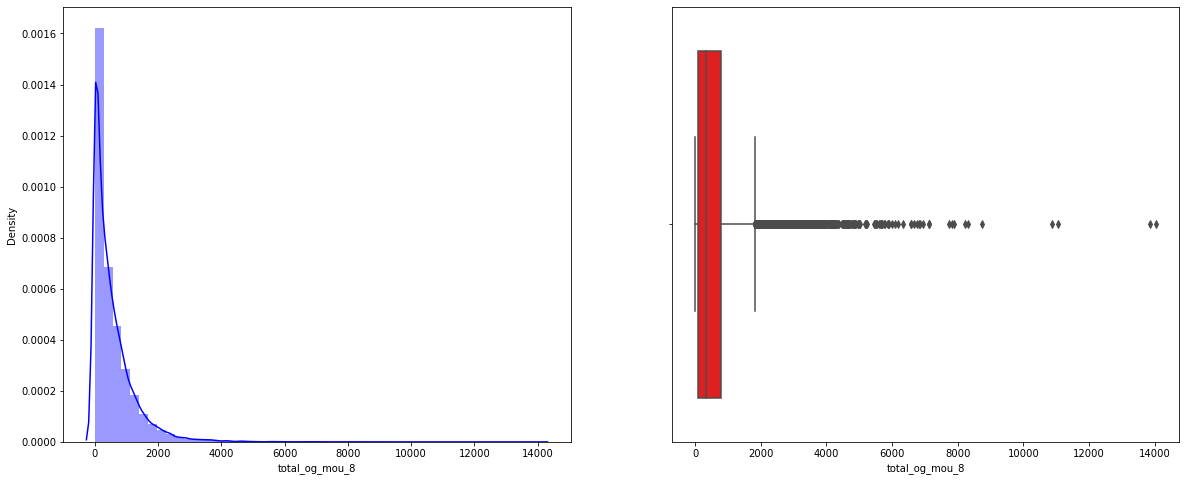

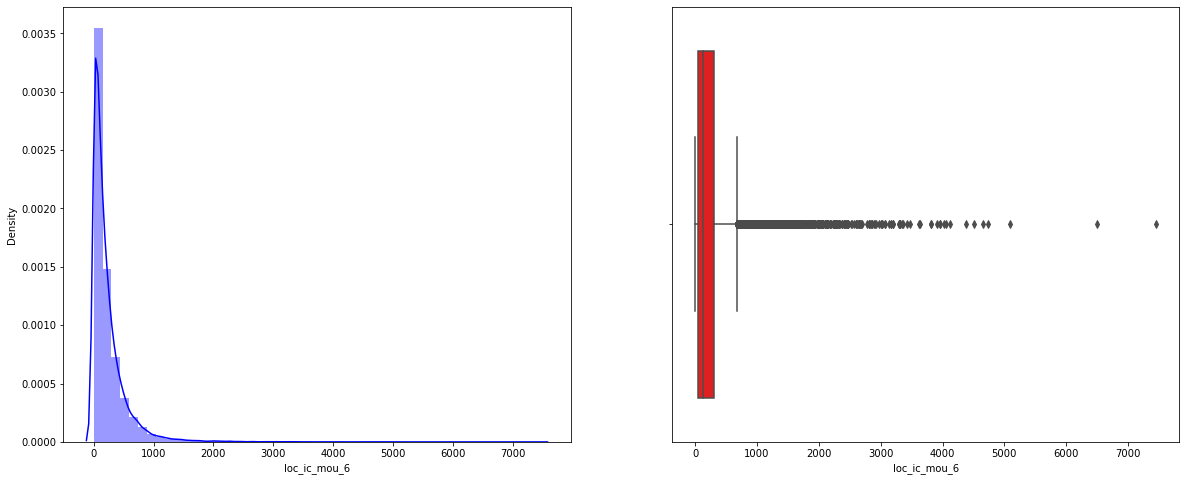

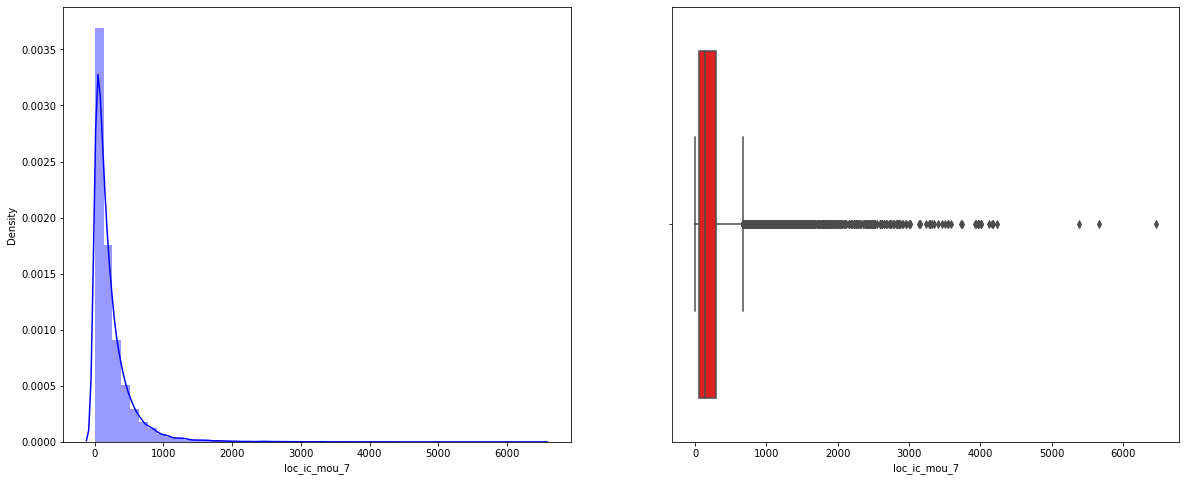

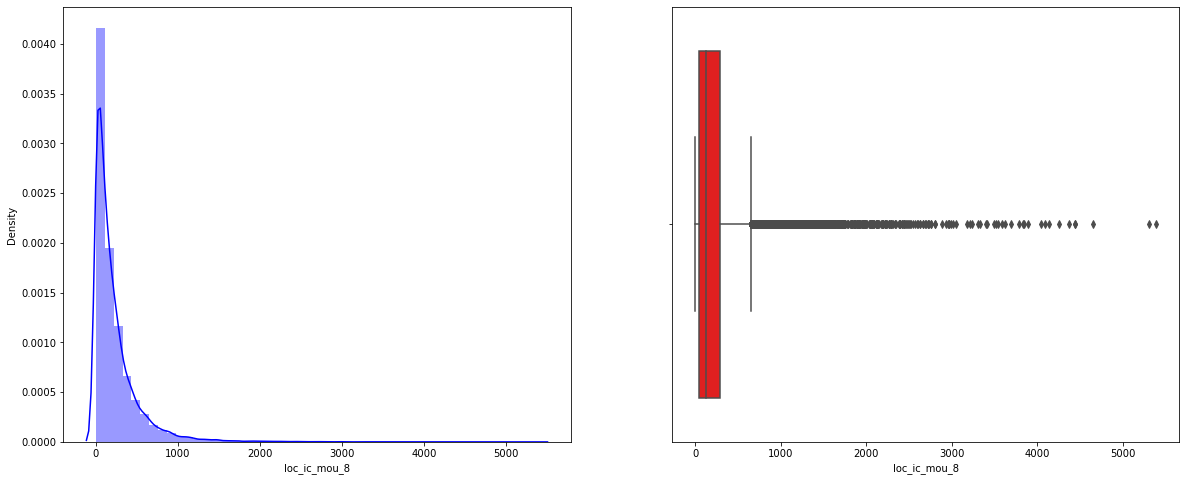

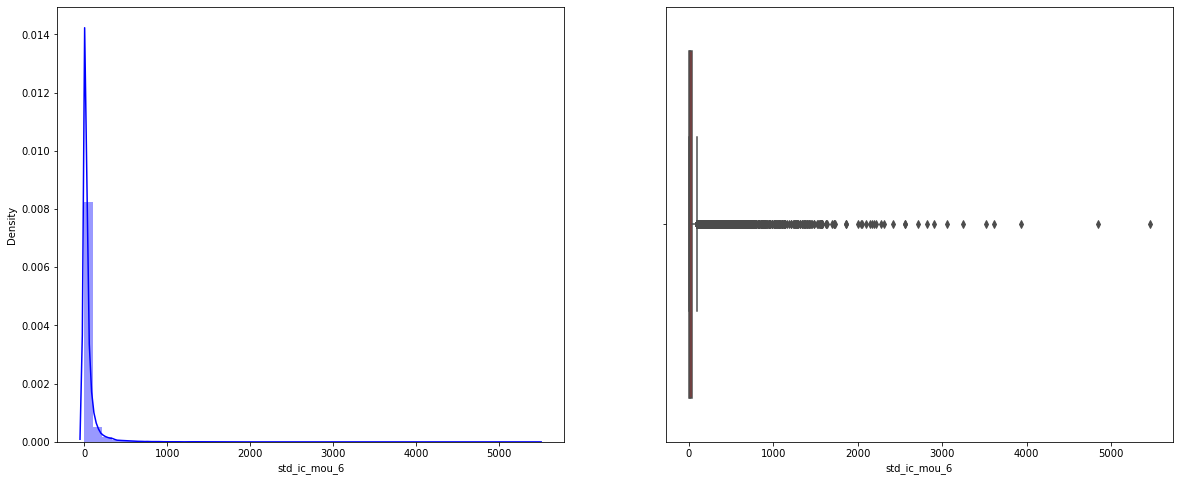

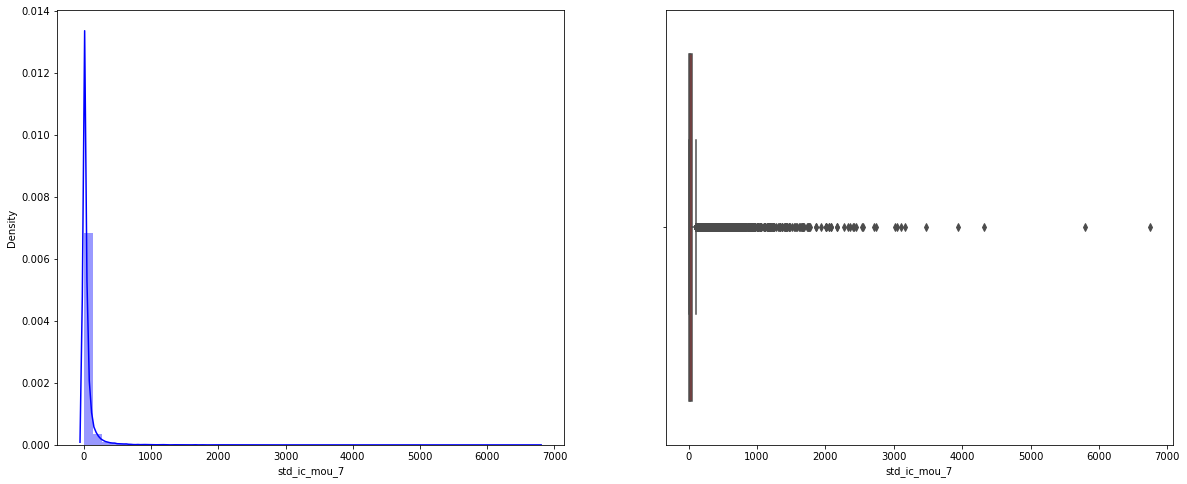

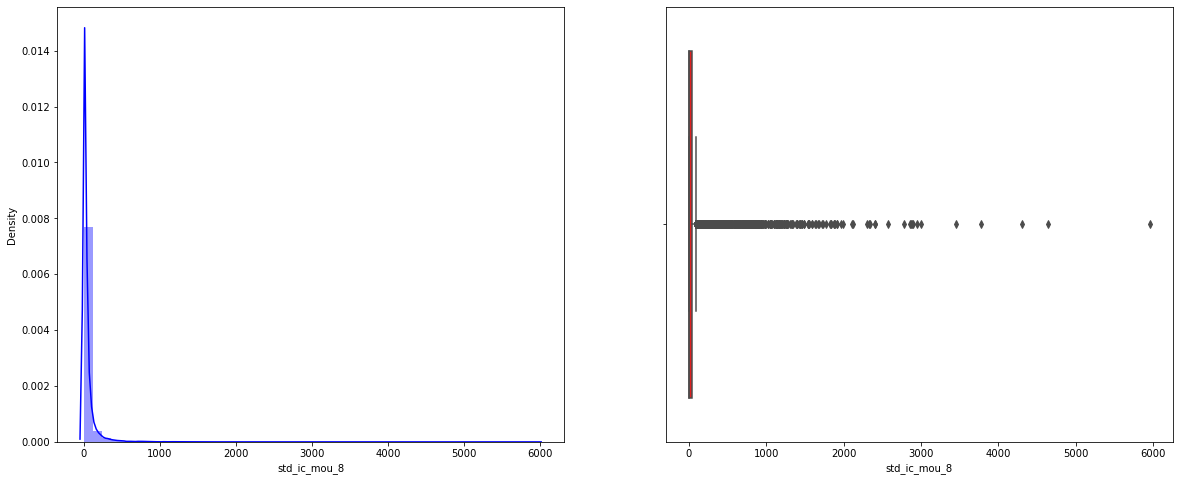

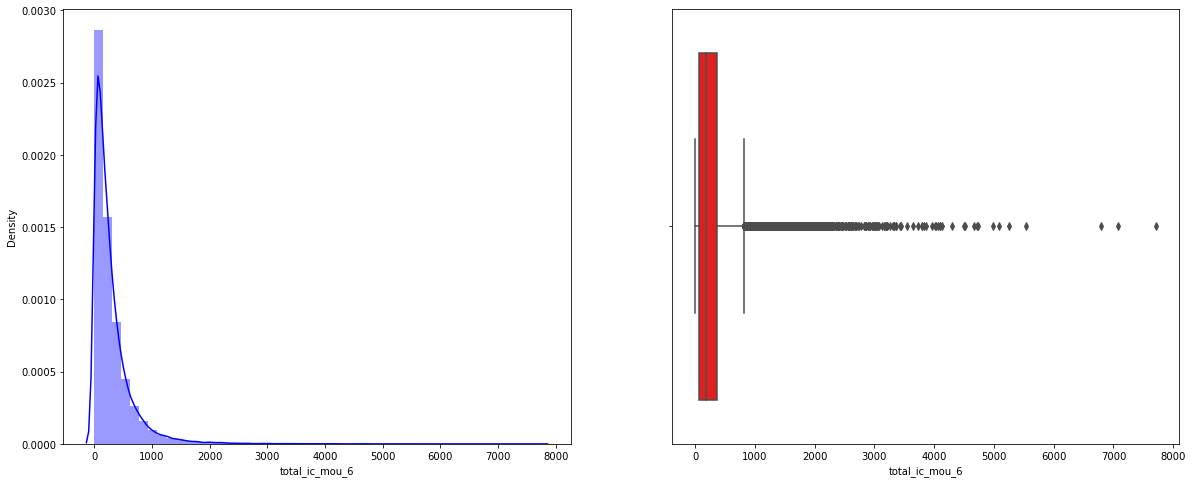

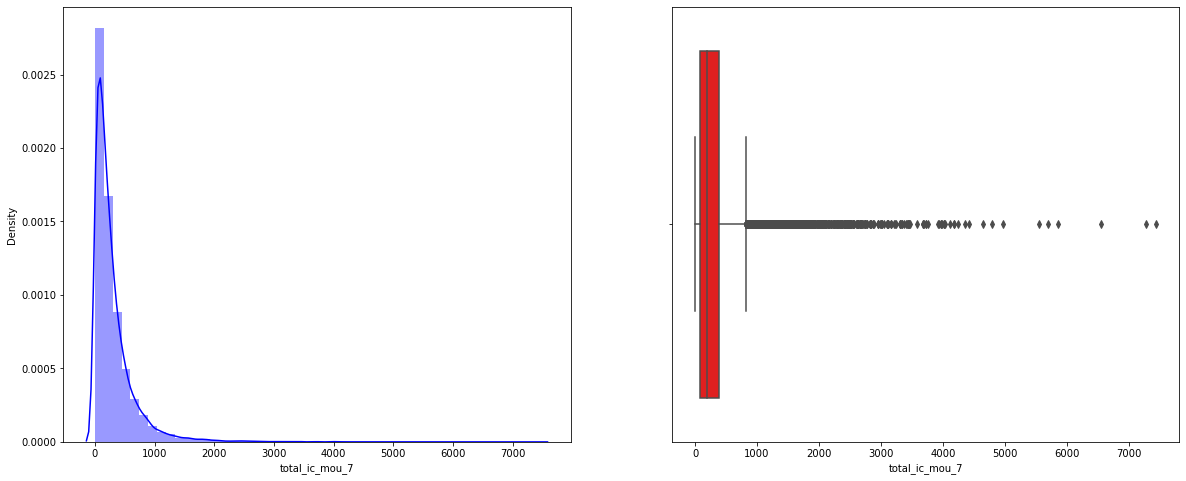

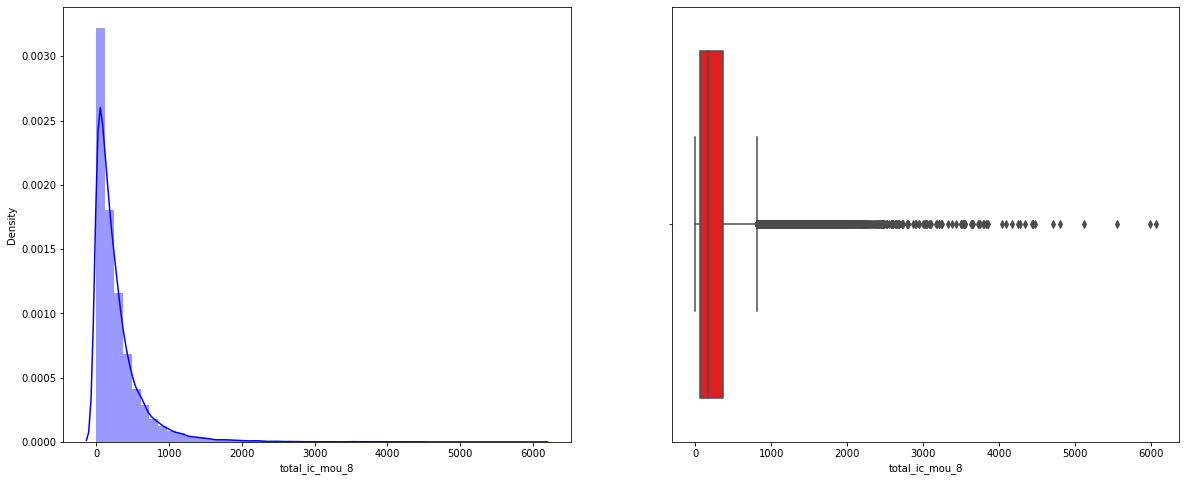

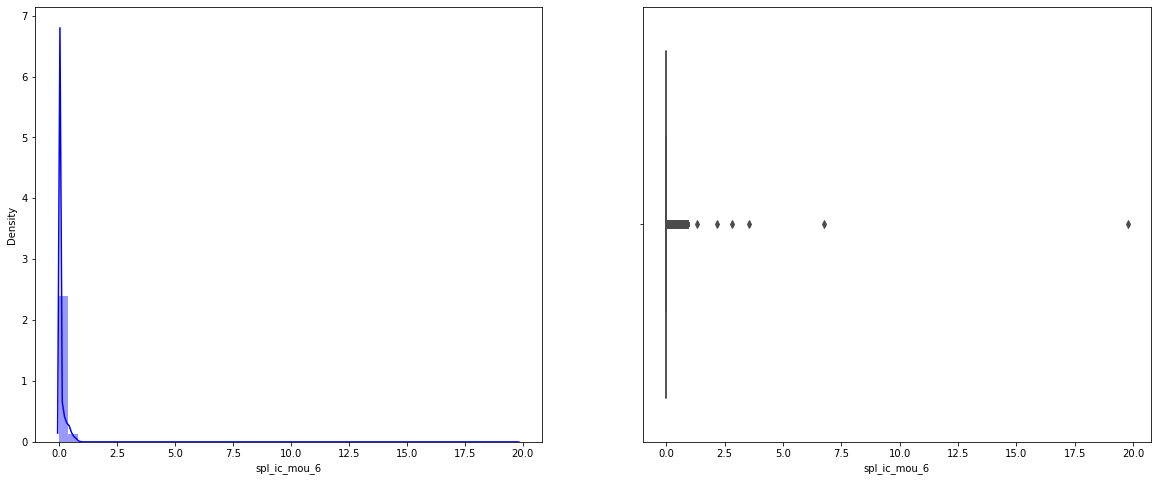

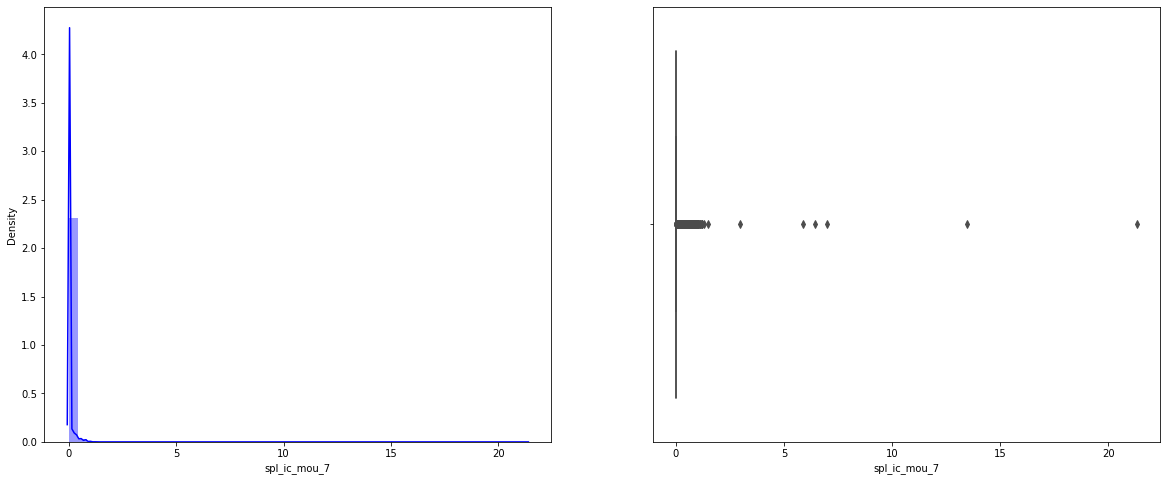

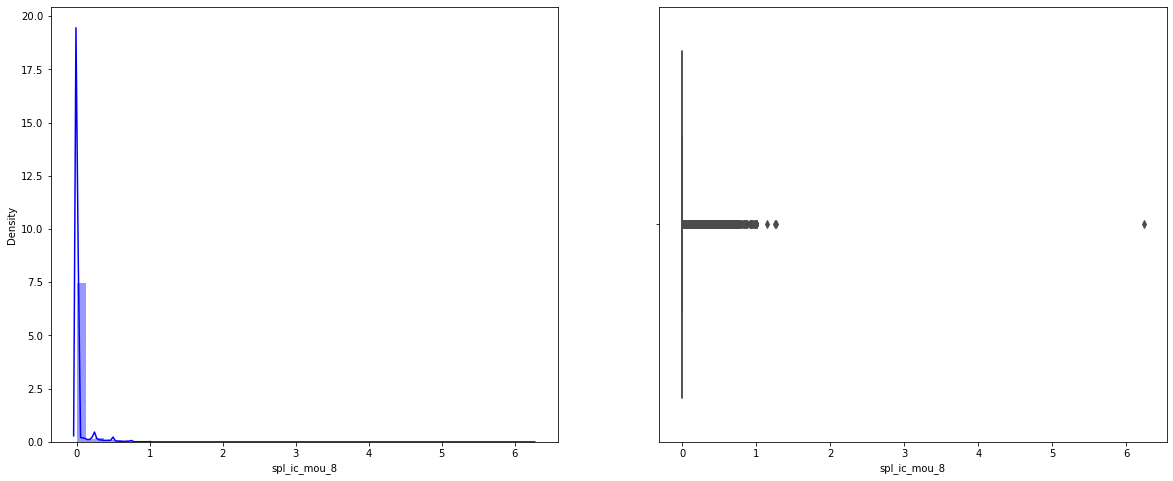

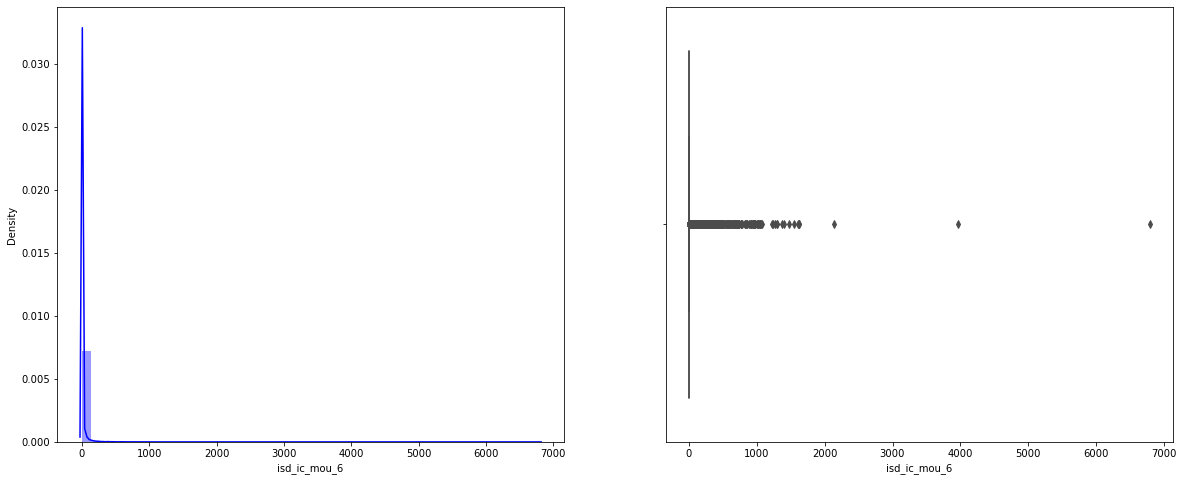

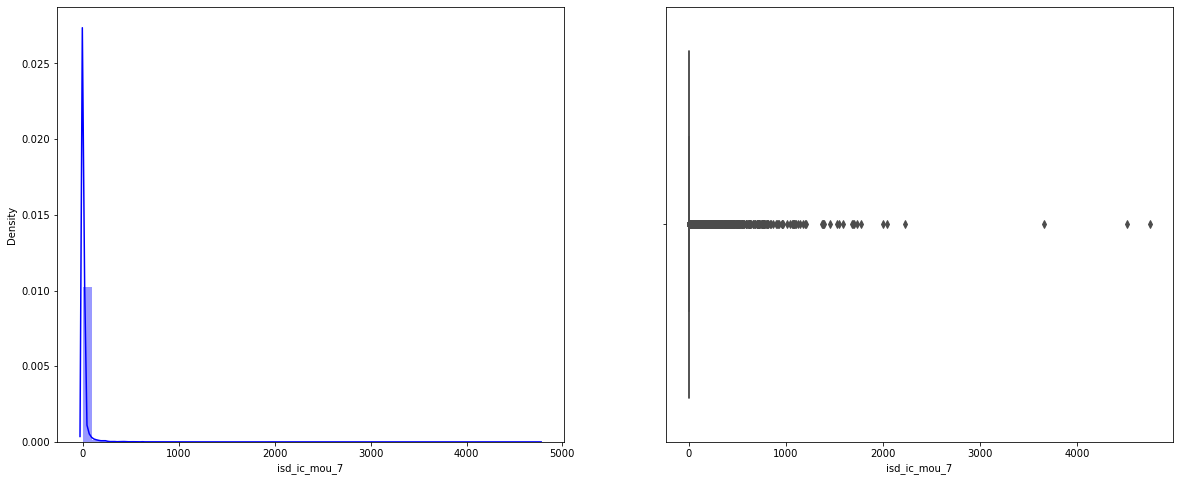

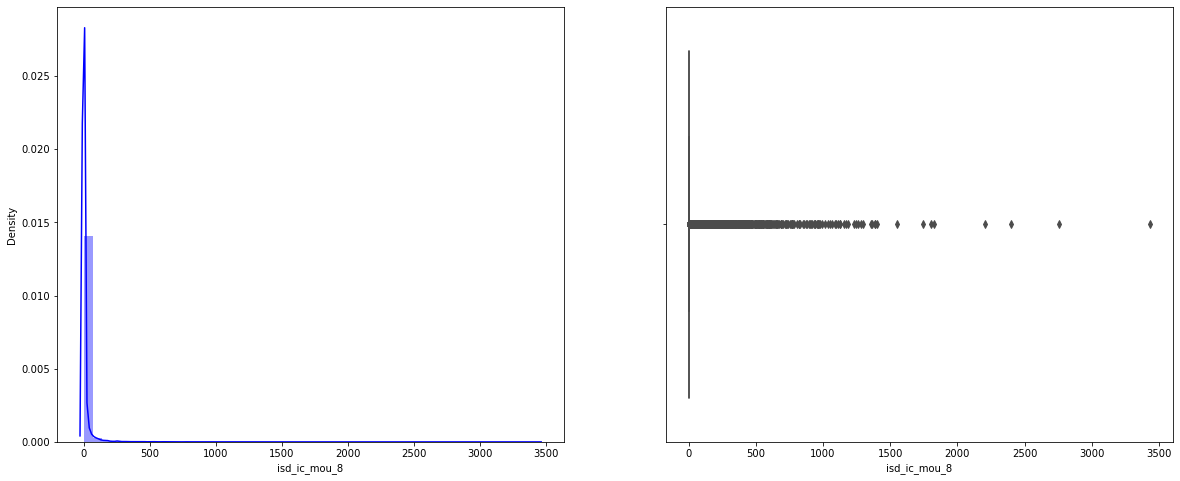

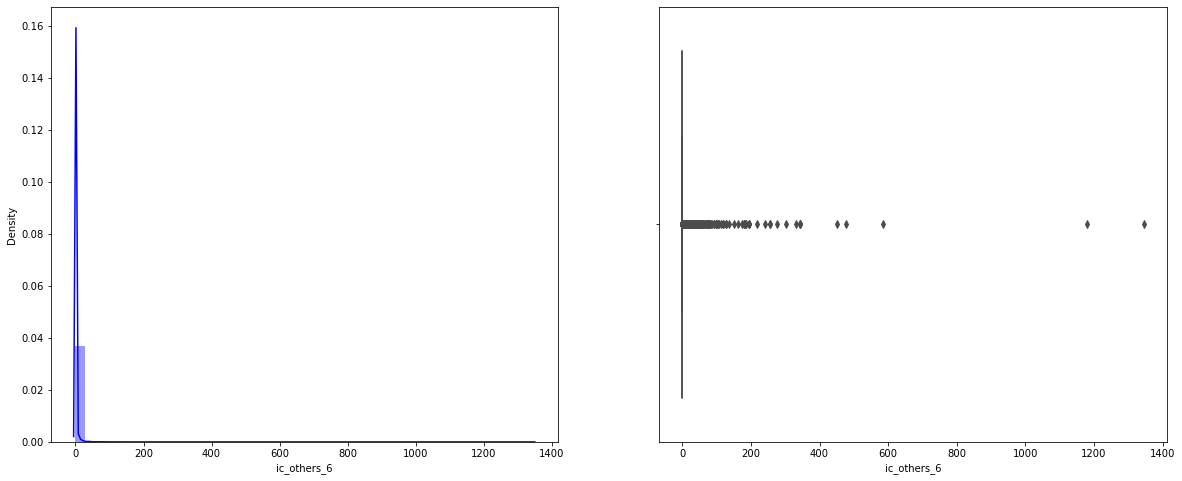

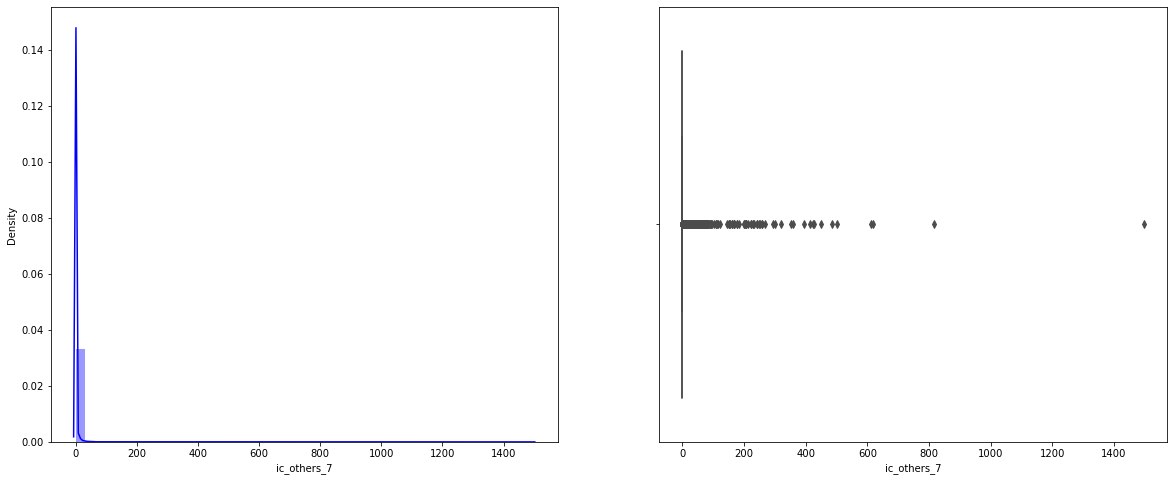

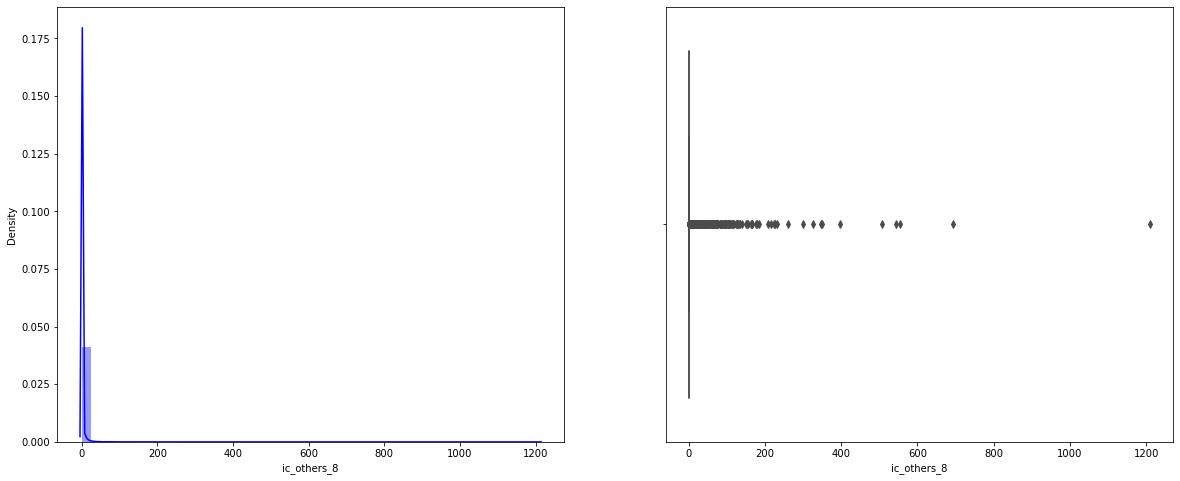

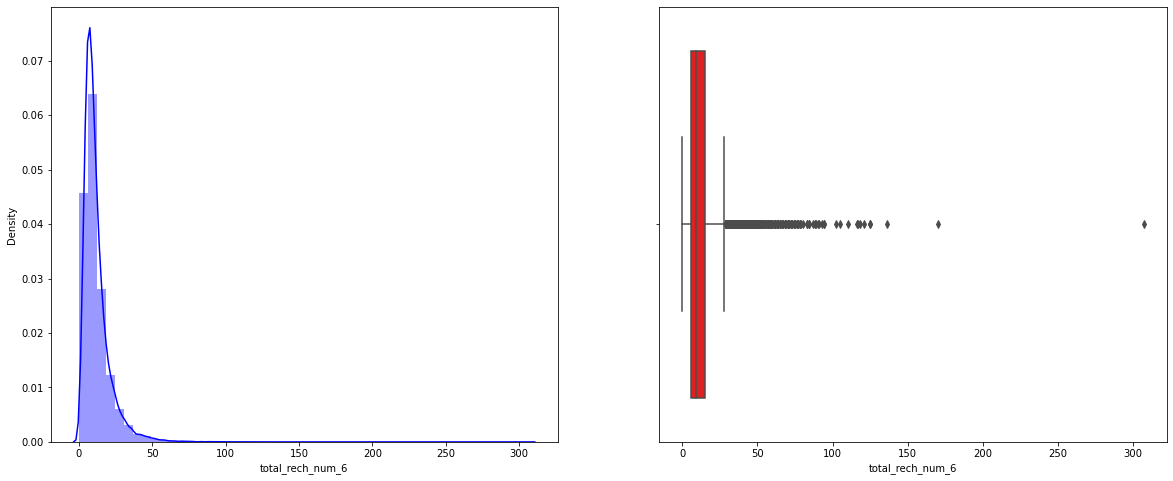

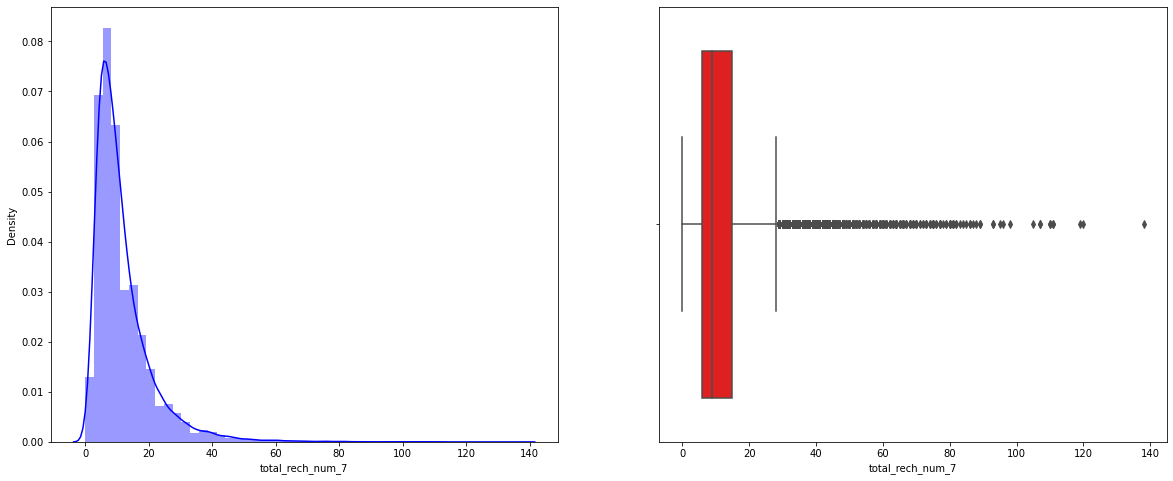

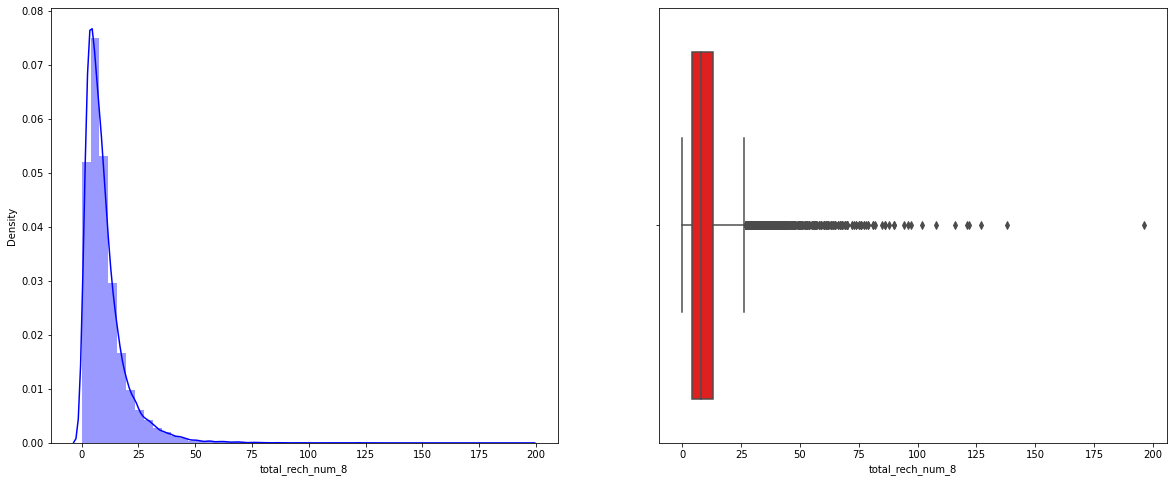

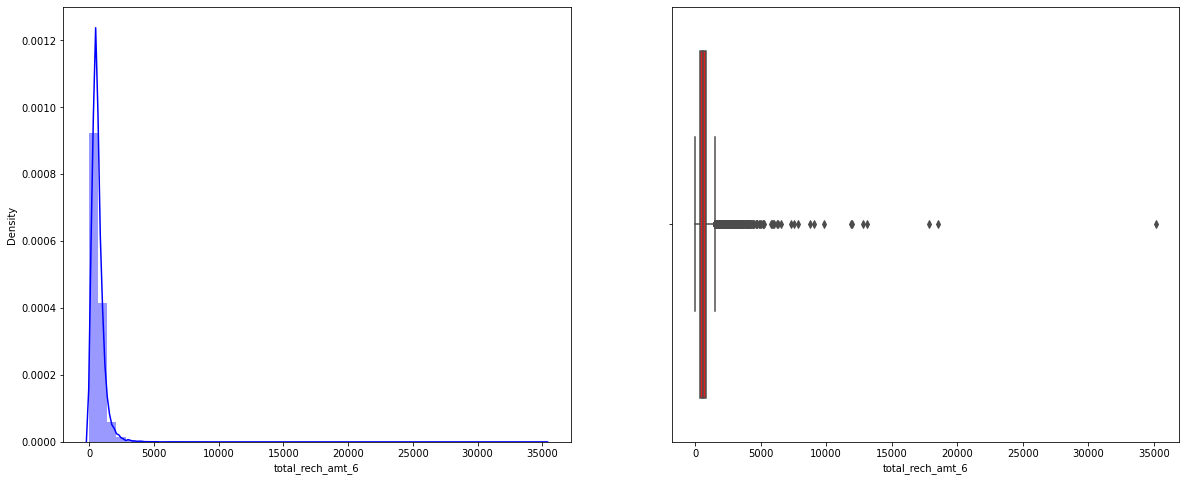

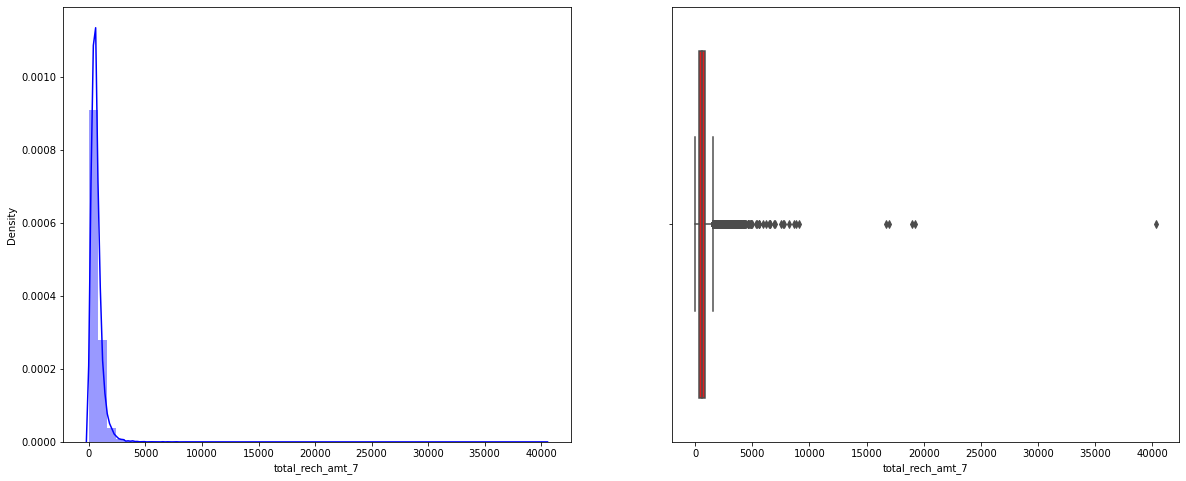

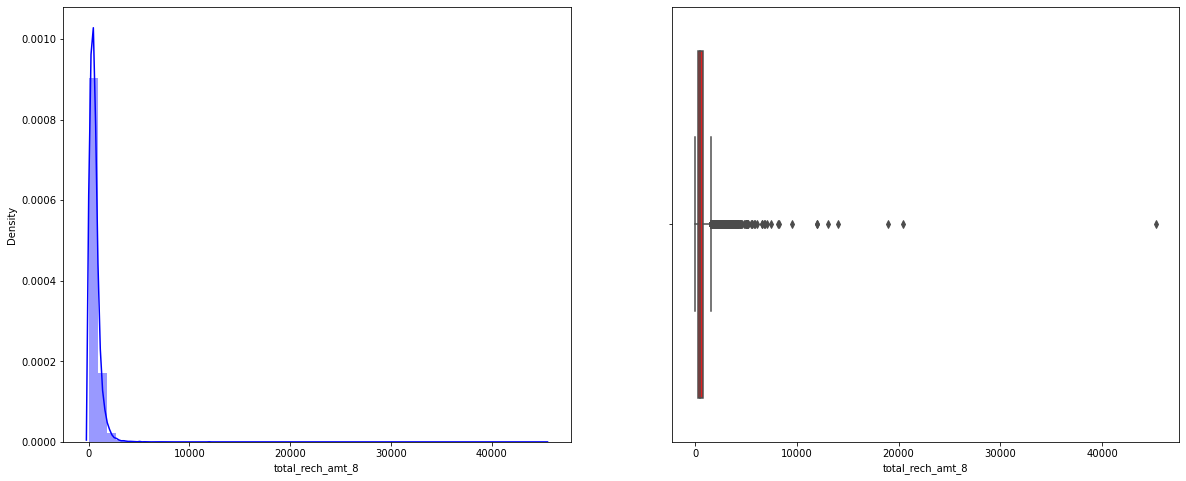

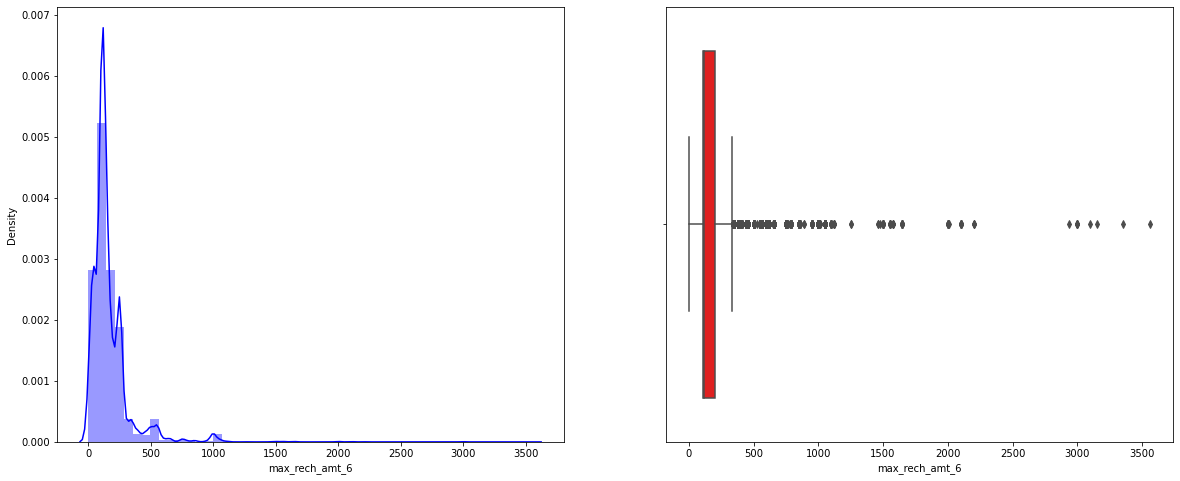

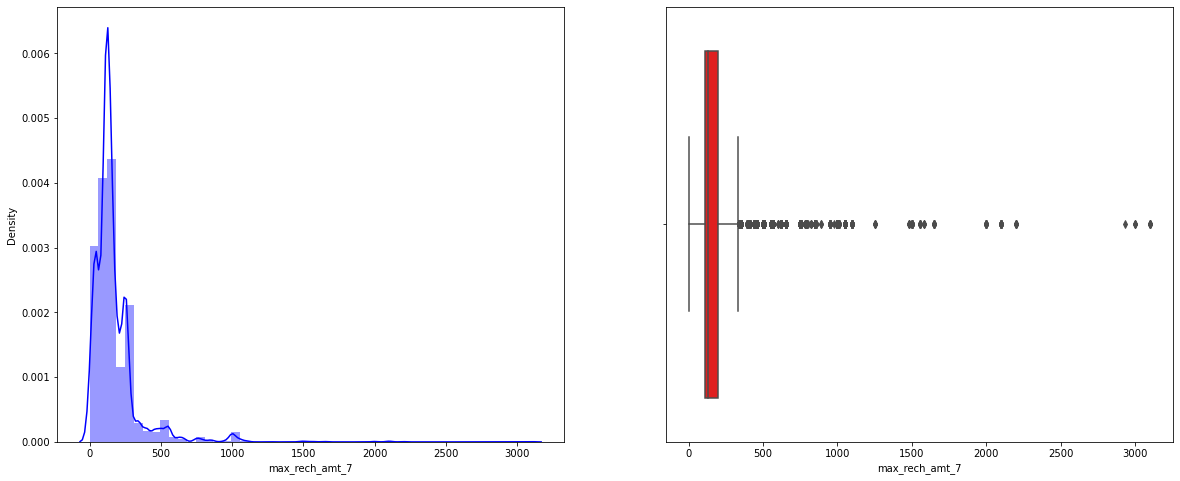

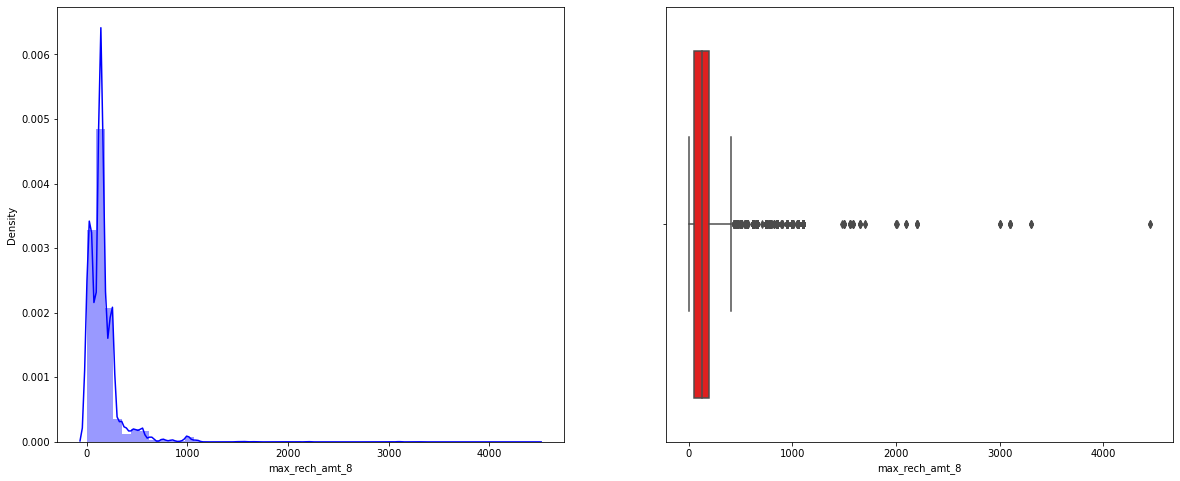

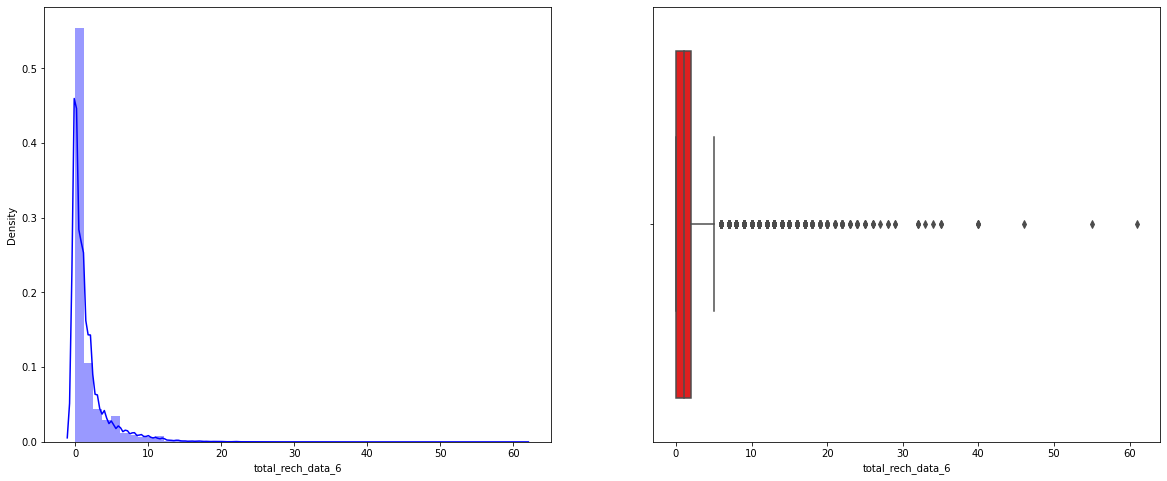

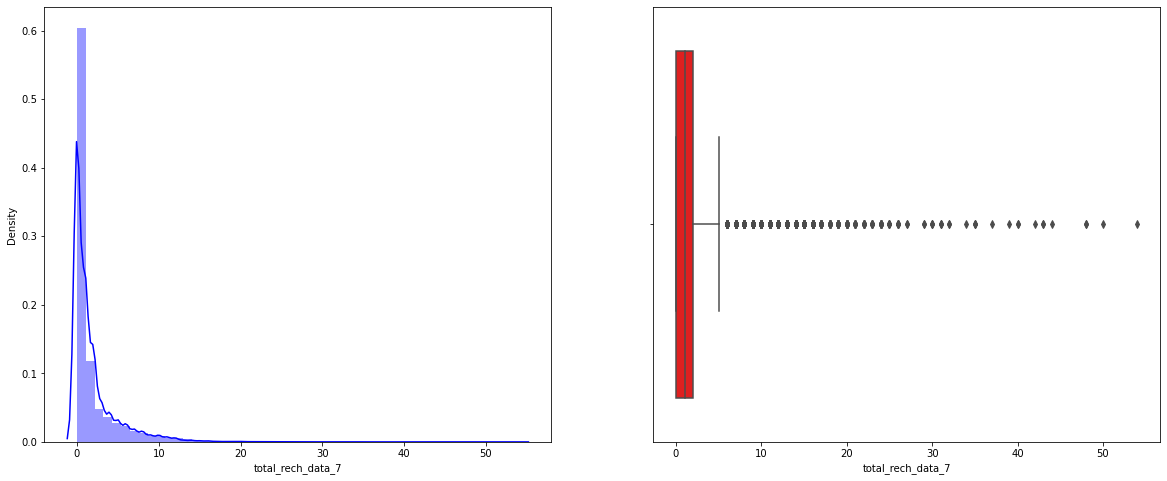

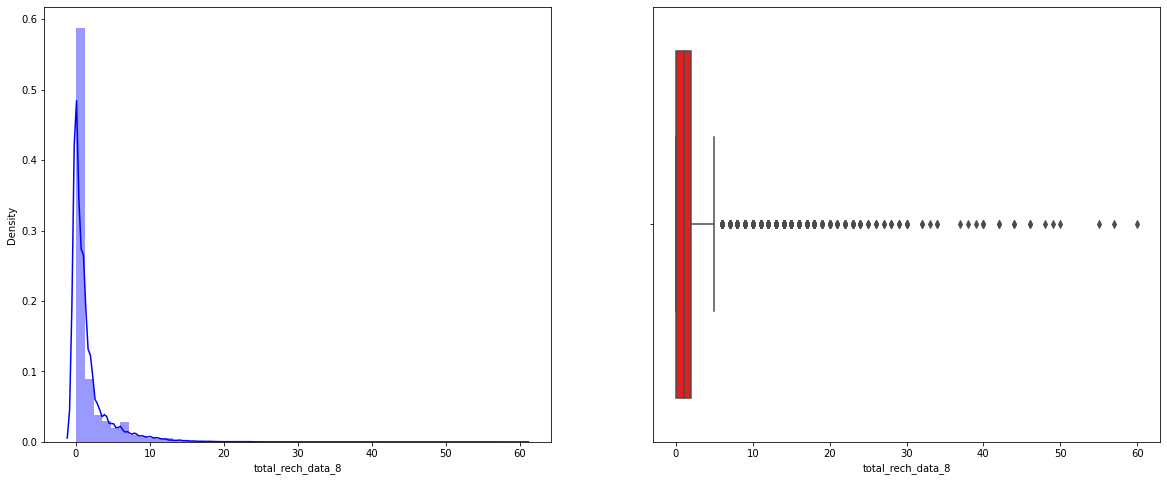

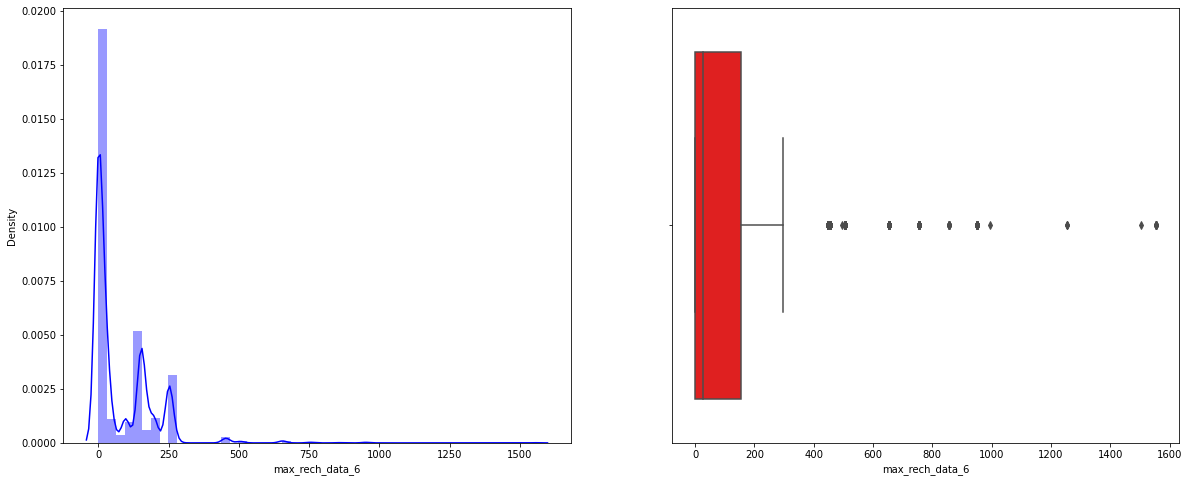

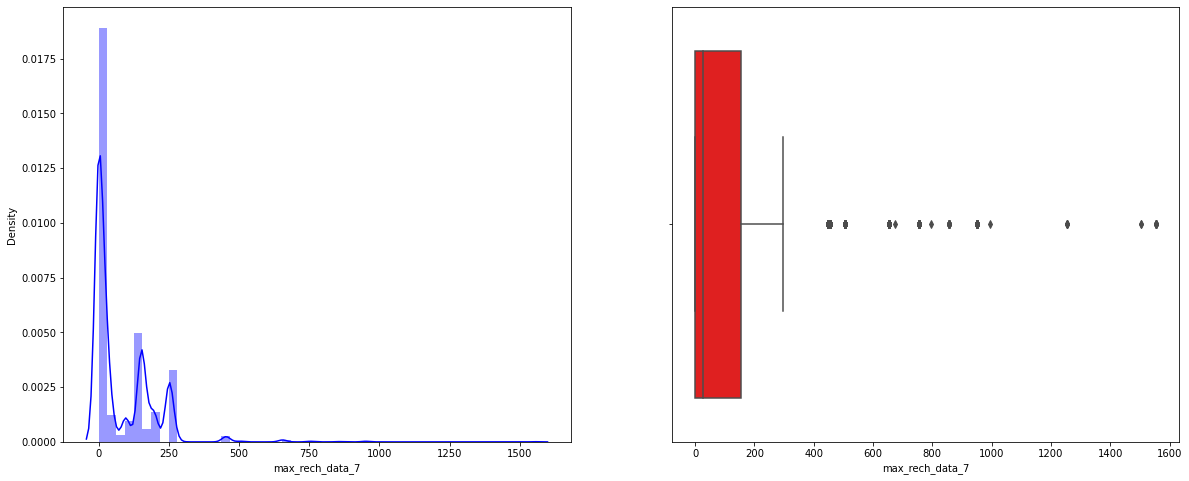

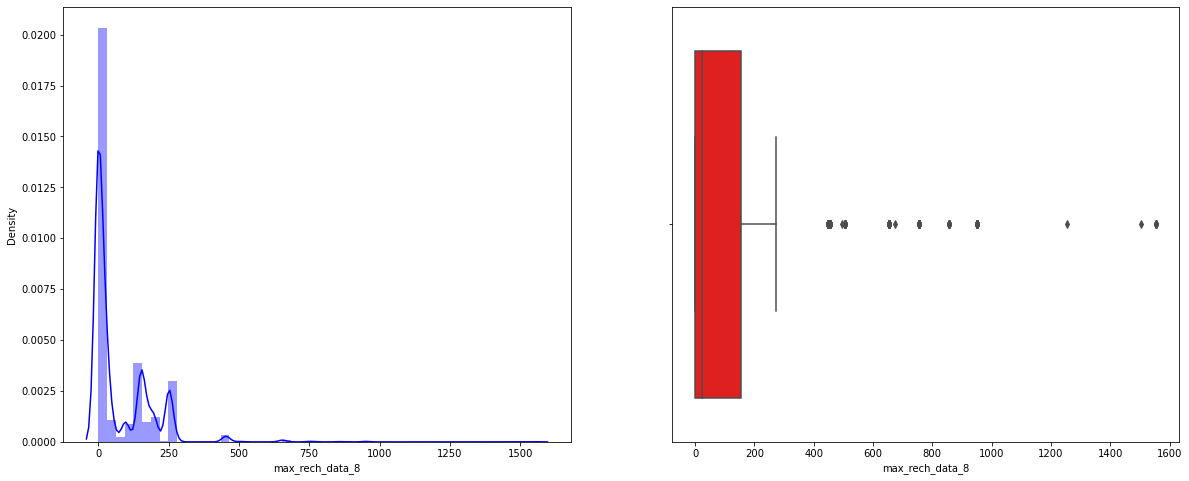

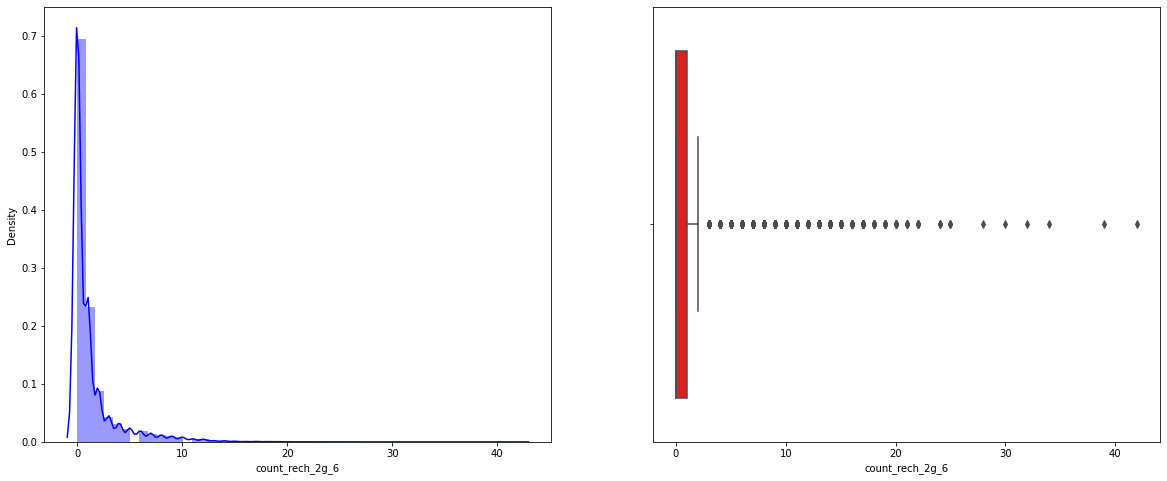

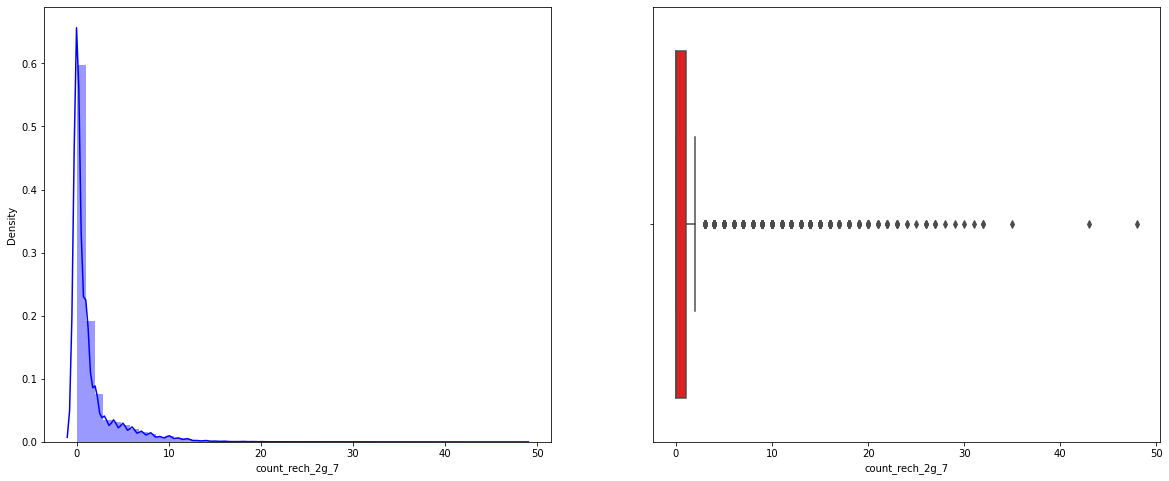

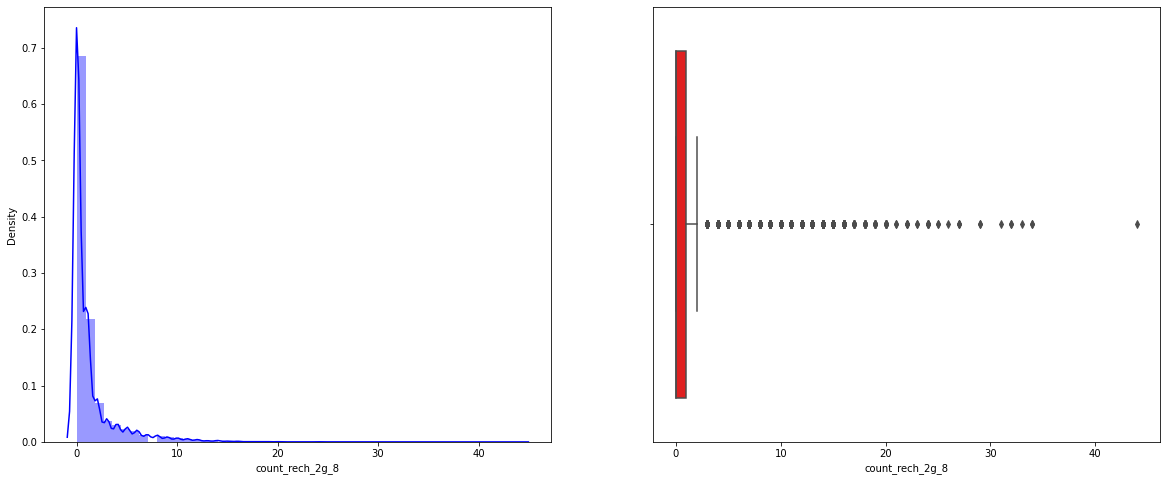

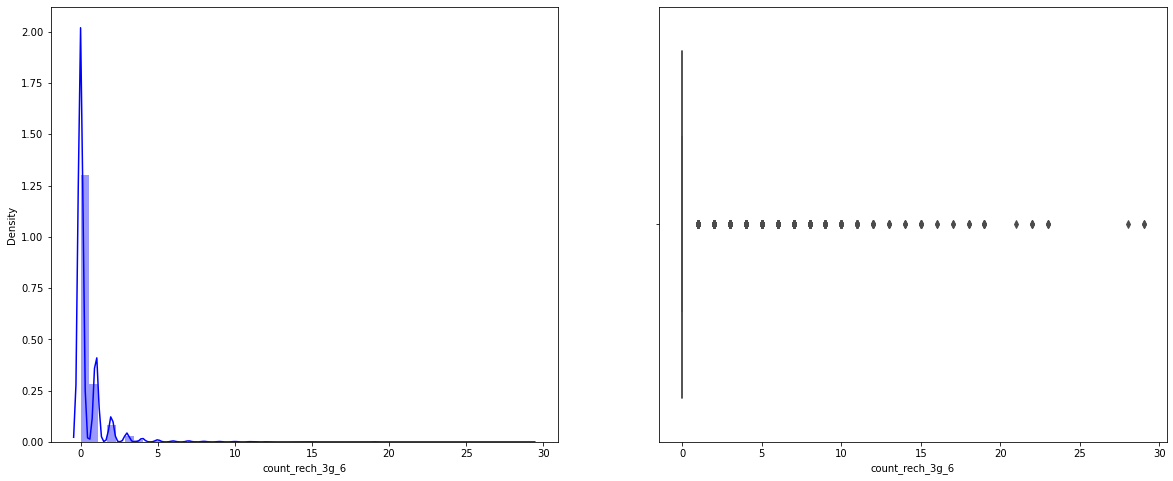

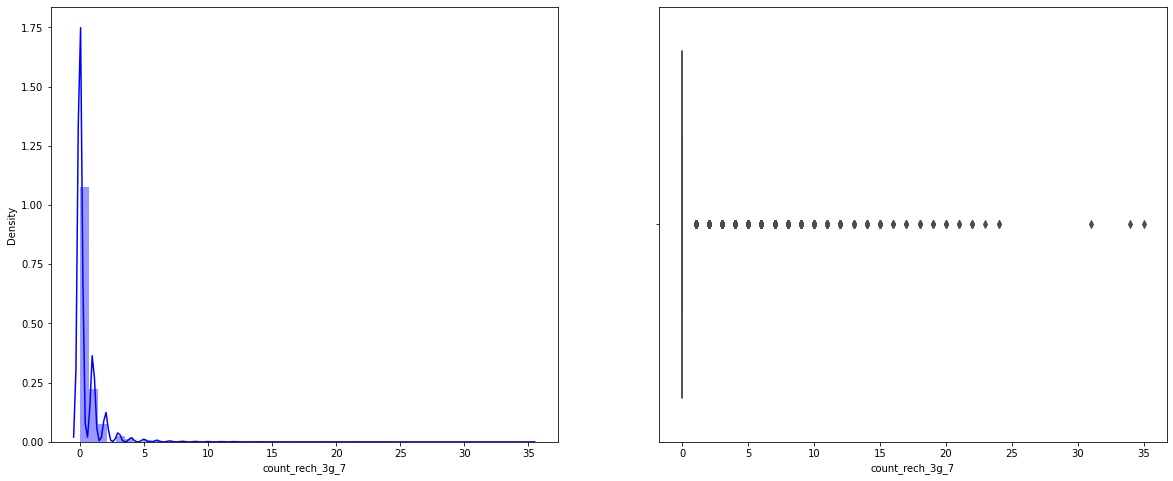

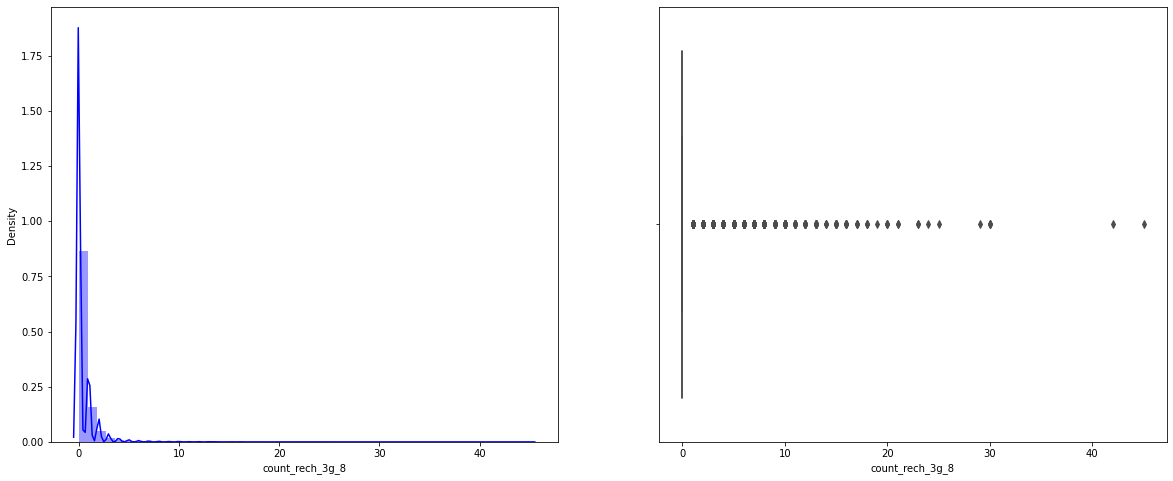

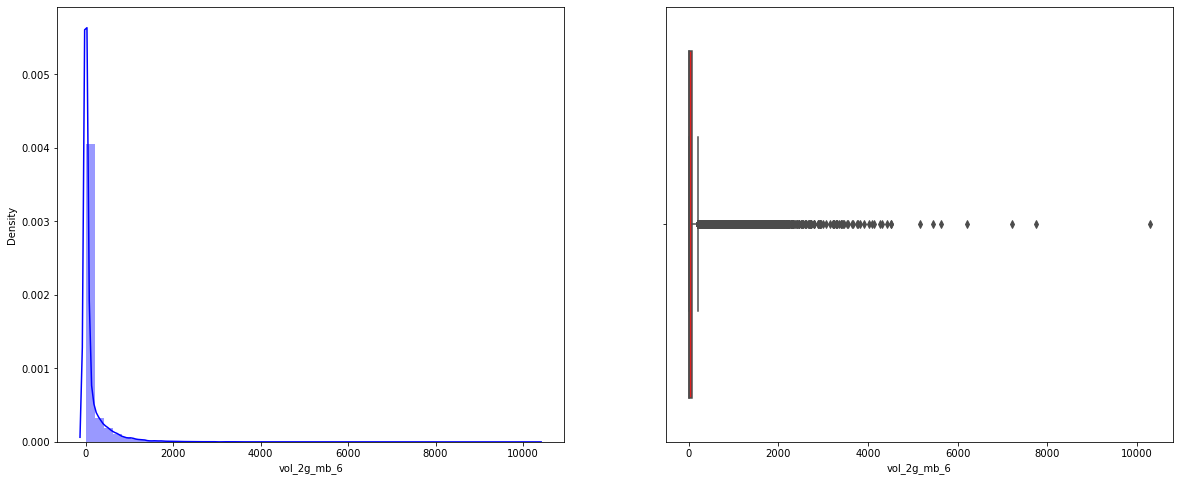

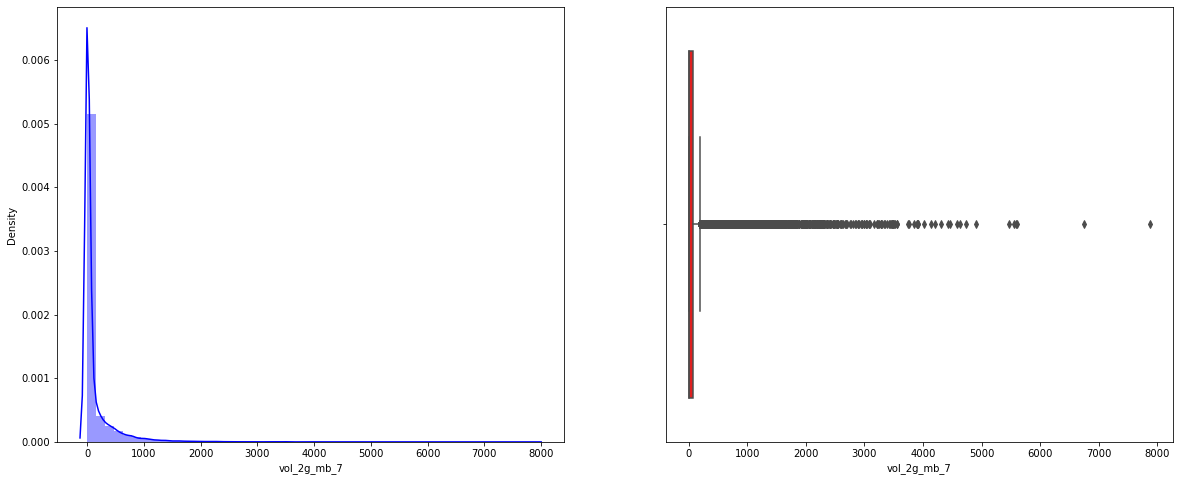

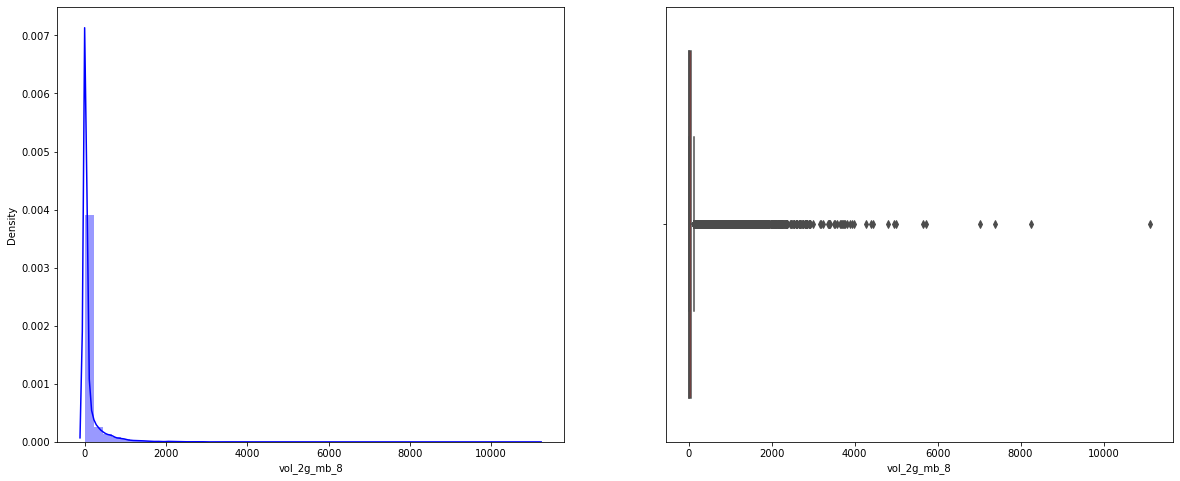

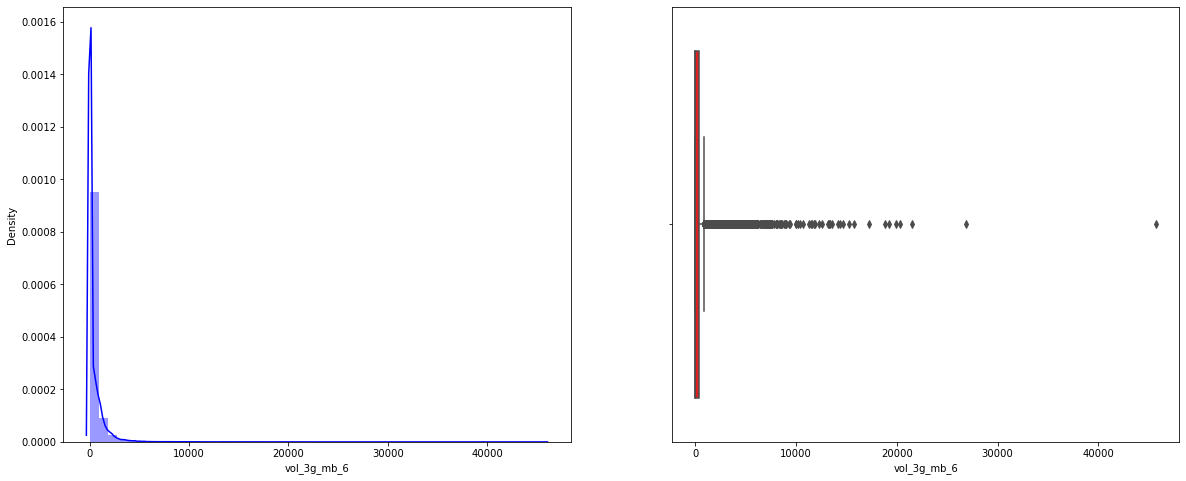

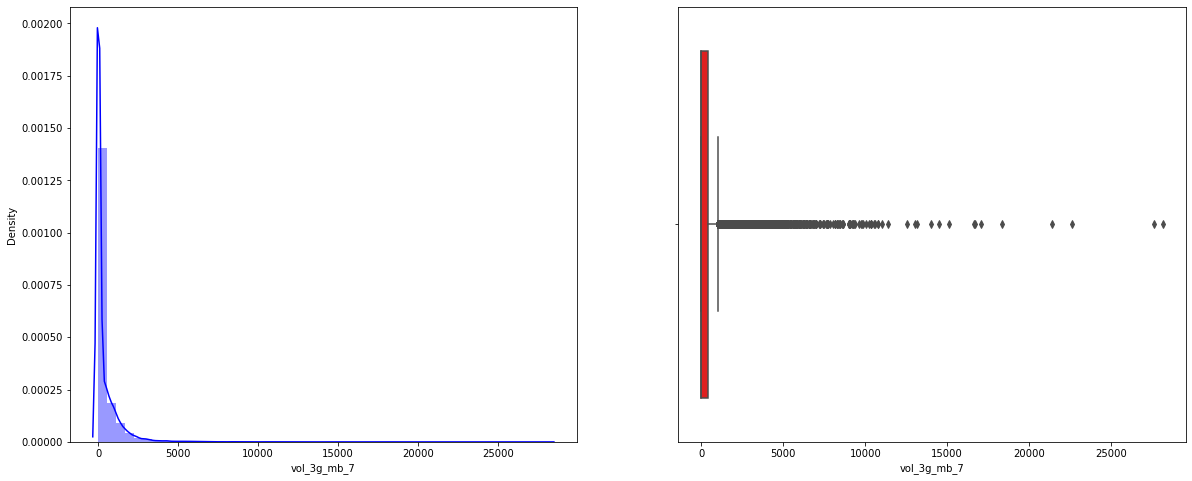

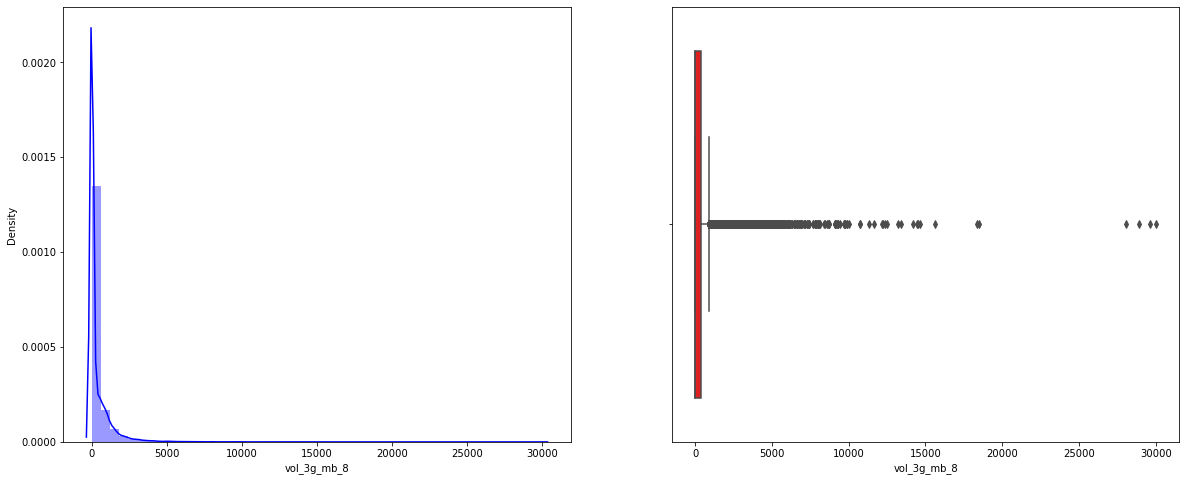

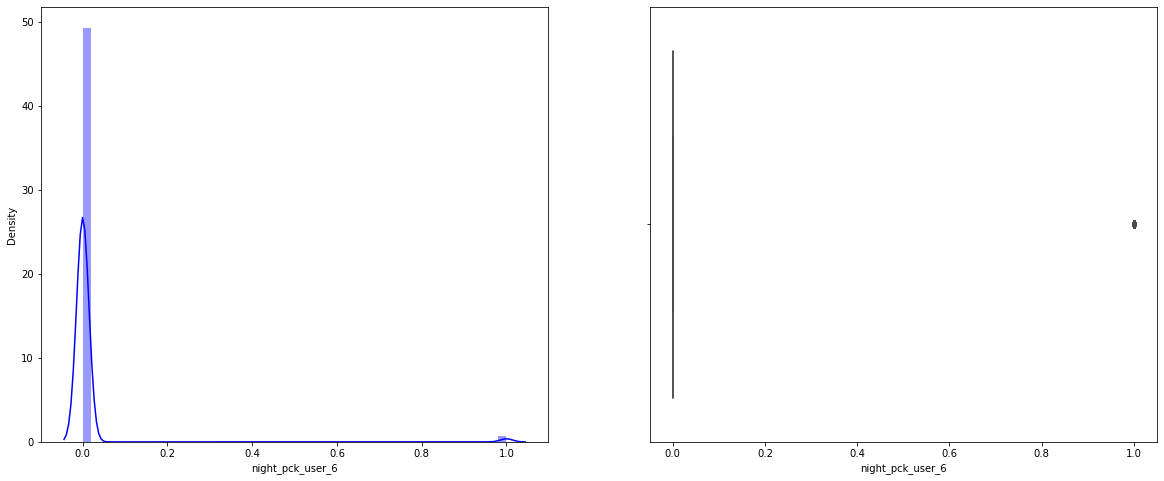

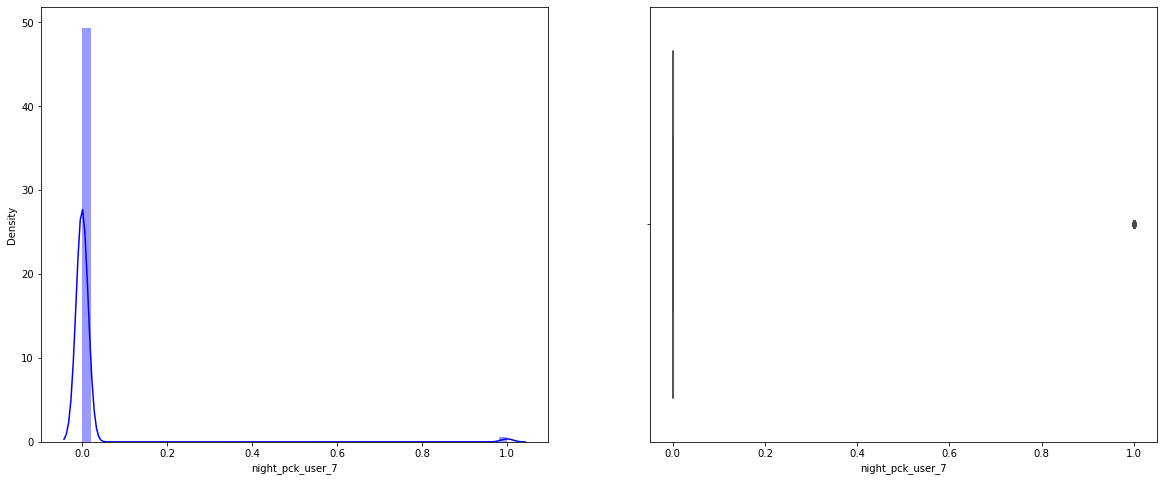

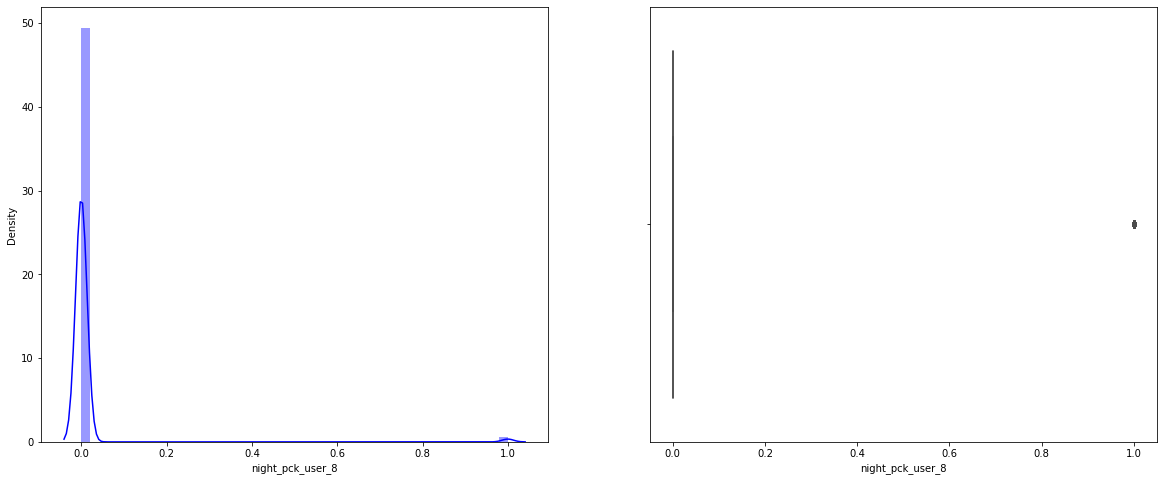

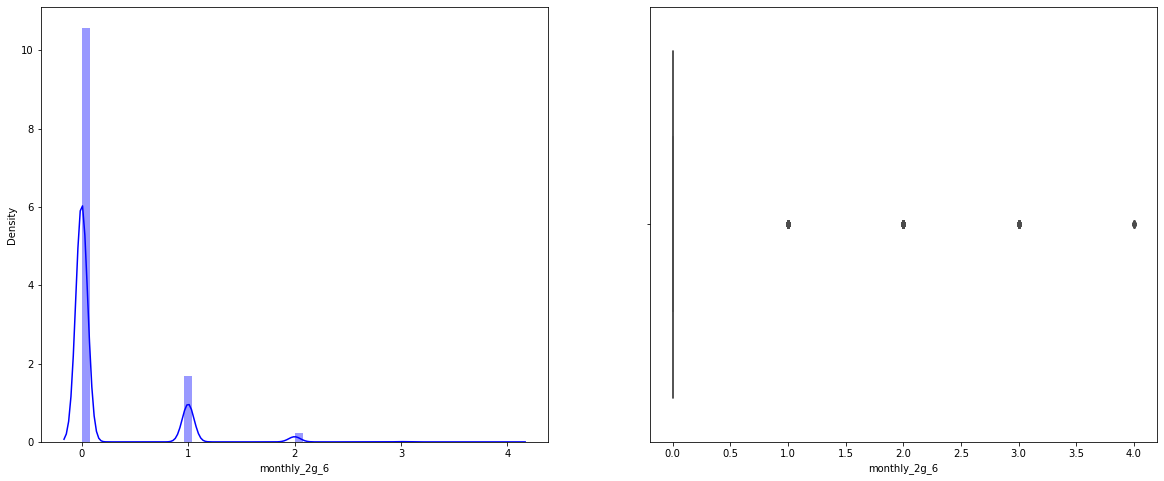

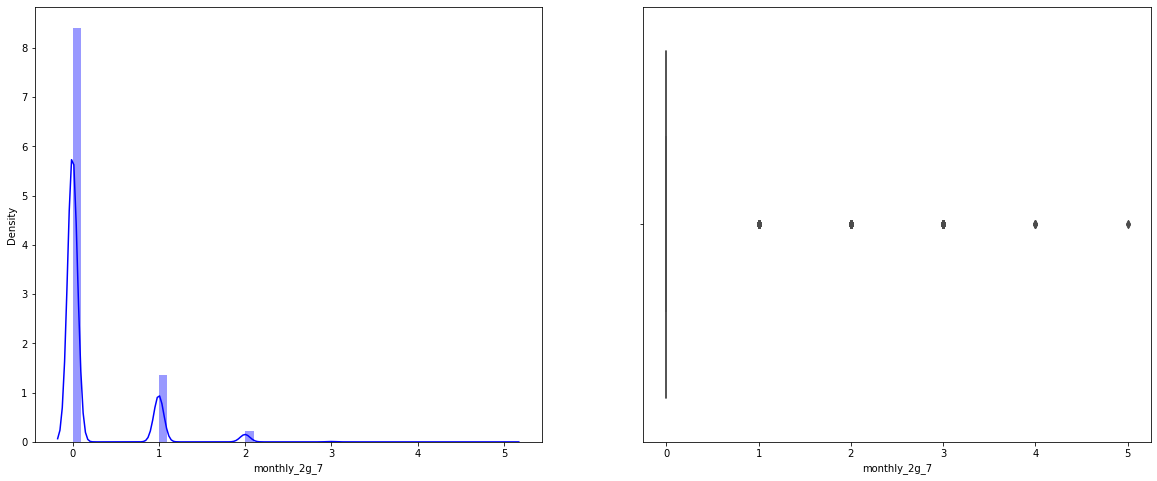

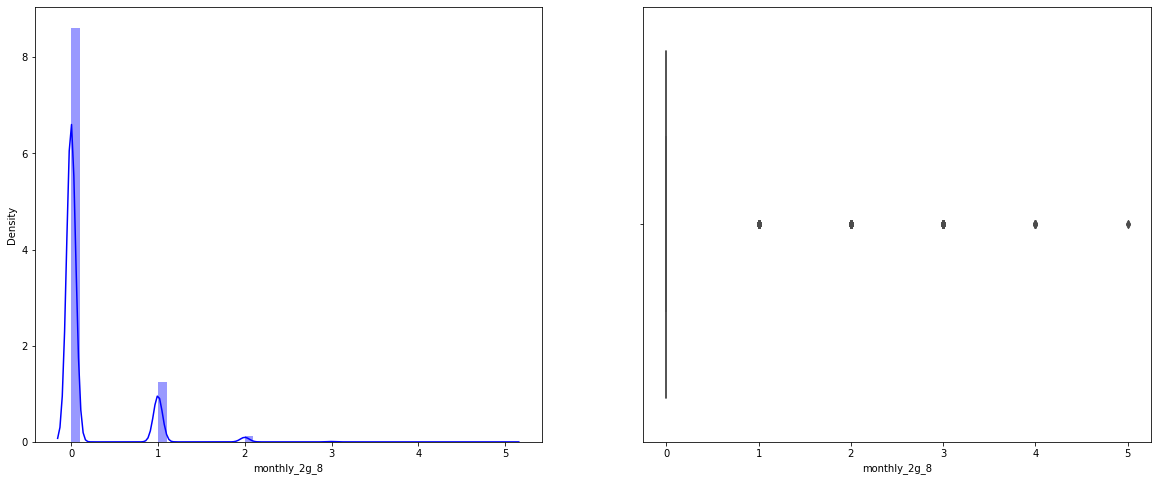

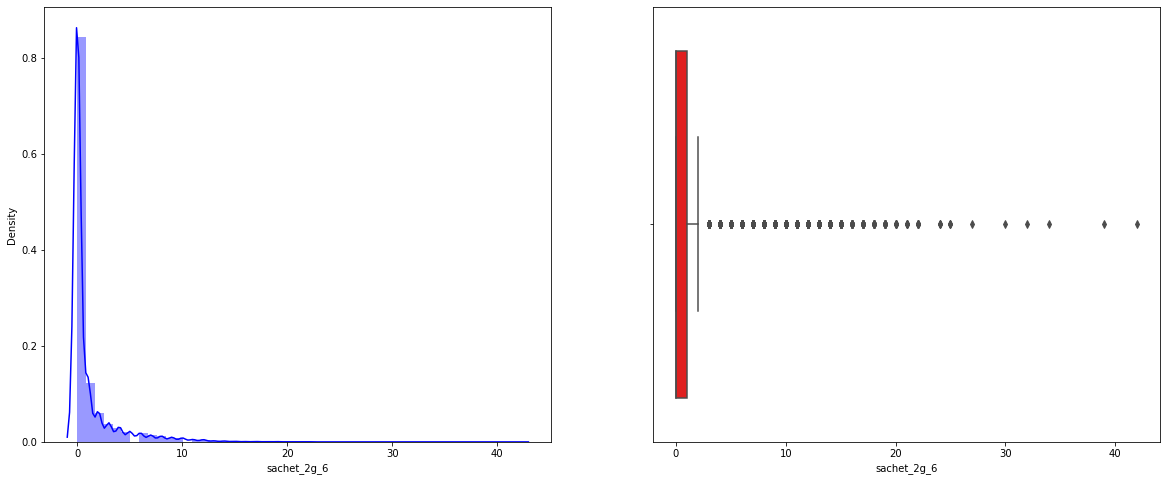

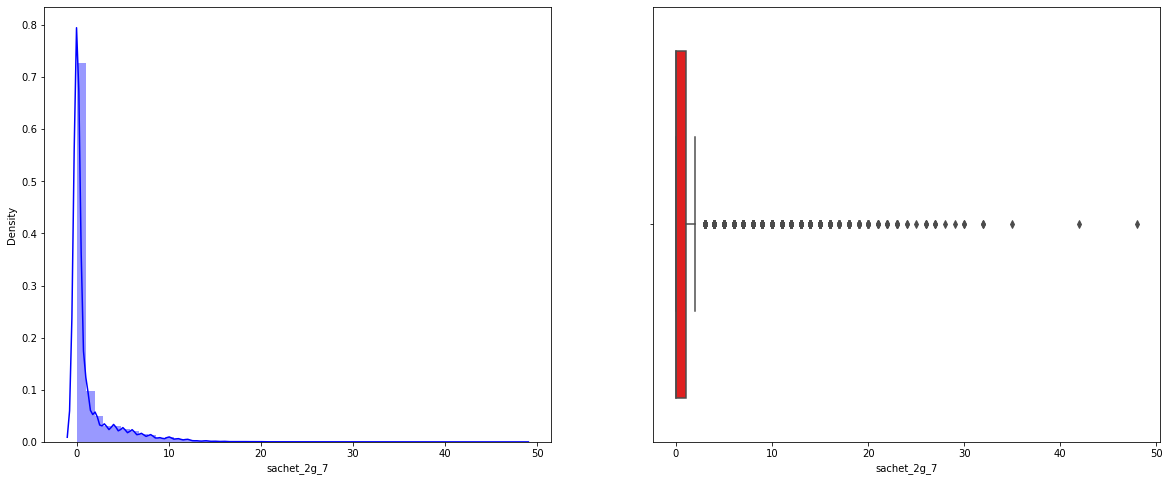

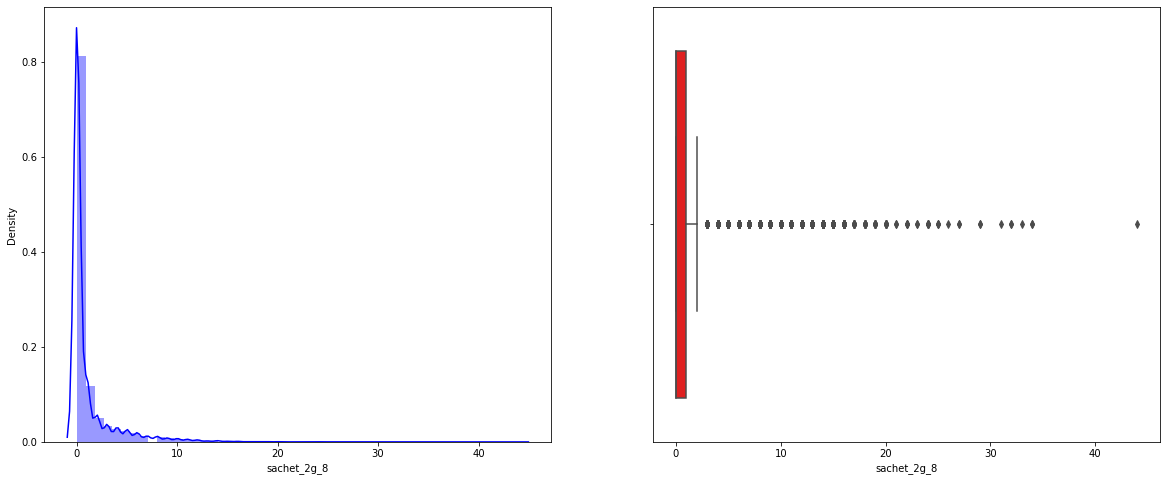

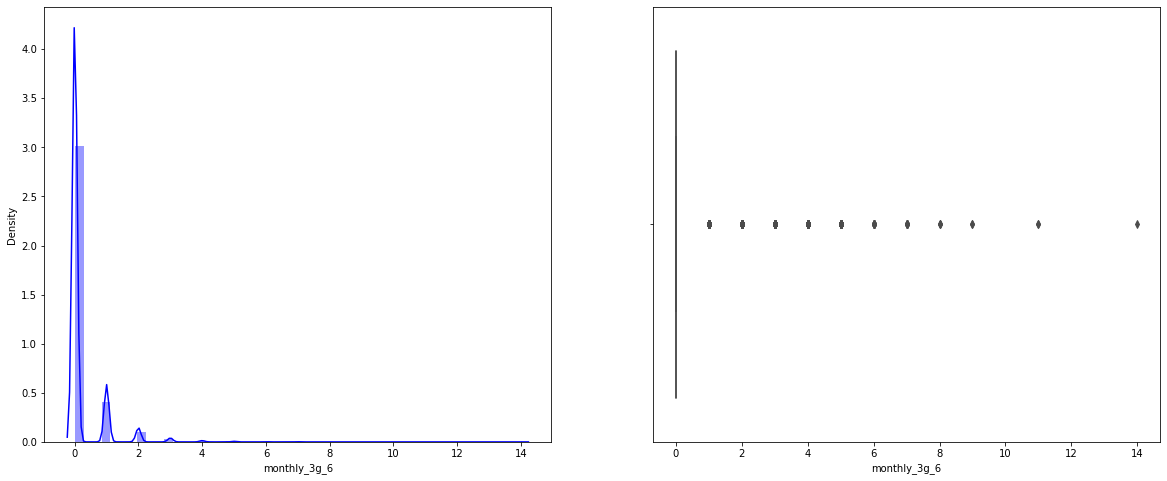

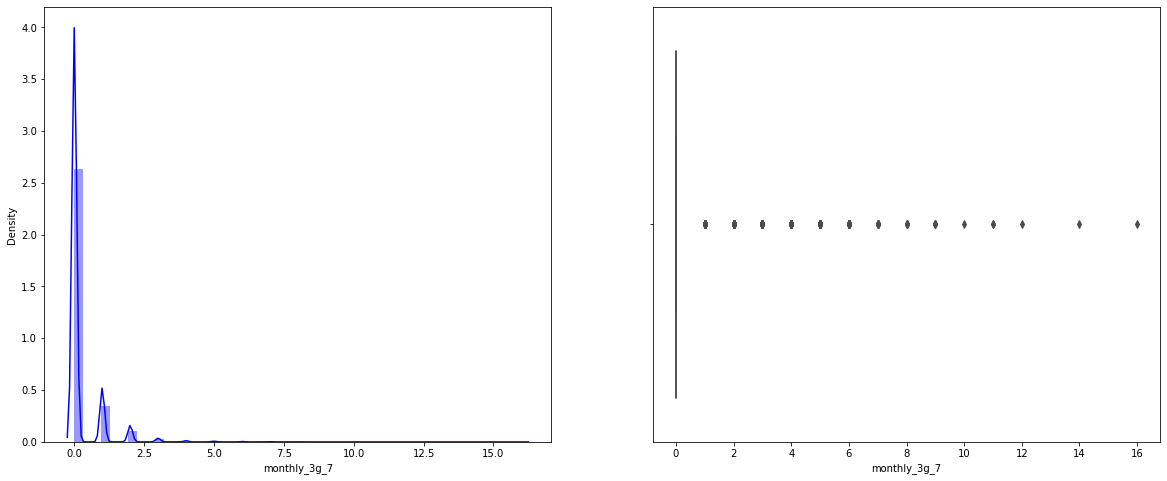

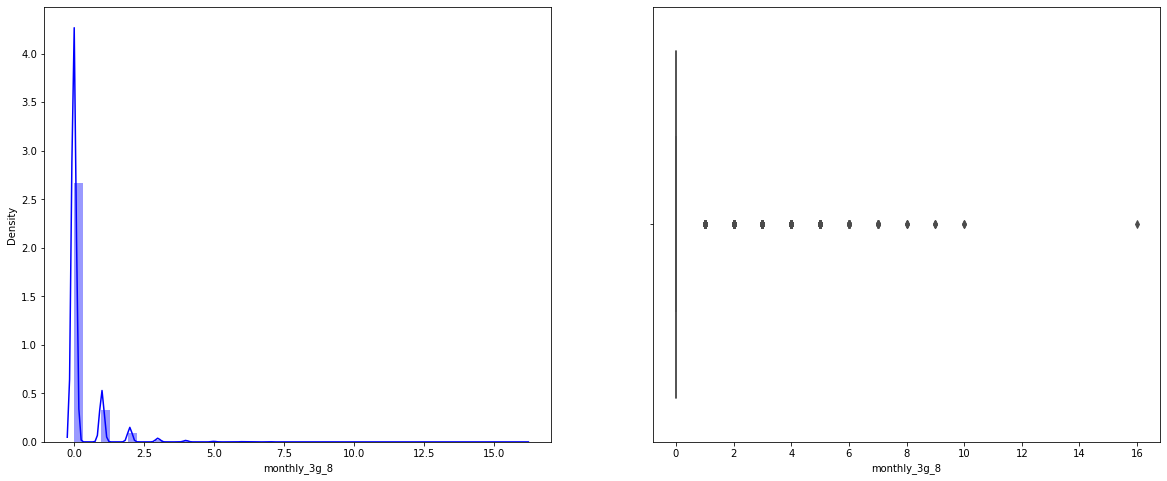

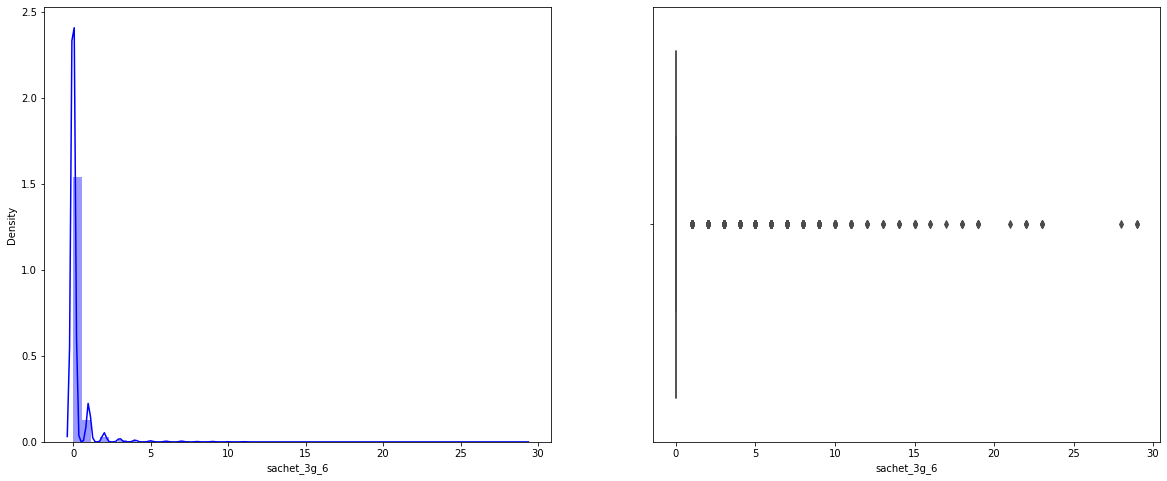

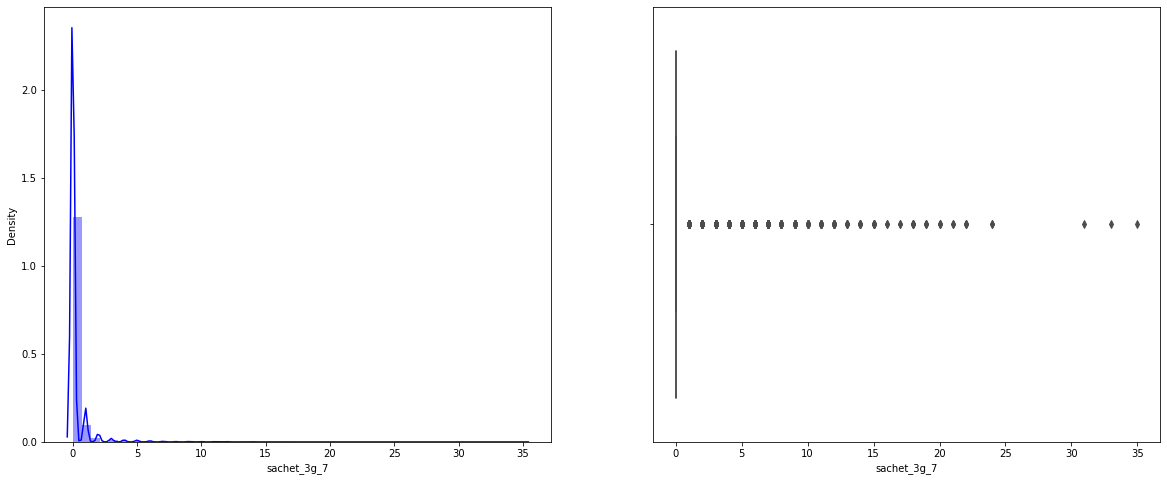

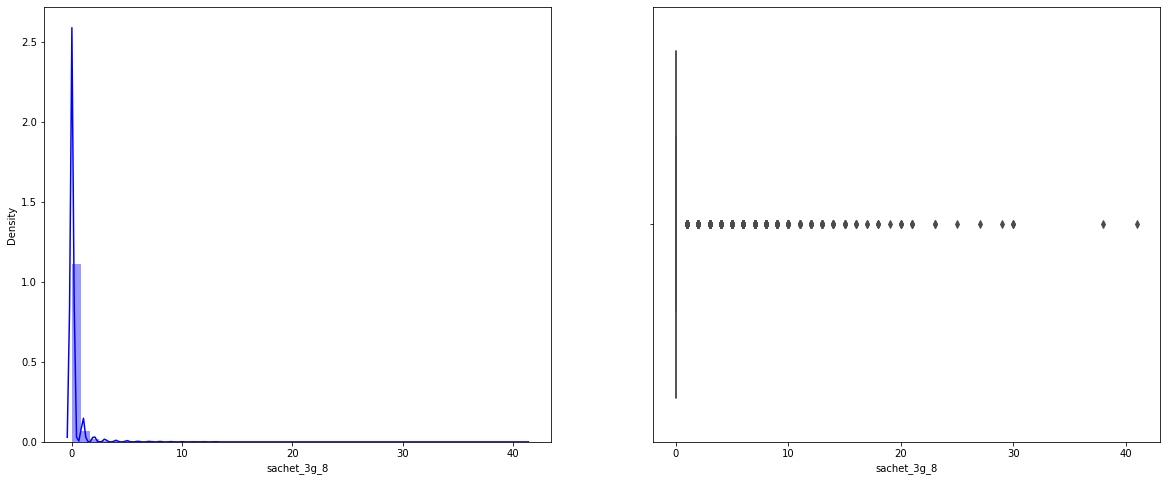

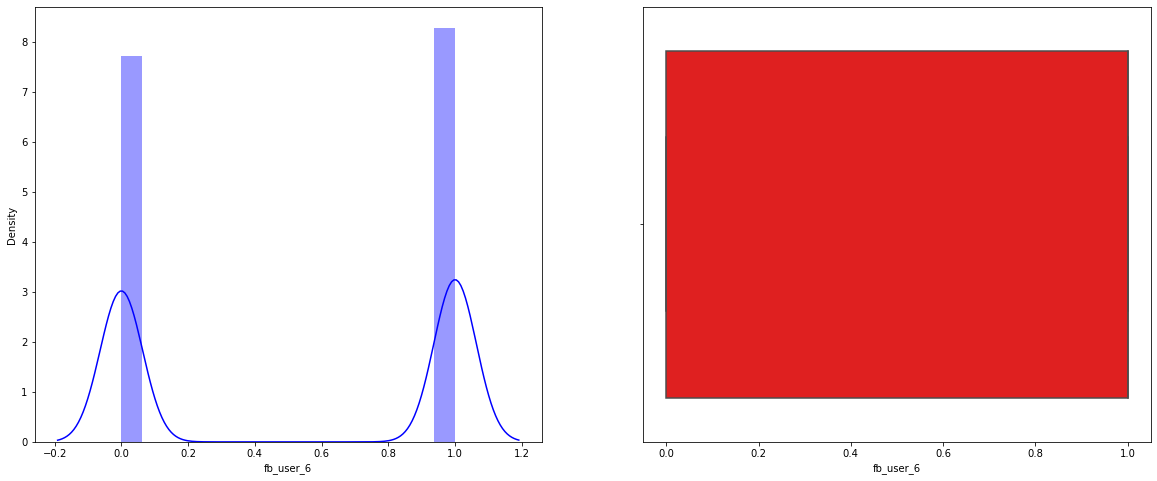

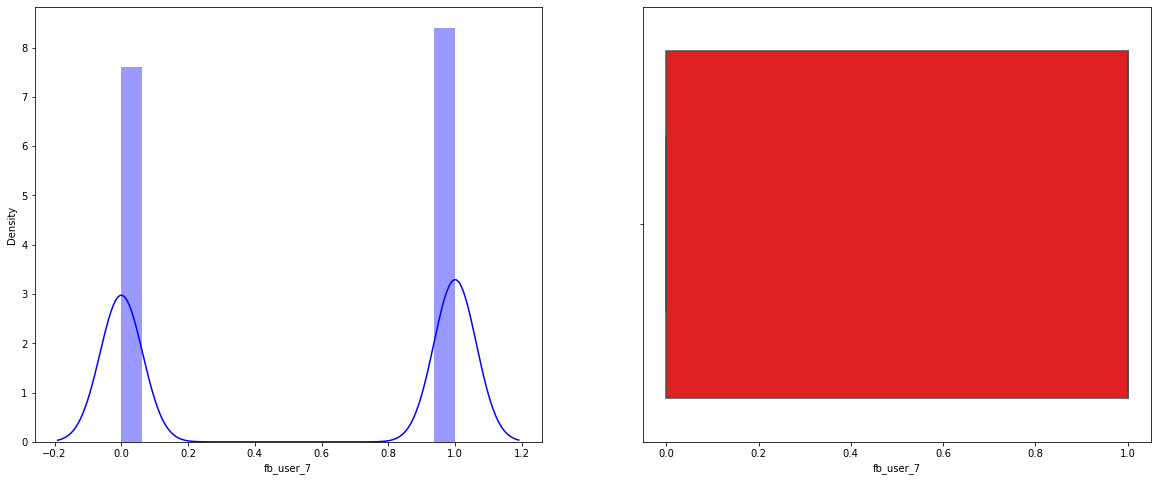

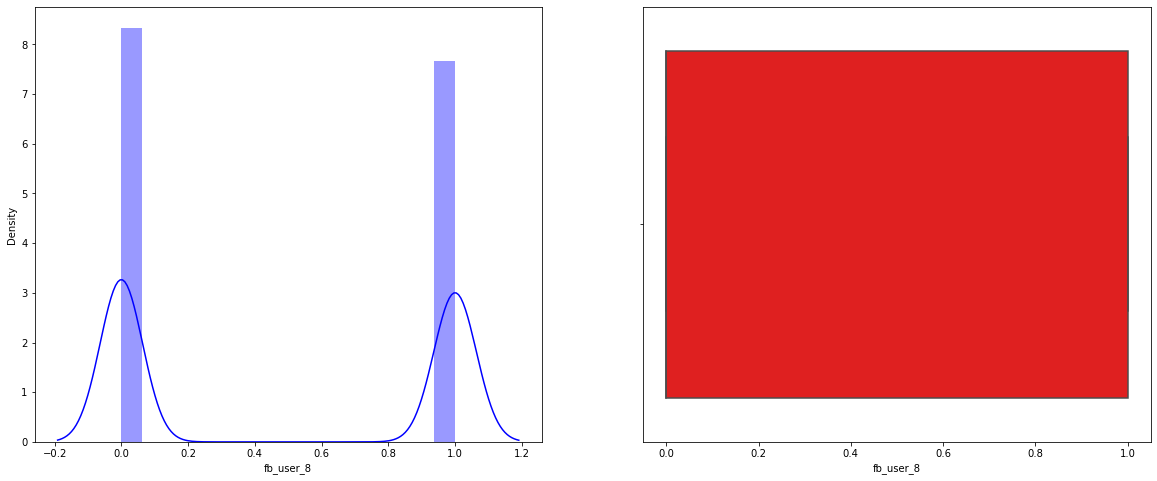

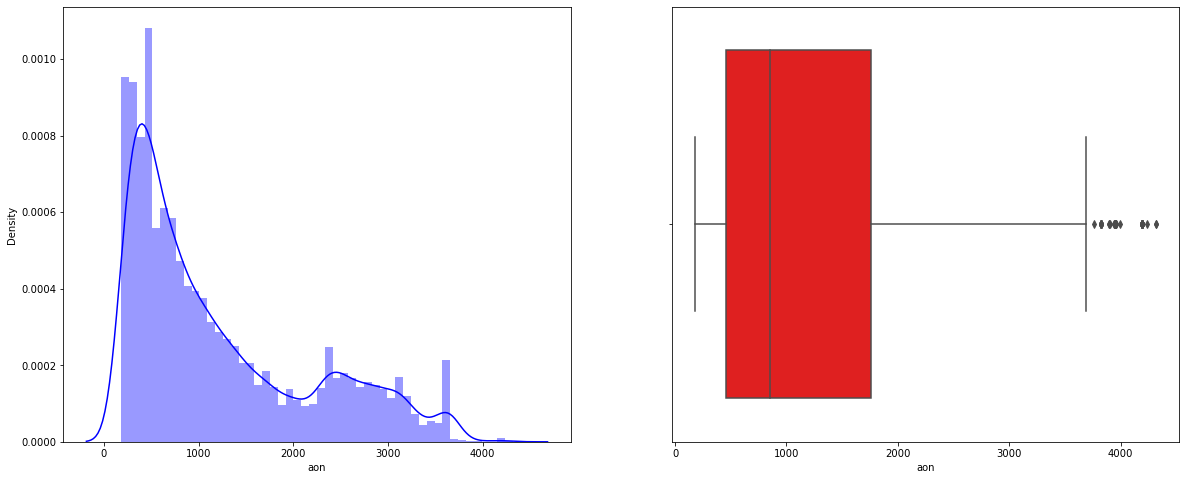

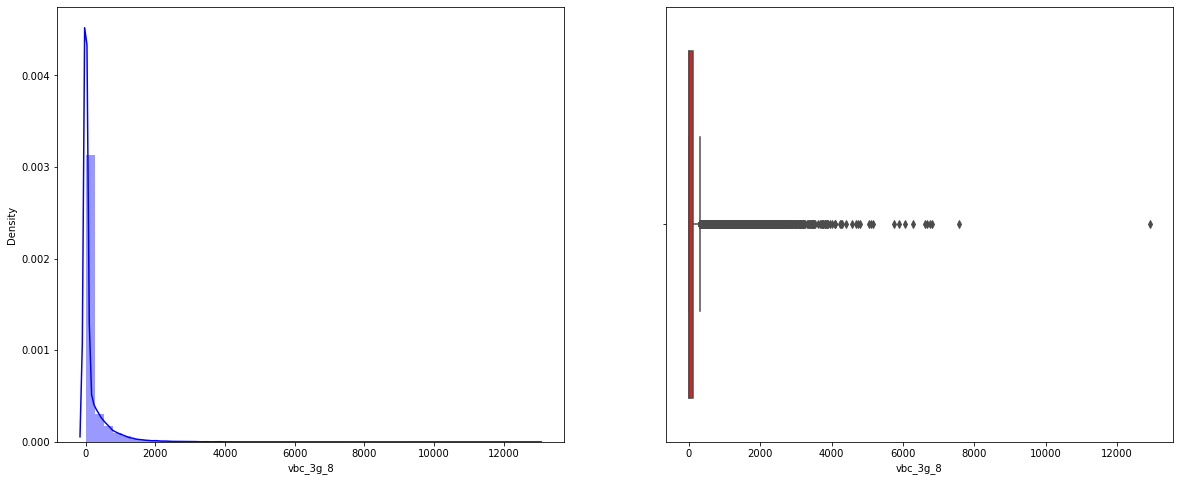

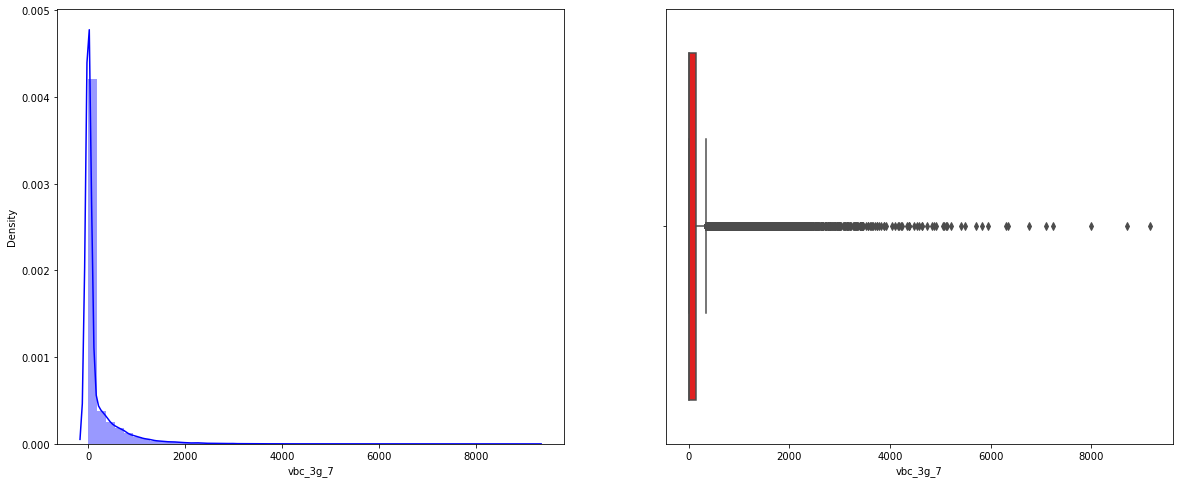

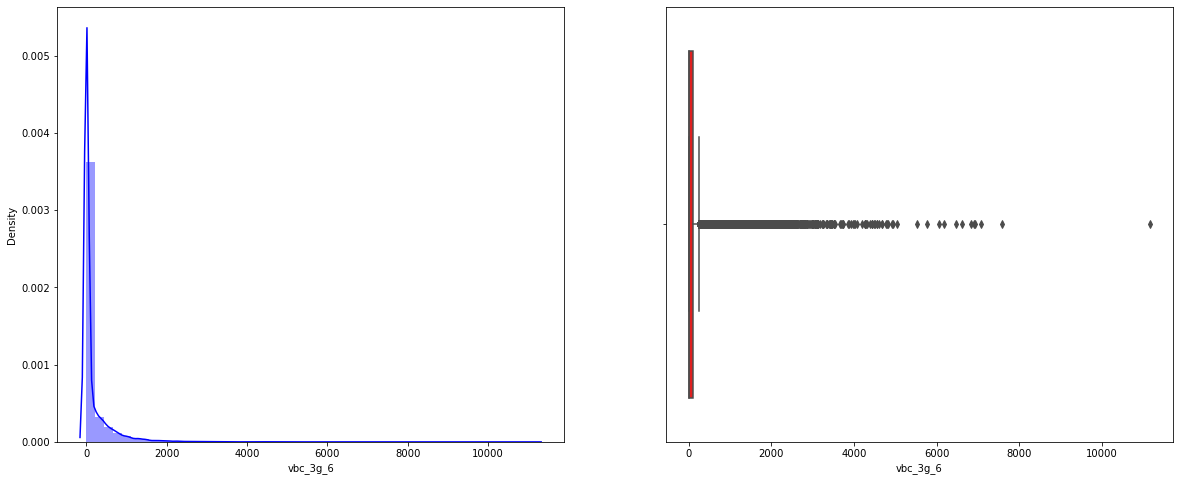

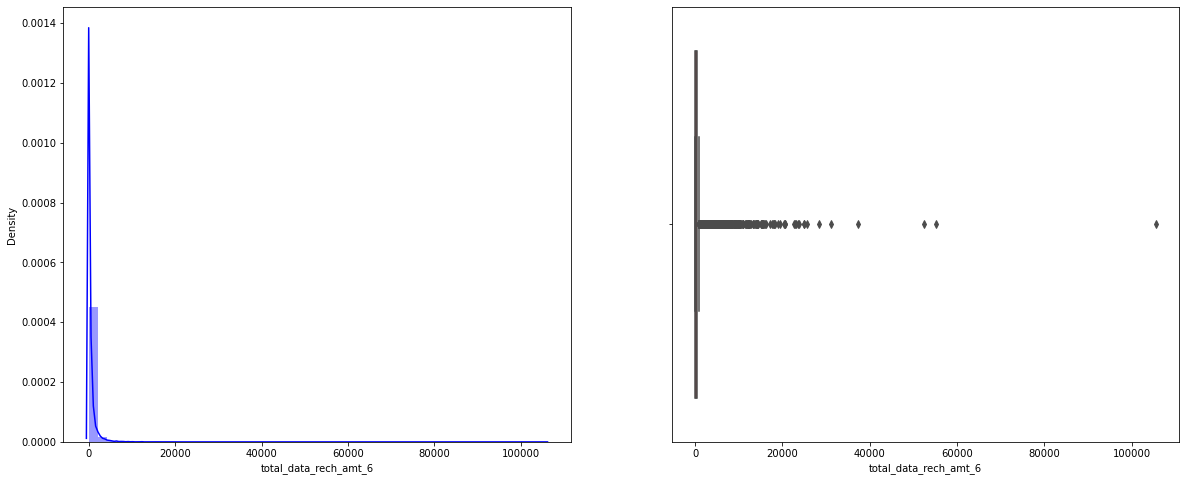

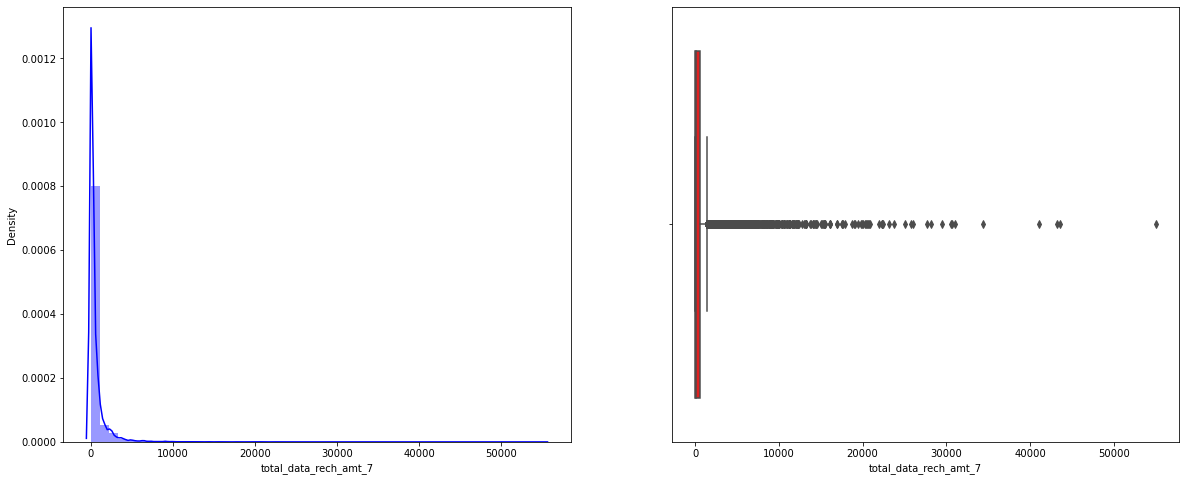

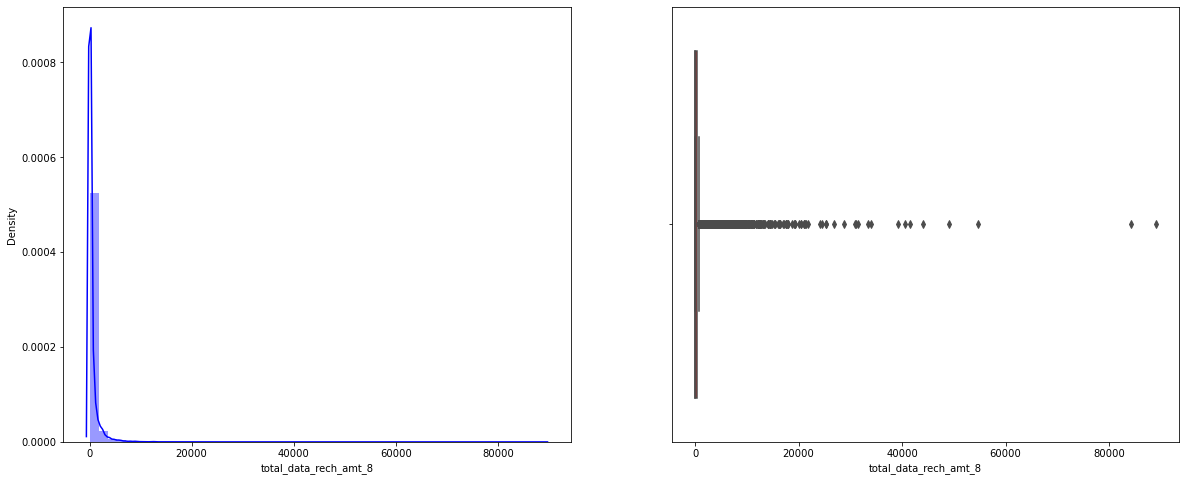

In [587]:
for col in telecom[cols].columns:
    draw_box_plot(figsize_x = 20,
                    figsize_y = 8,
                    subplot_x = 1,
                    subplot_y = 2,
                    xlabel = col,
                    ylabel = "Distribution",
                    x_axis = col,
                    data = telecom,
                    wspace = 0.2)

        

__Insights: from Univariete analysis clearly say, there are many columns with outliers. We will do scaling in later stage__

##### Bivariate Analysis

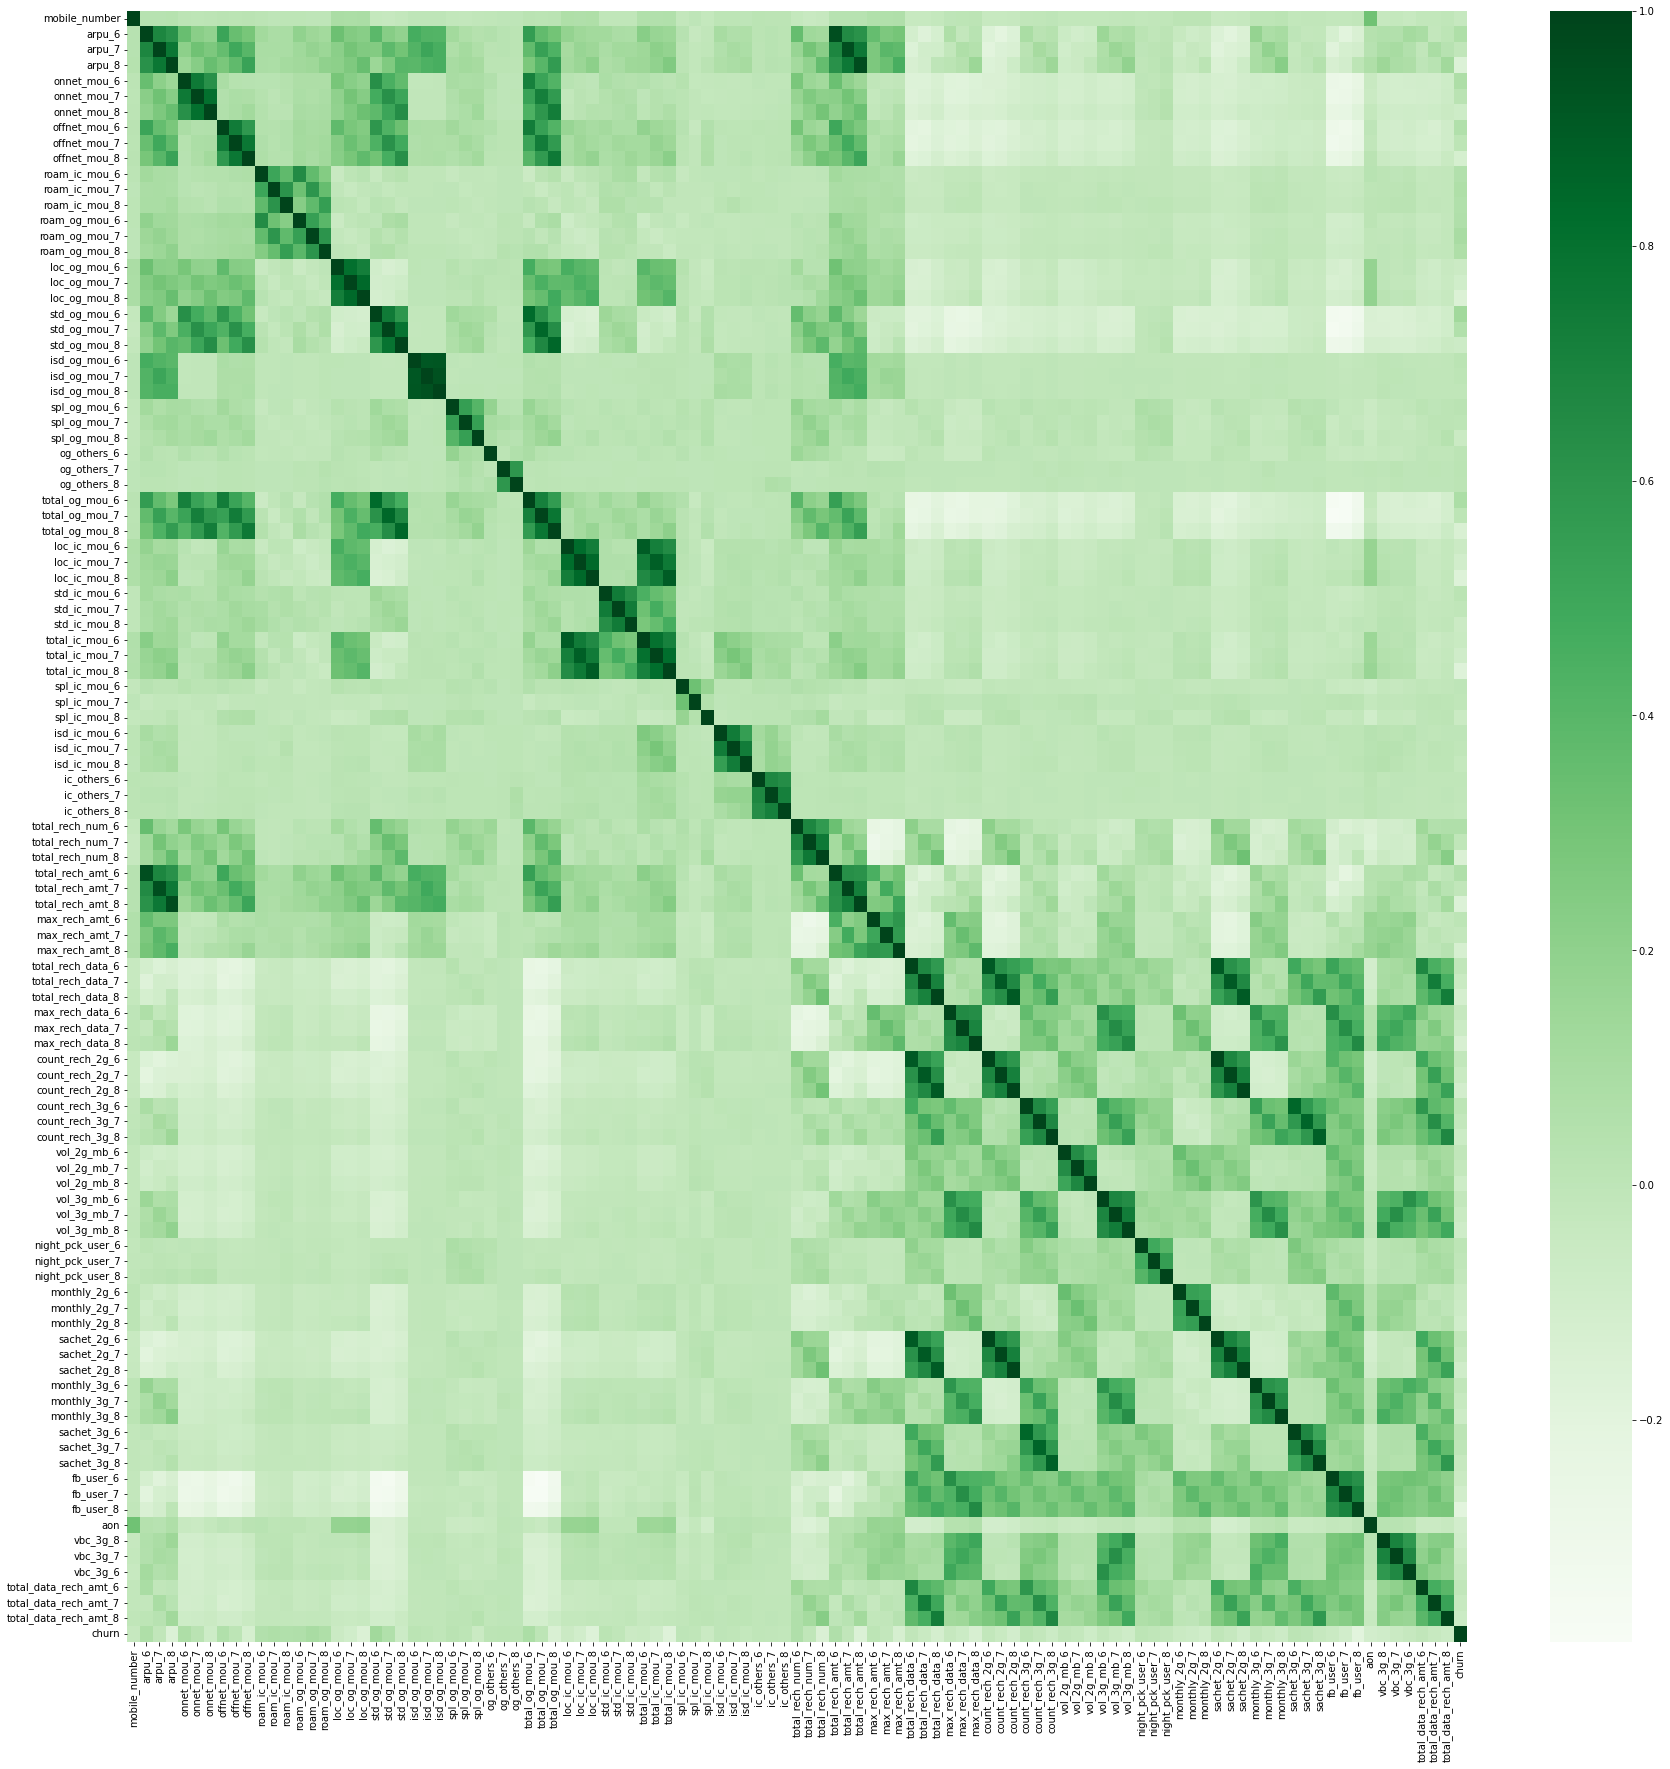

In [588]:
plt.figure(figsize = (30, 30))
sns.heatmap(telecom.corr(), cmap="Greens")
plt.show()

__Insights: using heatmap we can see many places we observe variables are highly corelated. We are going to use PCA that will take care of this corelated variables__

## 5. Feature Engineering

In [589]:
# Derieve phase columns based on average columns
def derive_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [590]:
telecom = derive_phase(telecom, "arpu")

telecom = derive_phase(telecom, "onnet_mou")

telecom = derive_phase(telecom, "offnet_mou")

telecom = derive_phase(telecom, "roam_ic_mou")

telecom = derive_phase(telecom, "roam_og_mou")

telecom = derive_phase(telecom, "loc_og_mou")

telecom = derive_phase(telecom, "std_og_mou")

telecom = derive_phase(telecom, "isd_og_mou")

telecom = derive_phase(telecom, "spl_og_mou")

telecom = derive_phase(telecom, "og_others")

telecom = derive_phase(telecom, "total_og_mou")

telecom = derive_phase(telecom, "loc_ic_mou")

telecom = derive_phase(telecom, "std_ic_mou")

telecom = derive_phase(telecom, "spl_ic_mou")

telecom = derive_phase(telecom, "isd_ic_mou")

telecom = derive_phase(telecom, "ic_others")

telecom = derive_phase(telecom, "total_ic_mou")

telecom = derive_phase(telecom, "total_rech_num")

telecom = derive_phase(telecom, "total_rech_amt")

telecom = derive_phase(telecom, "max_rech_amt")

telecom = derive_phase(telecom, "total_rech_data")

telecom = derive_phase(telecom, "max_rech_data")

telecom = derive_phase(telecom, "count_rech_2g")

telecom = derive_phase(telecom, "count_rech_3g")

telecom = derive_phase(telecom, "vol_2g_mb")

telecom = derive_phase(telecom, "vol_3g_mb")

telecom = derive_phase(telecom, "monthly_2g")

telecom = derive_phase(telecom, "sachet_2g")

telecom = derive_phase(telecom, "monthly_3g")

telecom = derive_phase(telecom, "sachet_3g")

telecom = derive_phase(telecom, "vbc_3g")

telecom = derive_phase(telecom, "total_data_rech_amt")

telecom.head()

,mobile_number,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,7000842753,0.0,0.0,0.0,1.0,1.0,1.0,968,1,206.1005,7.7025,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,3.5,-1.5,307.0,-55.0,252.0,0.0,1.0,0.0,252.0,0.0,0.0,0.0,1.0,0.0,15.725,-9.975,117.165,-7.555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
7,7000701601,0.0,0.0,0.0,0.0,0.0,0.0,802,1,1209.5150,1961.9650,56.26,-3.97,510.295,-184.385,24.86,6.78,18.165,19.895,478.035,-222.245,68.000,9.840,0.090,9.920,2.25,4.25,0.0,0.0,548.385,-198.225,391.555,-203.515,176.810,17.130,0.105,-0.105,8.295,23.295,15.465,-0.325,592.250,-163.510,5.0,2.0,1185.0,2453.0,1185.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
8,7001524846,0.0,0.0,0.0,0.0,1.0,1.0,315,0,435.4720,-298.1100,382.36,-347.28,87.645,48.835,0.00,0.00,0.000,0.000,333.135,-270.095,136.870,-38.590,0.000,0.000,0.00,10.23,0.0,0.0,470.010,-298.450,52.630,-36.840,13.545,-12.795,0.000,0.000,0.000,0.000,0.000,0.000,66.175,-49.635,20.0,-6.0,519.0,-399.0,122.0,-92.0,1.0,2.0,77.0,-54.0,1.0,2.0,0.0,0.0,178.000,-177.970,375.475,-363.535,0.5,-0.5,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
21,7002124215,0.0,0.0,0.0,0.0,0.0,0.0,720,0,556.1030,81.6570,117.26,-32.12,827.305,156.085,0.00,0.00,0.000,0.000,95.565,34.175,848.990,89.800,0.000,0.000,0.00,0.00,0.0,0.0,944.565,123.975,106.505,52.605,62.985,38.945,0.000,0.000,0.000,0.000,0.000,0.000,169.490,91.550,24.0,3.0,640.0,78.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
23,7000887461,0.0,0.0,0.0,0.0,1.0,1.0,604,0,134.1235,232.8425,49.81,-16.23,87.385,118.505,0.00,0.00,0.000,0.000,132.795,49.345,4.355,35.255,0.005,-0.005,0.05,17.66,0.0,0.0,137.210,102.270,145.520,78.690,8.915,48.375,0.000,0.000,14.115,-10.375,2.675,10.385,171.235,127.095,4.0,0.0,227.0,212.0,89.5,89.5,1.0,1.0,89.5,89.5,0.0,0.0,1.0,1.0,0.240,-0.230,299.545,710.375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


In [591]:
telecom.shape

(29824, 73)

In [592]:
#checking duplicate rows based on mobile number
if len(telecom['mobile_number'].unique()) == len(telecom.index):
    print("No Duplicates.")
else:
    print("Duplicate")

No Duplicates.


**As there is no duplicate present then we can drop mobile number column as it does not have any impact in analysis**

In [593]:
telecom.drop(['mobile_number'], axis=1, inplace = True)

In [594]:
telecom.shape

(29824, 72)

## 6. Modeling

#### 6.1 Train Test split

In [595]:
X = telecom.drop('churn', axis = 1)
y = telecom[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 71)
(20876, 1)
(8948, 71)
(8948, 1)


#### 6.2 Scaling 

#### Scale all dependent variables with minmax and transform both train and test

In [596]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(data = scaler.fit_transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [597]:
X_train.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
75219,0.0,0.0,0.0,0.0,0.0,0.0,0.060613,0.025760,0.313654,0.025754,0.469175,0.190815,0.357846,0.000000,0.357573,0.000000,0.440900,0.057639,0.451849,0.157627,0.367274,0.0,0.532149,0.000000,0.592141,0.000000,0.092217,0.189938,0.367457,0.040051,0.512302,0.014428,0.452499,0.004515,0.938141,0.000000,0.849127,0.000000,0.470583,0.045375,0.609529,0.070968,0.528777,0.023833,0.333983,0.038710,0.306543,0.000000,0.379518,0.000000,0.500188,0.00000,0.53,0.0,0.335938,0.00000,0.505451,0.000000,0.441836,0.0,0.461538,0.000000,0.534653,0.0,0.517241,0.0,0.373913,0.000000,0.365033,0.000000,0.202037
43582,0.0,0.0,0.0,0.0,0.0,0.0,0.160106,0.015090,0.357740,0.029400,0.467433,0.099925,0.398494,0.058144,0.400204,0.113419,0.604682,0.018156,0.463501,0.073784,0.356486,0.0,0.532149,0.000000,0.591360,0.000000,0.092217,0.082694,0.361622,0.021922,0.523673,0.009791,0.455513,0.024082,0.905359,0.000000,0.849127,0.002152,0.469655,0.026431,0.620438,0.061290,0.552158,0.018219,0.365540,0.041290,0.300676,0.000000,0.367470,0.000000,0.490772,0.00000,0.51,0.0,0.335938,0.00000,0.505451,0.000000,0.441836,0.0,0.461538,0.000000,0.514851,0.0,0.517241,0.0,0.373913,0.000000,0.365033,0.000000,0.201807
62143,0.0,0.0,0.0,0.0,0.0,0.0,0.538517,0.028458,0.295653,0.074139,0.425020,0.106122,0.348606,0.001697,0.447461,0.000218,0.497551,0.156942,0.377995,0.043672,0.348424,0.0,0.532149,0.008043,0.587274,0.000000,0.092217,0.152884,0.316922,0.184916,0.439407,0.012409,0.446279,0.000000,0.928164,0.001505,0.851360,0.000000,0.470583,0.170304,0.548889,0.077419,0.514388,0.028256,0.315527,0.038710,0.320946,0.000000,0.367470,0.000000,0.490772,0.00000,0.51,0.0,0.335938,0.00000,0.505451,0.000000,0.441836,0.0,0.461538,0.000000,0.514851,0.0,0.517241,0.0,0.373913,0.000000,0.365033,0.000000,0.201807
1404,0.0,0.0,0.0,1.0,1.0,0.0,0.241729,0.010858,0.296571,0.009650,0.449480,0.016855,0.355255,0.000000,0.357573,0.000000,0.440900,0.031263,0.438067,0.000000,0.359193,0.0,0.532149,0.007191,0.588659,0.002242,0.091189,0.022941,0.353239,0.047676,0.494255,0.000505,0.454930,0.011439,0.917332,0.000000,0.849127,0.004415,0.468087,0.041930,0.596487,0.132258,0.462230,0.010328,0.310878,0.016129,0.294275,0.123457,0.307229,0.016077,0.481356,0.12987,0.41,0.0,0.335938,0.04447,0.469687,0.000808,0.440780,0.0,0.461538,0.131579,0.415842,0.0,0.517241,0.0,0.373913,0.006696,0.360814,0.018618,0.196248
21884,0.0,0.0,0.0,0.0,0.0,0.0,0.041294,0.020983,0.278477,0.0232

In [598]:
X_test.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
84905,0.0,0.0,0.0,1.0,1.0,1.0,0.050954,0.010458,0.307590,0.002588,0.454348,0.017712,0.355905,0.000000,0.357573,0.000000,0.440900,0.025120,0.445980,0.000102,0.359147,0.000000,0.532149,0.000000,0.592065,0.0,0.092217,0.017787,0.356887,0.025230,0.510912,0.000096,0.455308,0.00873,0.919897,0.00000,0.849127,0.000551,0.474537,0.021953,0.610622,0.070968,0.528777,0.009732,0.322548,0.052258,0.296053,0.024691,0.379518,0.104180,0.487006,0.000000,0.53,0.037037,0.335938,0.007257,0.505219,0.019258,0.440237,0.000000,0.461538,0.0,0.534653,0.086957,0.448276,0.0,0.391304,0.078515,0.361085,0.004985,0.205906
94131,0.0,0.0,0.0,1.0,1.0,0.0,0.369959,0.018897,0.302768,0.002632,0.457052,0.029781,0.366160,0.000000,0.357573,0.000000,0.440900,0.025701,0.475246,0.010289,0.358732,0.001161,0.526468,0.000000,0.591360,0.0,0.092217,0.028556,0.368511,0.027281,0.533867,0.010400,0.454742,0.00000,0.928164,0.00044,0.848745,0.000000,0.470583,0.031655,0.627909,0.035484,0.526978,0.018113,0.316326,0.065161,0.306366,0.024691,0.355422,0.099035,0.432768,0.025974,0.49,0.000000,0.335938,0.058787,0.458174,0.000000,0.441836,0.222222,0.307692,0.0,0.514851,0.000000,0.517241,0.0,0.373913,0.000000,0.365033,0.004739,0.200392
34020,0.0,0.0,0.0,0.0,1.0,1.0,0.035016,0.004022,0.318433,0.002314,0.457615,0.008590,0.361832,0.005335,0.354679,0.000044,0.440881,0.000482,0.455376,0.008475,0.362865,0.000000,0.532149,0.008991,0.594923,0.0,0.092217,0.009470,0.364832,0.000395,0.524256,0.004208,0.468735,0.00000,0.928164,0.00000,0.849127,0.000337,0.471038,0.003490,0.629847,0.032258,0.539568,0.005151,0.332175,0.031935,0.303343,0.024691,0.391566,0.063666,0.490395,0.025974,0.55,0.000000,0.335938,0.002297,0.516062,0.023401,0.438906,0.222222,0.307692,0.0,0.574257,0.000000,0.517241,0.0,0.373913,0.047495,0.356433,0.010678,0.202699
96899,0.0,0.0,0.0,0.0,1.0,1.0,0.386863,0.014041,0.320039,0.040868,0.479458,0.003913,0.362031,0.001763,0.356617,0.001371,0.440296,0.005737,0.458152,0.032662,0.375029,0.000000,0.532149,0.002875,0.589561,0.0,0.092217,0.035339,0.377600,0.004618,0.529870,0.001003,0.457495,0.00000,0.928164,0.00000,0.849127,0.000000,0.470583,0.004740,0.626822,0.058065,0.539568,0.015015,0.331682,0.029677,0.308855,0.024691,0.367470,0.049518,0.519774,0.025974,0.51,0.000000,0.335938,0.103740,0.503577,0.000000,0.441836,0.222222,0.461538,0.0,0.514851,0.000000,0.517241,0.0,0.373913,0.000000,0.365033,0.009478,0.200392
63711,0.0,0.0,0.0,1.0,

In [599]:
y_train['churn'].value_counts(normalize=True)

0    0.922495
1    0.077505
Name: churn, dtype: float64

In [600]:
y_test['churn'].value_counts(normalize=True)


0    0.916629
1    0.083371
Name: churn, dtype: float64

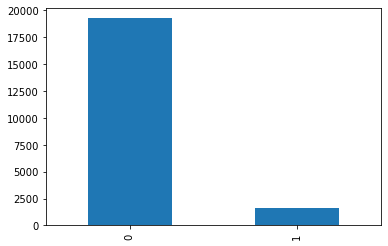

In [601]:
y_train['churn'].value_counts().plot(kind='bar')
plt.show()

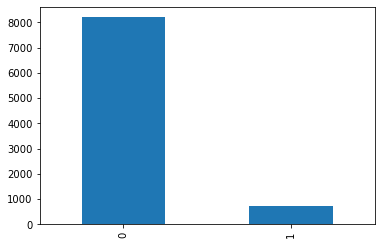

In [602]:
y_test['churn'].value_counts().plot(kind='bar')
plt.show()

**Clearly the data is highly imbalance**

#### 6.3 Handling Imbalance

In [603]:
!pip install -U imbalanced-learn

In [604]:
!pip install -v scikit-learn

Using pip 21.2.4 from C:\ProgramData\Anaconda3\lib\site-packages\pip (python 3.9)


In [605]:
from imblearn.over_sampling import SMOTE

In [606]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<AxesSubplot:>

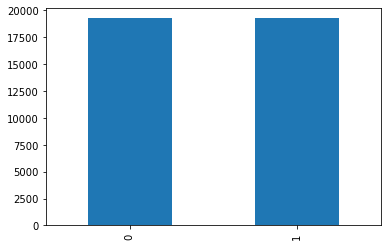

In [607]:
y_train_smote['churn'].value_counts().plot(kind='bar')

### 6.4 Base Model - Logistic Regression

In [608]:
import statsmodels.api as sm

In [609]:
logi_model = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote)), family = sm.families.Binomial())
logi_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14705.
Date:                Tue, 08 Mar 2022   Deviance:                       29410.
Time:                        22:43:24   Pearson chi2:                 1.58e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -4.707e+05   2.22e+04    -21.183      0.000   -5.14e+05   -4.27e+05
night_pck_user_6                     0.2742      0.157      1.745      0.081      -0.034       0.582
night_pck_user_7                    -0.5824      0.217     -2.679      0.007      -1.008      -0.156
night_pck_user_8                    -0.2639      0.263     -1.004      0.315      -0.779       0.251
fb_user_6                           -0.0682      0.052     -1.311      0.190      -0.170       0.034
fb_user_7                            0.0037      0.053      0.070      0.944      -0.100       0.107
fb_user_8                           -0.3510      0.072     -4.873      0.000      -0.492      -0.210
aon                                 -1.3422      0.078    -17.237      0.000      -1.495      -1.190
arpu_good_phase                     58.7277      8.809      6.667      0.000      41.463      75.992
arpu_action_phase                   19.6621      3.286      5.984      0.000      13.222      26.102
onnet_mou_good_phase               -57.3827     21.709     -2.643      0.008     -99.932     -14.834
onnet_mou_action_phase              45.6516     34.597      1.320      0.187     -22.157     113.461
offnet_mou_good_phase              -66.7016     24.607     -2.711      0.007    -114.930     -18.474
offnet_mou_action_phase             71.8905     58.475      1.229      0.219     -42.719     186.500
roam_ic_mou_good_phase               0.6261      0.664      0.943      0.346      -0.676       1.928
roam_ic_mou_action_phase            -1.8555      0.877     -2.115      0.034      -3.575      -0.136
roam_og_mou_good_phase              23.8091      7.174      3.319      0.001       9.749      37.869
roam_og_mou_action_phase           -15.8527     16.343     -0.970      0.332     -47.884      16.179
loc_og_mou_good_phase               1.4e+05   2.61e+04      5.371      0.000    8.89e+04    1.91e+05
loc_og_mou_action_phase           2.349e+05   2.47e+04      9.503      0.000    1.86e+05    2.83e+05
std_og_mou_good_phase             1.884e+05   3.51e+04      5.372      0.000     1.2e+05    2.57e+05
std_og_mou_action_phase           5.492e+05   5.78e+04      9.504      0.000    4.36e+05    6.62e+05
isd_og_mou_good_phase             1.212e+05   2.26e+04      5.372      0.000     7.7e+04    1.65e+05
isd_og_mou_action_phase           3.223e+04   3391.227      9.505      0.000    2.56e+04    3.89e+04
spl_og_mou_good_phase             2.435e+04   4532.835      5.371      0.000    1.55e+04    3.32e+04
spl_og_mou_action_phase           5.064e+04   5328.512      9.504      0.000    4.02e+04    6.11e+04
og_others_good_phase              3932.9725    732.966      5.366      0.000    2496.385    5369.560
og_others_action_phase            1.119e+04   1176.10

__Insights: From above summary we can see many columns having p-value >0.05__

#### Feature selection using RFE

As from states model we can see many features having very high p-value so using RFE going to select 30 most useful features to create model

In [610]:
logreg = LogisticRegression()
rfe = RFE(logreg, step= 30)             
rfe = rfe.fit(X_train_smote, y_train_smote)

In [611]:
rfe.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
        True, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False])

In [612]:
rfe_columns=X_train_smote.columns[rfe.support_]
print("30 best RFE columns: \n\n",rfe_columns)

30 best RFE columns: 

 Index(['arpu_action_phase', 'offnet_mou_good_phase', 'offnet_mou_action_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'roam_og_mou_action_phase', 'loc_og_mou_good_phase',
       'loc_og_mou_action_phase', 'std_og_mou_good_phase',
       'std_og_mou_action_phase', 'og_others_action_phase',
       'total_og_mou_good_phase', 'total_og_mou_action_phase',
       'loc_ic_mou_good_phase', 'loc_ic_mou_action_phase',
       'spl_ic_mou_action_phase', 'isd_ic_mou_action_phase',
       'total_ic_mou_good_phase', 'total_ic_mou_action_phase',
       'total_rech_num_good_phase', 'total_rech_num_action_phase',
       'total_rech_amt_action_phase', 'max_rech_amt_action_phase',
       'total_rech_data_action_phase', 'count_rech_2g_good_phase',
       'count_rech_2g_action_phase', 'vol_2g_mb_action_phase',
       'vol_3g_mb_action_phase', 'monthly_2g_good_phase',
       'monthly_2g_action_phase', 'sachet_2g_action_phase',
       'sachet_3g_action_phase

In [613]:
list(zip(X_train_smote.columns, rfe.support_, rfe.ranking_))

[('night_pck_user_6', False, 3),
 ('night_pck_user_7', False, 3),
 ('night_pck_user_8', False, 3),
 ('fb_user_6', False, 3),
 ('fb_user_7', False, 3),
 ('fb_user_8', False, 3),
 ('aon', False, 3),
 ('arpu_good_phase', False, 3),
 ('arpu_action_phase', True, 1),
 ('onnet_mou_good_phase', False, 3),
 ('onnet_mou_action_phase', False, 3),
 ('offnet_mou_good_phase', True, 1),
 ('offnet_mou_action_phase', True, 1),
 ('roam_ic_mou_good_phase', True, 1),
 ('roam_ic_mou_action_phase', False, 2),
 ('roam_og_mou_good_phase', True, 1),
 ('roam_og_mou_action_phase', True, 1),
 ('loc_og_mou_good_phase', True, 1),
 ('loc_og_mou_action_phase', True, 1),
 ('std_og_mou_good_phase', True, 1),
 ('std_og_mou_action_phase', True, 1),
 ('isd_og_mou_good_phase', False, 3),
 ('isd_og_mou_action_phase', False, 2),
 ('spl_og_mou_good_phase', False, 3),
 ('spl_og_mou_action_phase', False, 2),
 ('og_others_good_phase', False, 3),
 ('og_others_action_phase', True, 1),
 ('total_og_mou_good_phase', True, 1),
 ('tota

In [614]:
#checking stats model with 30 RFE columns

logi_model = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[rfe_columns])), family = sm.families.Binomial())
res = logi_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38481
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15442.
Date:                Tue, 08 Mar 2022   Deviance:                       30884.
Time:                        22:43:28   Pearson chi2:                 2.81e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            101.7322      5.529     18.400      0.000      90.896     112.569
arpu_action_phase                 -3.6379      2.314     -1.572      0.116      -8.174       0.898
offnet_mou_good_phase             -2.4658      0.567     -4.347      0.000      -3.577      -1.354
offnet_mou_action_phase           -7.2602      2.023     -3.589      0.000     -11.226      -3.295
roam_ic_mou_good_phase             1.2196      0.637      1.915      0.055      -0.028       2.468
roam_og_mou_good_phase             4.9591      0.560      8.859      0.000       3.862       6.056
roam_og_mou_action_phase           5.5553      1.129      4.919      0.000       3.342       7.769
loc_og_mou_good_phase             -6.3684      4.682     -1.360      0.174     -15.546       2.809
loc_og_mou_action_phase          -22.8180      8.377     -2.724      0.006     -39.237      -6.399
std_og_mou_good_phase              5.1094      6.197      0.825      0.410      -7.036      17.255
std_og_mou_action_phase          -28.1133     19.370     -1.451      0.147     -66.078       9.851
og_others_action_phase             5.6188      2.076      2.706      0.007       1.550       9.688
total_og_mou_good_phase           -6.4623      6.552     -0.986      0.324     -19.303       6.379
total_og_mou_action_phase         15.6147     19.624      0.796      0.426     -22.847      54.076
loc_ic_mou_good_phase            -22.1844      1.862    -11.914      0.000     -25.834     -18.535
loc_ic_mou_action_phase          -29.8778      3.177     -9.404      0.000     -36.105     -23.651
spl_ic_mou_action_phase          -26.5702      2.443    -10.878      0.000     -31.358     -21.783
isd_ic_mou_action_phase           12.8622      3.649      3.525      0.000       5.711      20.014
total_ic_mou_good_phase          -13.3294      1.528     -8.724      0.000     -16.324     -10.335
total_ic_mou_action_phase        -33.2514      3.036    -10.952      0.000     -39.202     -27.301
total_rech_num_good_phase         -4.5959      0.439    -10.472      0.000      -5.456      -3.736
total_rech_num_action_phase      -11.0366      1.169     -9.442      0.000     -13.328      -8.746
total_rech_amt_action_phase      -13.7133      2.384     -5.752      0.000     -18.386      -9.040
max_rech_amt_action_phase         -3.5996      0.888     -4.056      0.000      -5.339      -1.860
total_rech_data_action_phase     -21.8235      4.356     -5.010      0.000     -30.362     -13.285
count_rech_2g_good_phase          -6.1558      0.472    -13.044      0.000      -7.081      -5.231
count_rech_2g_action_phase        -3.4330      1.395     -2.460      0.014      -6.168      -0.698
vol_2g_mb_action_phase           -10.2380      0.804    -12.729      0.000     -11.814      -8.662
vol_3g_mb_acti

__As 'sachet_3g_action_phase' having p-value 0.627, going to drop this column and recheck the stats model again__

In [615]:
rfe_columns  = rfe_columns.drop('sachet_3g_action_phase')
rfe_columns

Index(['arpu_action_phase', 'offnet_mou_good_phase', 'offnet_mou_action_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'roam_og_mou_action_phase', 'loc_og_mou_good_phase',
       'loc_og_mou_action_phase', 'std_og_mou_good_phase',
       'std_og_mou_action_phase', 'og_others_action_phase',
       'total_og_mou_good_phase', 'total_og_mou_action_phase',
       'loc_ic_mou_good_phase', 'loc_ic_mou_action_phase',
       'spl_ic_mou_action_phase', 'isd_ic_mou_action_phase',
       'total_ic_mou_good_phase', 'total_ic_mou_action_phase',
       'total_rech_num_good_phase', 'total_rech_num_action_phase',
       'total_rech_amt_action_phase', 'max_rech_amt_action_phase',
       'total_rech_data_action_phase', 'count_rech_2g_good_phase',
       'count_rech_2g_action_phase', 'vol_2g_mb_action_phase',
       'vol_3g_mb_action_phase', 'monthly_2g_good_phase',
       'monthly_2g_action_phase', 'sachet_2g_action_phase',
       'vbc_3g_good_phase', 'vbc_3g_action_phase',
   

In [616]:
#checking stats model again

logi_model = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[rfe_columns])), family = sm.families.Binomial())
res = logi_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38482
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15442.
Date:                Tue, 08 Mar 2022   Deviance:                       30884.
Time:                        22:43:30   Pearson chi2:                 2.76e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            101.1029      5.374     18.812      0.000      90.569     111.637
arpu_action_phase                 -3.5335      2.304     -1.534      0.125      -8.048       0.981
offnet_mou_good_phase             -2.4681      0.567     -4.352      0.000      -3.580      -1.356
offnet_mou_action_phase           -7.2686      2.023     -3.593      0.000     -11.234      -3.303
roam_ic_mou_good_phase             1.2182      0.637      1.913      0.056      -0.030       2.466
roam_og_mou_good_phase             4.9612      0.560      8.861      0.000       3.864       6.058
roam_og_mou_action_phase           5.5160      1.126      4.897      0.000       3.308       7.724
loc_og_mou_good_phase             -6.3838      4.683     -1.363      0.173     -15.563       2.795
loc_og_mou_action_phase          -22.6654      8.369     -2.708      0.007     -39.068      -6.263
std_og_mou_good_phase              5.0891      6.198      0.821      0.412      -7.059      17.237
std_og_mou_action_phase          -27.7509     19.350     -1.434      0.152     -65.676      10.174
og_others_action_phase             5.6282      2.076      2.711      0.007       1.560       9.697
total_og_mou_good_phase           -6.4412      6.553     -0.983      0.326     -19.285       6.403
total_og_mou_action_phase         15.1830     19.598      0.775      0.439     -23.229      53.595
loc_ic_mou_good_phase            -22.1871      1.862    -11.915      0.000     -25.837     -18.538
loc_ic_mou_action_phase          -29.8829      3.178     -9.404      0.000     -36.111     -23.655
spl_ic_mou_action_phase          -26.5535      2.442    -10.872      0.000     -31.340     -21.766
isd_ic_mou_action_phase           12.8455      3.649      3.520      0.000       5.693      19.997
total_ic_mou_good_phase          -13.3333      1.528     -8.726      0.000     -16.328     -10.339
total_ic_mou_action_phase        -33.2620      3.037    -10.954      0.000     -39.213     -27.310
total_rech_num_good_phase         -4.5889      0.439    -10.464      0.000      -5.448      -3.729
total_rech_num_action_phase      -11.0504      1.168     -9.457      0.000     -13.341      -8.760
total_rech_amt_action_phase      -13.6458      2.380     -5.734      0.000     -18.310      -8.981
max_rech_amt_action_phase         -3.6009      0.887     -4.058      0.000      -5.340      -1.862
total_rech_data_action_phase     -23.6283      2.286    -10.336      0.000     -28.109     -19.148
count_rech_2g_good_phase          -6.1563      0.472    -13.048      0.000      -7.081      -5.232
count_rech_2g_action_phase        -2.8771      0.802     -3.588      0.000      -4.449      -1.305
vol_2g_mb_action_phase           -10.1822      0.796    -12.795      0.000     -11.742      -8.622
vol_3g_mb_acti

In [617]:
# dropping 'total_og_mou_action_phase' column
rfe_columns  = rfe_columns.drop('total_og_mou_action_phase')

#checking stats model again
logi_model = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[rfe_columns])), family = sm.families.Binomial())
res = logi_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38483
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15442.
Date:                Tue, 08 Mar 2022   Deviance:                       30885.
Time:                        22:43:32   Pearson chi2:                 2.73e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             98.2072      3.865     25.407      0.000      90.631     105.783
arpu_action_phase                 -3.3016      2.286     -1.444      0.149      -7.782       1.179
offnet_mou_good_phase             -2.4436      0.566     -4.316      0.000      -3.553      -1.334
offnet_mou_action_phase           -7.1498      2.017     -3.544      0.000     -11.104      -3.196
roam_ic_mou_good_phase             1.2206      0.637      1.917      0.055      -0.028       2.469
roam_og_mou_good_phase             4.9504      0.560      8.844      0.000       3.853       6.047
roam_og_mou_action_phase           5.3927      1.115      4.835      0.000       3.207       7.579
loc_og_mou_good_phase             -4.9707      4.426     -1.123      0.261     -13.645       3.704
loc_og_mou_action_phase          -16.3117      1.679     -9.713      0.000     -19.603     -13.020
std_og_mou_good_phase              7.0021      5.839      1.199      0.230      -4.442      18.446
std_og_mou_action_phase          -12.8031      1.540     -8.315      0.000     -15.821      -9.785
og_others_action_phase             5.9480      2.027      2.935      0.003       1.975       9.921
total_og_mou_good_phase           -8.4628      6.172     -1.371      0.170     -20.560       3.635
loc_ic_mou_good_phase            -22.1863      1.862    -11.915      0.000     -25.836     -18.537
loc_ic_mou_action_phase          -29.9164      3.177     -9.417      0.000     -36.143     -23.690
spl_ic_mou_action_phase          -26.5386      2.443    -10.864      0.000     -31.326     -21.751
isd_ic_mou_action_phase           12.8080      3.655      3.505      0.000       5.645      19.971
total_ic_mou_good_phase          -13.3237      1.528     -8.720      0.000     -16.318     -10.329
total_ic_mou_action_phase        -33.1964      3.035    -10.937      0.000     -39.145     -27.248
total_rech_num_good_phase         -4.5726      0.438    -10.441      0.000      -5.431      -3.714
total_rech_num_action_phase      -11.0110      1.168     -9.430      0.000     -13.299      -8.723
total_rech_amt_action_phase      -13.5651      2.383     -5.691      0.000     -18.237      -8.894
max_rech_amt_action_phase         -3.6035      0.889     -4.054      0.000      -5.346      -1.862
total_rech_data_action_phase     -23.6463      2.286    -10.343      0.000     -28.127     -19.165
count_rech_2g_good_phase          -6.1656      0.472    -13.074      0.000      -7.090      -5.241
count_rech_2g_action_phase        -2.7697      0.790     -3.507      0.000      -4.318      -1.222
vol_2g_mb_action_phase           -10.1868      0.796    -12.800      0.000     -11.747      -8.627
vol_3g_mb_action_phase            -6.0461      1.179     -5.126      0.000      -8.358      -3.734
monthly_2g_goo

In [618]:
# dropping 'loc_og_mou_good_phase' column
rfe_columns  = rfe_columns.drop('loc_og_mou_good_phase')

#checking stats model again
logi_model = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[rfe_columns])), family = sm.families.Binomial())
res = logi_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38484
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15443.
Date:                Tue, 08 Mar 2022   Deviance:                       30886.
Time:                        22:43:34   Pearson chi2:                 2.76e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             98.2303      3.865     25.417      0.000      90.656     105.805
arpu_action_phase                 -3.5059      2.280     -1.538      0.124      -7.974       0.962
offnet_mou_good_phase             -2.4494      0.566     -4.327      0.000      -3.559      -1.340
offnet_mou_action_phase           -7.1860      2.017     -3.563      0.000     -11.139      -3.233
roam_ic_mou_good_phase             1.2114      0.637      1.903      0.057      -0.036       2.459
roam_og_mou_good_phase             4.9441      0.560      8.835      0.000       3.847       6.041
roam_og_mou_action_phase           5.4955      1.112      4.943      0.000       3.316       7.675
loc_og_mou_action_phase          -16.0068      1.653     -9.686      0.000     -19.246     -12.768
std_og_mou_good_phase             13.4500      1.145     11.748      0.000      11.206      15.694
std_og_mou_action_phase          -12.6612      1.534     -8.256      0.000     -15.667      -9.655
og_others_action_phase             5.9212      2.018      2.934      0.003       1.965       9.877
total_og_mou_good_phase          -15.2687      1.241    -12.304      0.000     -17.701     -12.837
loc_ic_mou_good_phase            -22.4698      1.841    -12.204      0.000     -26.079     -18.861
loc_ic_mou_action_phase          -30.2121      3.162     -9.554      0.000     -36.410     -24.014
spl_ic_mou_action_phase          -26.5523      2.443    -10.868      0.000     -31.341     -21.764
isd_ic_mou_action_phase           12.6485      3.648      3.468      0.001       5.499      19.798
total_ic_mou_good_phase          -13.1613      1.516     -8.681      0.000     -16.133     -10.190
total_ic_mou_action_phase        -33.0084      3.025    -10.912      0.000     -38.937     -27.080
total_rech_num_good_phase         -4.5175      0.435    -10.389      0.000      -5.370      -3.665
total_rech_num_action_phase      -10.9385      1.166     -9.382      0.000     -13.224      -8.653
total_rech_amt_action_phase      -13.8118      2.381     -5.800      0.000     -18.479      -9.144
max_rech_amt_action_phase         -3.5064      0.887     -3.952      0.000      -5.245      -1.768
total_rech_data_action_phase     -23.6140      2.286    -10.329      0.000     -28.095     -19.133
count_rech_2g_good_phase          -6.1611      0.472    -13.065      0.000      -7.085      -5.237
count_rech_2g_action_phase        -2.7833      0.790     -3.524      0.000      -4.331      -1.235
vol_2g_mb_action_phase           -10.1799      0.796    -12.791      0.000     -11.740      -8.620
vol_3g_mb_action_phase            -6.0130      1.179     -5.098      0.000      -8.325      -3.701
monthly_2g_good_phase             -6.3920      0.326    -19.599      0.000      -7.031      -5.753
monthly_2g_act

In [619]:
# dropping 'arpu_action_phase' column
rfe_columns  = rfe_columns.drop('arpu_action_phase')

#checking stats model again
logi_model = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[rfe_columns])), family = sm.families.Binomial())
res = logi_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38485
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15444.
Date:                Tue, 08 Mar 2022   Deviance:                       30888.
Time:                        22:43:36   Pearson chi2:                 2.78e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             98.9008      3.839     25.764      0.000      91.377     106.424
offnet_mou_good_phase             -2.4697      0.567     -4.358      0.000      -3.581      -1.359
offnet_mou_action_phase           -7.2788      2.019     -3.606      0.000     -11.235      -3.322
roam_ic_mou_good_phase             1.2315      0.638      1.931      0.054      -0.019       2.482
roam_og_mou_good_phase             4.8908      0.560      8.739      0.000       3.794       5.988
roam_og_mou_action_phase           5.1586      1.091      4.729      0.000       3.021       7.297
loc_og_mou_action_phase          -16.4618      1.629    -10.107      0.000     -19.654     -13.270
std_og_mou_good_phase             13.5560      1.146     11.830      0.000      11.310      15.802
std_og_mou_action_phase          -13.1392      1.499     -8.766      0.000     -16.077     -10.201
og_others_action_phase             5.9370      2.015      2.947      0.003       1.988       9.886
total_og_mou_good_phase          -15.4327      1.240    -12.449      0.000     -17.862     -13.003
loc_ic_mou_good_phase            -22.5087      1.844    -12.207      0.000     -26.123     -18.895
loc_ic_mou_action_phase          -30.2007      3.167     -9.537      0.000     -36.407     -23.994
spl_ic_mou_action_phase          -26.5644      2.443    -10.872      0.000     -31.353     -21.776
isd_ic_mou_action_phase           12.4347      3.641      3.415      0.001       5.298      19.571
total_ic_mou_good_phase          -13.2226      1.518     -8.710      0.000     -16.198     -10.247
total_ic_mou_action_phase        -33.2180      3.026    -10.976      0.000     -39.150     -27.286
total_rech_num_good_phase         -4.4834      0.434    -10.322      0.000      -5.335      -3.632
total_rech_num_action_phase      -10.9657      1.166     -9.405      0.000     -13.251      -8.681
total_rech_amt_action_phase      -16.1950      1.824     -8.878      0.000     -19.770     -12.620
max_rech_amt_action_phase         -3.2016      0.863     -3.711      0.000      -4.893      -1.510
total_rech_data_action_phase     -23.7582      2.286    -10.394      0.000     -28.238     -19.278
count_rech_2g_good_phase          -6.1889      0.471    -13.132      0.000      -7.113      -5.265
count_rech_2g_action_phase        -2.7715      0.790     -3.507      0.000      -4.320      -1.223
vol_2g_mb_action_phase           -10.2596      0.794    -12.915      0.000     -11.817      -8.703
vol_3g_mb_action_phase            -6.2101      1.172     -5.299      0.000      -8.507      -3.913
monthly_2g_good_phase             -6.3987      0.326    -19.613      0.000      -7.038      -5.759
monthly_2g_action_phase           -4.7996      0.482     -9.955      0.000      -5.745      -3.855
sachet_2g_acti

In [620]:
# dropping 'roam_ic_mou_good_phase' column
rfe_columns  = rfe_columns.drop('roam_ic_mou_good_phase')

#checking stats model again
logi_model = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[rfe_columns])), family = sm.families.Binomial())
res = logi_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38516
Model:                            GLM   Df Residuals:                    38486
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15446.
Date:                Tue, 08 Mar 2022   Deviance:                       30892.
Time:                        22:43:37   Pearson chi2:                 2.81e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             98.9678      3.832     25.826      0.000      91.457     106.479
offnet_mou_good_phase             -2.4710      0.567     -4.358      0.000      -3.582      -1.360
offnet_mou_action_phase           -7.2687      2.019     -3.600      0.000     -11.226      -3.311
roam_og_mou_good_phase             5.6209      0.424     13.247      0.000       4.789       6.452
roam_og_mou_action_phase           5.2921      1.090      4.856      0.000       3.156       7.428
loc_og_mou_action_phase          -16.4597      1.629    -10.102      0.000     -19.653     -13.266
std_og_mou_good_phase             13.5752      1.147     11.839      0.000      11.328      15.823
std_og_mou_action_phase          -13.1161      1.500     -8.743      0.000     -16.057     -10.176
og_others_action_phase             5.9270      2.022      2.932      0.003       1.965       9.889
total_og_mou_good_phase          -15.4951      1.240    -12.493      0.000     -17.926     -13.064
loc_ic_mou_good_phase            -22.5636      1.842    -12.248      0.000     -26.174     -18.953
loc_ic_mou_action_phase          -30.1815      3.167     -9.530      0.000     -36.389     -23.974
spl_ic_mou_action_phase          -26.5708      2.444    -10.873      0.000     -31.360     -21.781
isd_ic_mou_action_phase           12.2584      3.629      3.378      0.001       5.146      19.370
total_ic_mou_good_phase          -13.1112      1.515     -8.656      0.000     -16.080     -10.142
total_ic_mou_action_phase        -33.1677      3.026    -10.960      0.000     -39.099     -27.237
total_rech_num_good_phase         -4.4882      0.434    -10.331      0.000      -5.340      -3.637
total_rech_num_action_phase      -10.9595      1.166     -9.398      0.000     -13.245      -8.674
total_rech_amt_action_phase      -16.3608      1.825     -8.964      0.000     -19.938     -12.784
max_rech_amt_action_phase         -3.1292      0.862     -3.629      0.000      -4.819      -1.439
total_rech_data_action_phase     -23.7801      2.287    -10.400      0.000     -28.262     -19.298
count_rech_2g_good_phase          -6.1937      0.471    -13.139      0.000      -7.118      -5.270
count_rech_2g_action_phase        -2.7705      0.790     -3.505      0.000      -4.320      -1.221
vol_2g_mb_action_phase           -10.2583      0.795    -12.911      0.000     -11.816      -8.701
vol_3g_mb_action_phase            -6.1988      1.172     -5.289      0.000      -8.496      -3.902
monthly_2g_good_phase             -6.3933      0.326    -19.613      0.000      -7.032      -5.754
monthly_2g_action_phase           -4.8044      0.482     -9.970      0.000      -5.749      -3.860
sachet_2g_action_phase             4.7345      0.769      6.153      0.000       3.226       6.243
vbc_3g_good_ph

__At this stage p-values in all features look good__

In [621]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(sm.add_constant(X_train_smote[rfe_columns]))
y_train_sm_pred

0        0.088772
1        0.484717
2        0.263041
3        0.888972
4        0.933343
           ...   
38511    0.620071
38512    0.577450
38513    0.814670
38514    0.596841
38515    0.014954
Length: 38516, dtype: float64

In [622]:
y_train_smote

,churn
0,0
1,0
2,0
3,0
4,1
...,...
38511,1
38512,1
38513,1
38514,1


In [623]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([8.87720921e-02, 4.84716978e-01, 2.63040898e-01, 8.88971985e-01,
       9.33343237e-01, 5.83268287e-01, 1.71653471e-01, 2.58561760e-01,
       3.50138262e-04, 4.09936402e-02])

In [624]:
y_train_smote.values

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [625]:
# creating a dataframe with Train results
train_result = pd.DataFrame({'actual':y_train_smote.values.reshape(-1), 'probas':y_train_sm_pred})
train_result.head()

,actual,probas
0,0,0.088772
1,0,0.484717
2,0,0.263041
3,0,0.888972
4,1,0.933343


__Creating train prediction considdering the thresold is 0.5. Result will churn(1) if probabilitiies is >0.5 else no-churn(0)__ 

In [626]:
train_result['churn_pred'] = train_result.probas.map(lambda x: 1 if x > 0.5 else 0)
train_result.head()

,actual,probas,churn_pred
0,0,0.088772,0
1,0,0.484717,0
2,0,0.263041,0
3,0,0.888972,1
4,1,0.933343,1


#### Base Model -Prediction

In [627]:
confusion = metrics.confusion_matrix(train_result.actual, train_result.churn_pred )
print(confusion)

[[15662  3596]
 [ 2719 16539]]


##### Accuracy

In [628]:
# Checking the overall accuracy.
print("Accuracy Score:",metrics.accuracy_score(train_result.actual, train_result.churn_pred))

Accuracy Score: 0.8360421642953578


__At this stage, with Base logistic Regression model with Train set we are getting 83.6% accuracy__

In [629]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity

In [630]:
print(f"Sensitivity = {round((TP / float(TP+FN))*100,2)} %")

Sensitivity = 85.88 %


##### Specificity

In [631]:
print(f"Specificity = {round((TN / float(TN+FP))*100,2)} %")

Specificity = 81.33 %


In [632]:
metrics.roc_curve(train_result.actual, train_result.churn_pred)

(array([0.        , 0.18672759, 1.        ]),
 array([0.        , 0.85881192, 1.        ]),
 array([2, 1, 0], dtype=int64))

##### ROC Curve

In [633]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

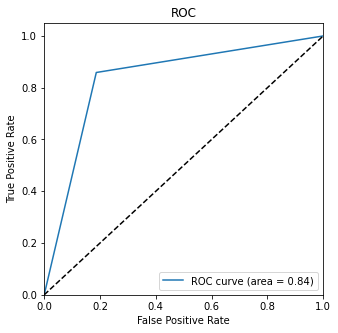

In [634]:
# Plotting the curve for the obtained metrics
draw_roc(train_result.actual, train_result.churn_pred )
plt.show()

##### Checking for optimal cutoff

In [635]:

numbers = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    train_result[i]= train_result.probas.map(lambda x: 1 if x > i else 0)
train_result.head()

,actual,probas,churn_pred,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.088772,0,0,0,0,0,0,0,0,0,0
1,0,0.484717,0,1,1,1,1,0,0,0,0,0
2,0,0.263041,0,1,1,0,0,0,0,0,0,0
3,0,0.888972,1,1,1,1,1,1,1,1,1,0
4,1,0.933343,1,1,1,1,1,1,1,1,1,1


In [636]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

for i in numbers:
    cm = metrics.confusion_matrix(train_result.actual, train_result[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.1          0.1  0.693790     0.975854     0.411725
0.2          0.2  0.752986     0.950099     0.555873
0.3          0.3  0.792294     0.923305     0.661284
0.4          0.4  0.818309     0.892928     0.743691
0.5          0.5  0.836042     0.858812     0.813272
0.6          0.6  0.835964     0.801485     0.870443
0.7          0.7  0.821451     0.726296     0.916606
0.8          0.8  0.776612     0.601412     0.951812
0.9          0.9  0.619145     0.254336     0.983955


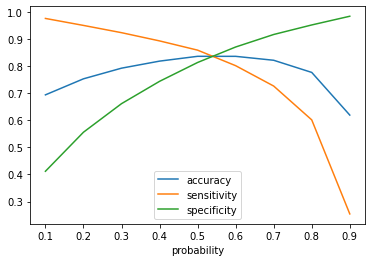

In [637]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

__From the above plot, we can see the optimum cutoff 0.55(approx)__

In [638]:
train_result['churn_pred'] = train_result.probas.map(lambda x: 1 if x > 0.55 else 0)
train_result.head()

,actual,probas,churn_pred,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.088772,0,0,0,0,0,0,0,0,0,0
1,0,0.484717,0,1,1,1,1,0,0,0,0,0
2,0,0.263041,0,1,1,0,0,0,0,0,0,0
3,0,0.888972,1,1,1,1,1,1,1,1,1,0
4,1,0.933343,1,1,1,1,1,1,1,1,1,1


##### Accuracy with optimal cutoff

In [639]:
# Checking the overall accuracy.
print(f"Accuracy Score:{round(metrics.accuracy_score(train_result.actual, train_result.churn_pred)*100, 2)}%")

Accuracy Score:83.8%


In [640]:
confusion = metrics.confusion_matrix(train_result.actual, train_result.churn_pred )
print(confusion)

[[16244  3014]
 [ 3226 16032]]


##### ROC Curve with cutoff 0.55

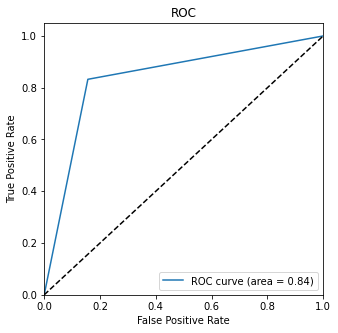

In [641]:
# Plotting the curve for the obtained metrics
draw_roc(train_result.actual, train_result.churn_pred )
plt.show()

#### Making Prediction on Test data based on base Logistic Regression Moddel

In [642]:
X_test[rfe_columns].shape


(8948, 30)

In [643]:
X_test_sm = sm.add_constant(X_test[rfe_columns])

In [644]:
y_test_pred = res.predict(X_test_sm)

In [645]:
# creating a dataframe with test results
test_result = pd.DataFrame({'actual':y_test.values.reshape(-1), 'probas':y_test_pred})
test_result.head()

,actual,probas
84905,0,0.360972
94131,0,0.163634
34020,0,0.131436
96899,0,0.089246
63711,1,0.851246


In [646]:
test_result['prdicted'] = test_result.probas.map(lambda x: 1 if x>0.55 else 0)
test_result.head()

,actual,probas,prdicted
84905,0,0.360972,0
94131,0,0.163634,0
34020,0,0.131436,0
96899,0,0.089246,0
63711,1,0.851246,1


##### Accuracy with Test data


In [647]:
# Checking the overall accuracy.
print(f"Accuracy Score:{round(metrics.accuracy_score(test_result.actual, test_result.prdicted)*100, 2)}%")

Accuracy Score:84.1%


##### Confusion Matrix - Test Date

In [648]:
confusion_test = metrics.confusion_matrix(test_result.actual, test_result.prdicted)
print("Confusion Matrix\n",confusion_test)

Confusion Matrix
 [[6931 1271]
 [ 152  594]]


In [649]:
# Calculating model validation parameters
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

##### Sensitivity - Test Result

In [650]:
print(f"Sensitivity = {round((TP / float(TP+FN))*100,2)} %")

Sensitivity = 79.62 %


##### Specificity - Test Result

In [651]:
print(f"Specificity = {round((TN / float(TN+FP))*100,2)} %")

Specificity = 84.5 %


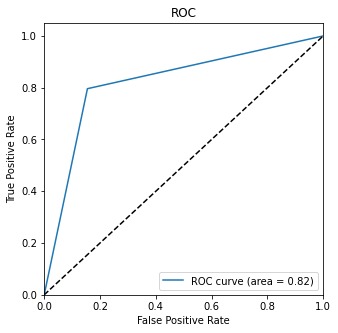

In [652]:
draw_roc(test_result.actual, test_result.prdicted)

#### Conclusion from Base Logistic regression model:

- With 30 best features we found best cutoff is 0.55
- With Logistic Regression model we achieve 83.8% Accuracy with Train Data and 84.1% Accuracy with Test data. Which is pretty good for a base model.
- As business is more foucs on predicting Churn cases, so in Sensitivity rate the model 85.88 % for train data where as in test data sensitivity rate is 79.62%
- AUC value for both Train is 0.84 and Test data is 0.82

### 6.5 PCA

In [653]:
X_train_smote.shape,y_train_smote.shape

((38516, 71), (38516, 1))

In [654]:

pca = PCA(svd_solver='randomized', random_state=42)

In [655]:
pca.fit(X_train_smote)

PCA(random_state=42, svd_solver='randomized')

In [656]:
#checking PCA components
pca.components_

array([[ 1.27211456e-02,  1.30206835e-02,  1.02197444e-02, ...,
        -5.16951945e-04,  1.80424827e-02, -1.04234851e-03],
       [-2.56971148e-02,  7.25417106e-03,  1.79432257e-02, ...,
         1.31698593e-02, -3.72398732e-03,  5.83474771e-03],
       [ 2.64375541e-02, -6.66407760e-03,  1.03554553e-02, ...,
         7.93839322e-04, -1.44793054e-03,  3.23338221e-03],
       ...,
       [-0.00000000e+00,  7.27691387e-17, -8.01177398e-17, ...,
         9.43444786e-17, -1.12206198e-16,  1.23790645e-16],
       [-0.00000000e+00,  7.13036486e-19, -1.31984058e-16, ...,
        -7.91692361e-17, -1.28542656e-16, -1.75521111e-16],
       [ 0.00000000e+00, -9.17904697e-17,  6.13365502e-17, ...,
        -9.13103066e-18, -4.22768187e-17,  3.01945267e-16]])

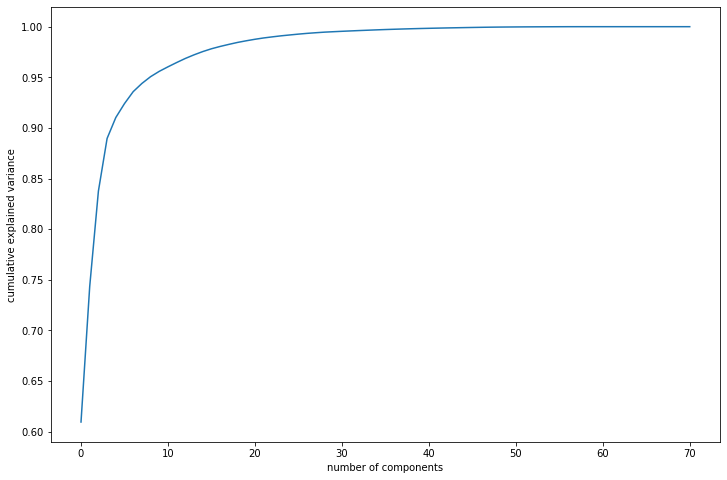

In [657]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**From the above plot we can see using 12 components we can explain more than 95% variance**

In [658]:

pca_final = IncrementalPCA(n_components=12)

In [659]:
#performing pca to X_train_sm
X_train_pca = pca_final.fit_transform(X_train_smote)
X_train_pca.shape

(38516, 12)

### 6.6 Logistic Regression model to predict using PCA

#### Train model

In [660]:
logmodel = LogisticRegression()
logmodel_pca = logmodel.fit(X_train_pca,y_train_smote)

In [661]:
y_pred = logmodel_pca.predict(X_train_pca)

In [662]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [663]:
# Model evaluation
model_score_list = []
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train_smote, y_pred)
model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  71.67
ROC AUC score :  71.67
Precision score :  69.59
Recall score :  77.0


In [664]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8948, 12)

In [665]:
y_test_pred = logmodel_pca.predict(X_test_pca)

In [666]:
model_score_list = []
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_test_pred)
model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  67.45
ROC AUC score :  70.48
Precision score :  16.9
Recall score :  74.13


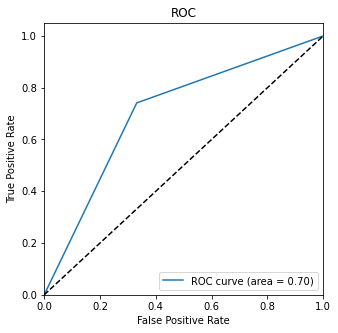

In [667]:
draw_roc(y_test, y_test_pred)

__With 12 PCA parameter we are getting 0.70 ROC AUC Score__

### 6.7 Random Forest Model using PCA

In [668]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [669]:
rf_model.fit(X_train_pca,y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [670]:
y_test_pred = rf_model.predict(X_test_pca)

In [671]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_test_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier without Hyper parameter', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  87.18
ROC AUC score :  67.42
Precision score :  30.96
Recall score :  43.7


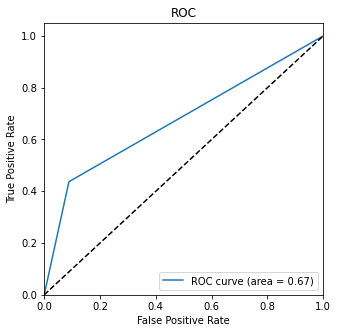

In [672]:
draw_roc(y_test, y_test_pred)

__With basic Random Forest model we are getting 0.67 ROC AUC score__

#### 6.7.1 Hyperparameter Tuning with GridSerarch

In [673]:
param_grid = {
    'max_depth': [8,12,16],
    'n_estimators': [100,200, 300], 
    'max_features': [5,7,9],
    'criterion': ["gini", "entropy"]
}

In [674]:
rf = RandomForestClassifier()

In [675]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

In [676]:
grid_search.fit(X_train_pca,y_train_smote)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 12, 16], 'max_features': [5, 7, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [677]:
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9638570312313526 using {'criterion': 'entropy', 'max_depth': 16, 'max_features': 7, 'n_estimators': 300}


#### 6.7.2 Random Forest with best Hyper parameter

In [678]:
rf = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=16, max_features =7,criterion='entropy' )

In [679]:
rf.fit(X_train_pca,y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features=7,
                       n_estimators=300, random_state=42)

In [680]:
y_test_pred = rf.predict(X_test_pca)

In [681]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_test_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier with hyper parameter', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  85.45
ROC AUC score :  70.25
Precision score :  29.13
Recall score :  52.01


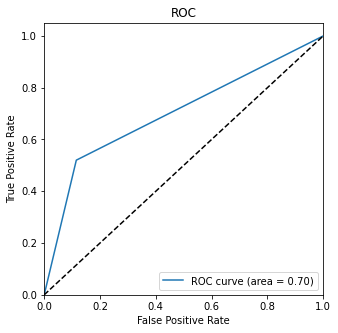

In [682]:
draw_roc(y_test, y_test_pred)

### 6.8 Decision Tree

In [683]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_pca,y_train_smote)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [684]:
y_test_pred = dt.predict(X_test_pca)

In [685]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_test_pred)
# add the model scores to score list
model_score_list.append({'model_name':'Decision Tree without hyper parameter', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  76.62
ROC AUC score :  71.77
Precision score :  21.12
Recall score :  65.95


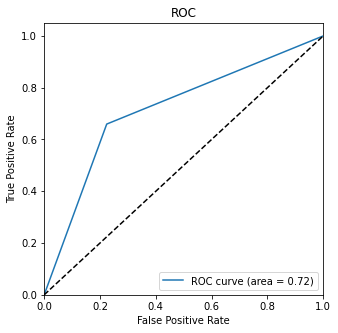

In [686]:
draw_roc(y_test, y_test_pred)

#### 6.8.1 Decision Tree with Hyper parameter

In [687]:
dt_hyp = DecisionTreeClassifier(random_state=42, max_depth=16, max_features =7,criterion='entropy')
dt_hyp.fit(X_train_pca,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features=7,
                       random_state=42)

In [688]:
y_test_pred = dt_hyp.predict(X_test_pca)

In [689]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_test_pred)
# add the model scores to score list
model_score_list.append({'model_name':'Decision Tree with Hyper parameter', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  77.79
ROC AUC score :  64.31
Precision score :  18.33
Recall score :  48.12


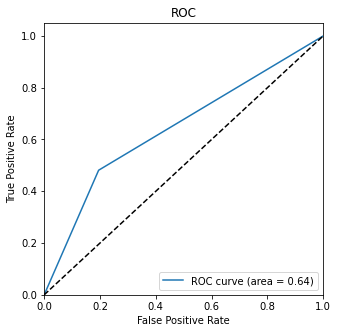

In [690]:
draw_roc(y_test, y_test_pred)

### 6.9 XGBoost

In [691]:
!pip install xgboost

In [692]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs = -1, random_state = 42)
xgb.fit(X_train_pca,y_train_smote)
y_test_pred = xgb.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_test_pred)
# add the model scores to score list
model_score_list.append({'model_name':'XGBoost without hyper parameter', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

[23:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score :  82.74
ROC AUC score :  72.74
Precision score :  26.58
Recall score :  60.72


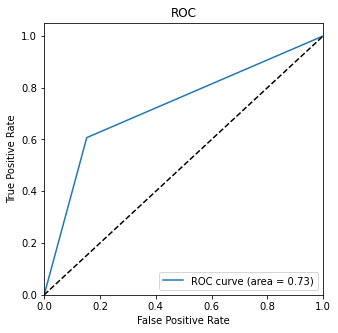

In [693]:
draw_roc(y_test, y_test_pred)

#### 6.9.1 XGBoost with Hyper Parameter

In [694]:
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth=16, learning_rate = 0.3)
xgb.fit(X_train_pca,y_train_smote)
y_test_pred = xgb.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_test_pred)
# add the model scores to score list
model_score_list.append({'model_name':'XGBoost with  Hyper parameter', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

[23:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score :  86.75
ROC AUC score :  67.06
Precision score :  29.78
Recall score :  43.43


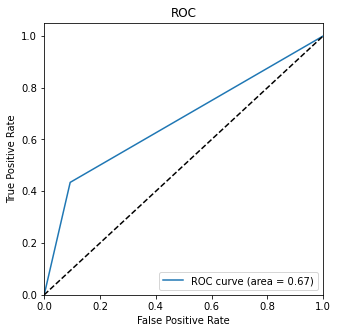

In [695]:
draw_roc(y_test, y_test_pred)

## 7. Summary

In [696]:
print("The summay of all matrix:\n\n")
for x in model_score_list:
    print('-'*125)
    print(x)
    print('-'*125)
    print()
    

The summay of all matrix:


-----------------------------------------------------------------------------------------------------------------------------
{'model_name': 'LogisticRegression', 'acc_score': 67.45, 'roc_score': 70.48, 'precision_score': 16.9, 'recall_score': 74.13}
-----------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------
{'model_name': 'RandomForestClassifier without Hyper parameter', 'acc_score': 87.18, 'roc_score': 67.42, 'precision_score': 30.96, 'recall_score': 43.7}
-----------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------
{'model_name': 'RandomForestClassifier with hyper parameter', 

#### Best Model

Considering all analysis, we can see best ROC AUC score we are getting for Basic Logistic regression model where we are using 30 dependent variables.

The best score for Logistic Regression model is 82.

using PCA, we are getting best result for XGBoost without hyper parameter tuning and the value is 72.74

#### 30 Best Independent variables

In [697]:
rfe_columns

Index(['offnet_mou_good_phase', 'offnet_mou_action_phase',
       'roam_og_mou_good_phase', 'roam_og_mou_action_phase',
       'loc_og_mou_action_phase', 'std_og_mou_good_phase',
       'std_og_mou_action_phase', 'og_others_action_phase',
       'total_og_mou_good_phase', 'loc_ic_mou_good_phase',
       'loc_ic_mou_action_phase', 'spl_ic_mou_action_phase',
       'isd_ic_mou_action_phase', 'total_ic_mou_good_phase',
       'total_ic_mou_action_phase', 'total_rech_num_good_phase',
       'total_rech_num_action_phase', 'total_rech_amt_action_phase',
       'max_rech_amt_action_phase', 'total_rech_data_action_phase',
       'count_rech_2g_good_phase', 'count_rech_2g_action_phase',
       'vol_2g_mb_action_phase', 'vol_3g_mb_action_phase',
       'monthly_2g_good_phase', 'monthly_2g_action_phase',
       'sachet_2g_action_phase', 'vbc_3g_good_phase', 'vbc_3g_action_phase',
       'total_data_rech_amt_good_phase'],
      dtype='object')